# 파일 불러오기

In [1]:
#2020년 6월 30일 기준으로 서울에서 발생한 코로나19를 분석합니다

In [2]:
import pandas as pd
import numpy as np

In [3]:
# file_name 변수에 read_html로 저장한 파일명을 지정해줍니다.
file_name = f"seoul-covid19_6_30_.csv"
file_name

'seoul-covid19_6_30_.csv'

In [4]:
# read_csv로 csv 파일을 불러온다.
# csv파일은 기본적으로 utf-8로 저장된다.
df=pd.read_csv(file_name, encoding="utf-8")  
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [5]:
df.shape

(1321, 7)

In [6]:
# 연번을 기준으로 내림차순으로 정렬해줍니다.
# .sort_values()는 column의 레이블 값을 받는다.
df = df.sort_values(by="연번", ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


# 시각화 도구 불러오기

In [7]:
# 한글 폰트가 깨지는 것을 방지하기 위해 matplotlib.pyplot을 수입합니다.
import matplotlib.pyplot as plt

#plt.style.use로 "fivethirtyeight" 스타일을 사용해 봅시다.
plt.style.use("fivethirtyeight")

#윈도우는 family를 Malgun Gothic으로 설정해줍니다.
plt.rc("font", family="Malgun Gothic") 

#마이너스 값을 집어넣었을 때 깨지는 것을 방지해줍니다.
plt.rc("axes", unicode_minus=False) 

#retina 디스플레이가 지원되면 시각화 폰트가 더 선명하게 보입니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\wkdgu\AppData\Local\Temp/ipykernel_7040/1456416626.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<AxesSubplot:title={'center':'한글 제목'}>

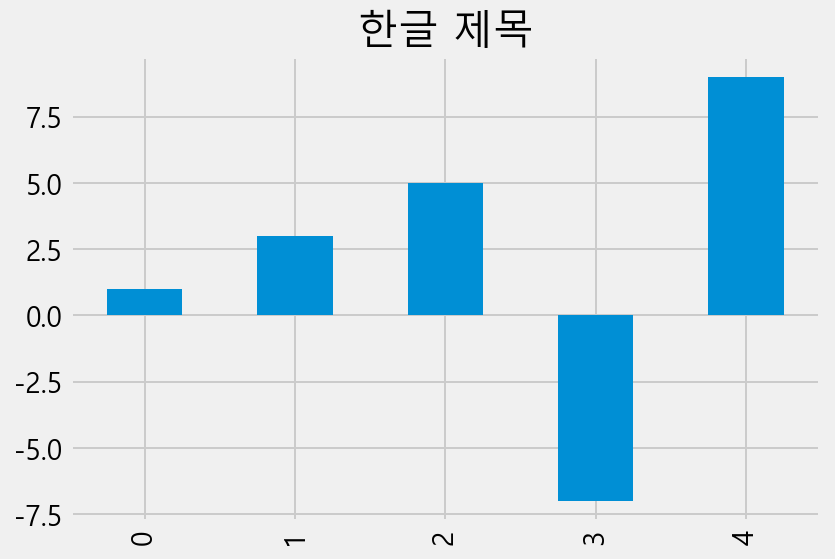

In [8]:
pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")

# 확진일 분석

In [9]:
df["확진일"]

0       6.30.
1       6.30.
2       6.30.
3       6.30.
4       6.30.
        ...  
1316    1.31.
1317    1.30.
1318    1.30.
1319    1.30.
1320    1.24.
Name: 확진일, Length: 1321, dtype: object

In [10]:
# 어느 날짜에 확진자가 많은지 봅니다.
# .value_counts()는 object형태의 데이터의 개수를 세줍니다.
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.20.     1
4.19.     1
4.18.     1
4.15.     1
1.24.     1
Name: 확진일, Length: 131, dtype: int64

In [11]:
#확진일 컬럼의 dtype이 날짜 형태가 아닙니다.
df["확진일"].head(1)

0    6.30.
Name: 확진일, dtype: object

In [12]:
#그냥 replace로 하면 변경이 안된다.
df["확진일"].replace(".", "-")

0       6.30.
1       6.30.
2       6.30.
3       6.30.
4       6.30.
        ...  
1316    1.31.
1317    1.30.
1318    1.30.
1319    1.30.
1320    1.24.
Name: 확진일, Length: 1321, dtype: object

### dtype을 datatime로 변경하는 방법

In [13]:
# pd.to_datetime()으로 dtype을 날짜 타입으로 변경해줍니다.
# .str.replace()를 해줘야 변경됩니다.
df["확진일자"]=pd.to_datetime("2020-"+df["확진일"].str.replace(".", "-"))
df["확진일자"]

C:\Users\wkdgu\AppData\Local\Temp/ipykernel_7040/3914198452.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["확진일자"]=pd.to_datetime("2020-"+df["확진일"].str.replace(".", "-"))


0      2020-06-30
1      2020-06-30
2      2020-06-30
3      2020-06-30
4      2020-06-30
          ...    
1316   2020-01-31
1317   2020-01-30
1318   2020-01-30
1319   2020-01-30
1320   2020-01-24
Name: 확진일자, Length: 1321, dtype: datetime64[ns]

In [14]:
#df는 2차원 형태여서 [[]]의 형태로 써준다.
df[["확진일", "확진일자"]] 

,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30
...,...,...
1316,1.31.,2020-01-31
1317,1.30.,2020-01-30
1318,1.30.,2020-01-30
1319,1.30.,2020-01-30


### datatime에서 월만 추출하는 방법

In [15]:
# 월만 추출합니다.
df["월"]=df["확진일자"].dt.month
df["월"]

0       6
1       6
2       6
3       6
4       6
       ..
1316    1
1317    1
1318    1
1319    1
1320    1
Name: 월, Length: 1321, dtype: int64

In [16]:
df[["확진일", "확진일자", "월"]]

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6
...,...,...,...
1316,1.31.,2020-01-31,1
1317,1.30.,2020-01-30,1
1318,1.30.,2020-01-30,1
1319,1.30.,2020-01-30,1


### datatime에서 주만 추출하는 방법

In [17]:
# 해당 연도의 몇번째 주인지 추출합니다.
df["주"]=df["확진일자"].dt.week
df["주"]

C:\Users\wkdgu\AppData\Local\Temp/ipykernel_7040/1231343360.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"]=df["확진일자"].dt.week


0       27
1       27
2       27
3       27
4       27
        ..
1316     5
1317     5
1318     5
1319     5
1320     4
Name: 주, Length: 1321, dtype: int64

In [18]:
df[["확진일", "확진일자", "월", "주"]]

,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27
...,...,...,...,...
1316,1.31.,2020-01-31,1,5
1317,1.30.,2020-01-30,1,5
1318,1.30.,2020-01-30,1,5
1319,1.30.,2020-01-30,1,5


## 선그래프 그리기

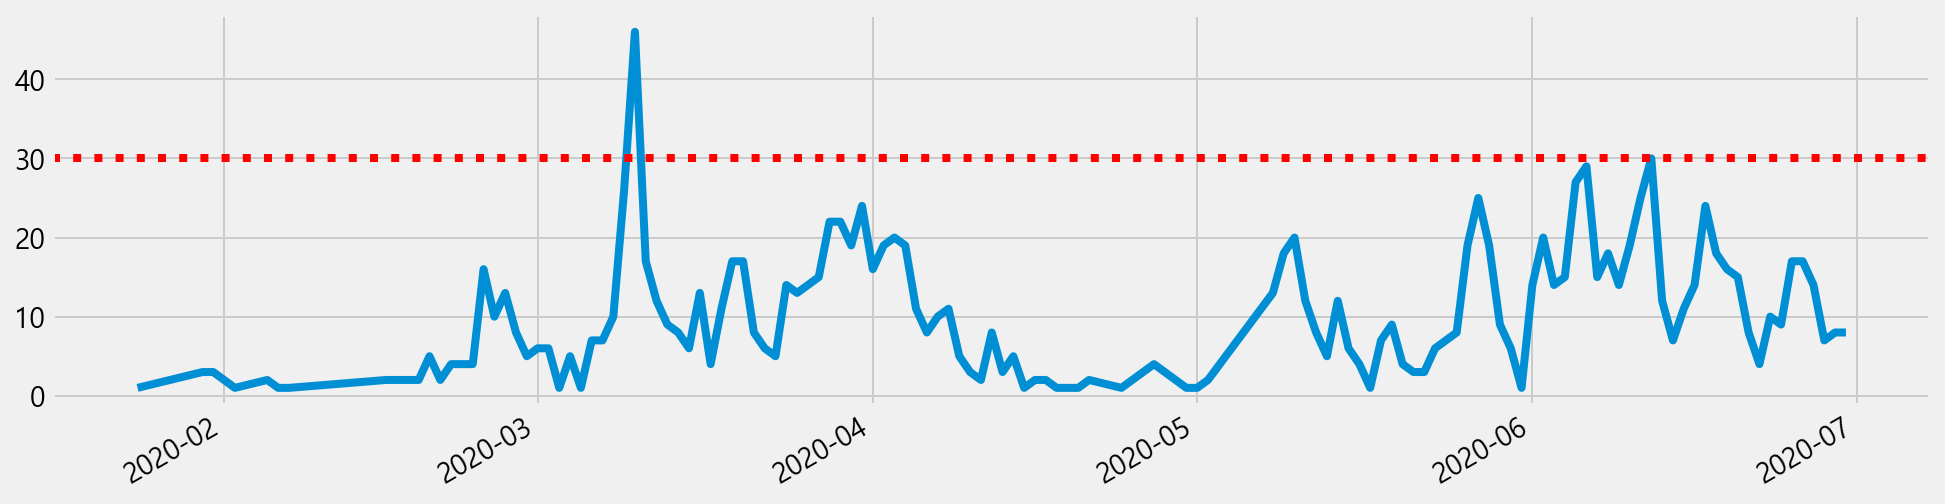

In [19]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().plot(figsize=(15,4))

#y축값 30에 빨간색 점선으로 수평선을 그어줍니다.
plt.axhline(30, color="red", linestyle=":")

<AxesSubplot:>

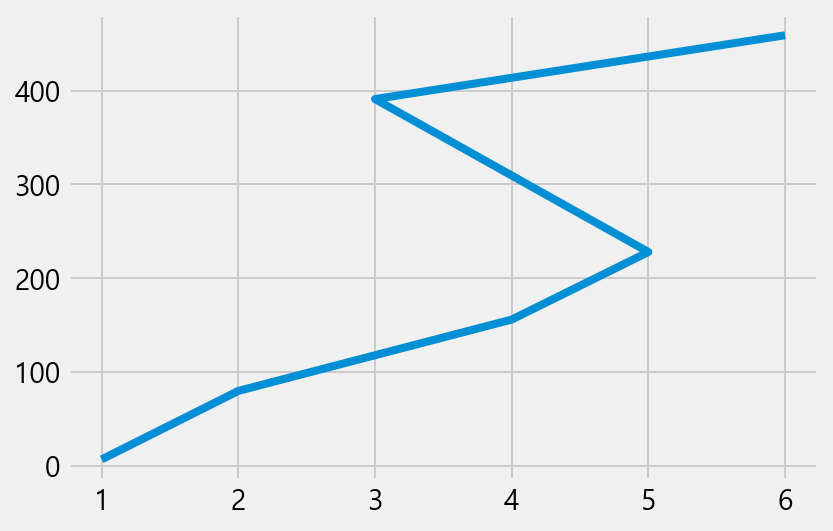

In [20]:
# 이렇게 하면 그래프가 이상하게 나온다.
df["월"].value_counts().plot()

<AxesSubplot:>

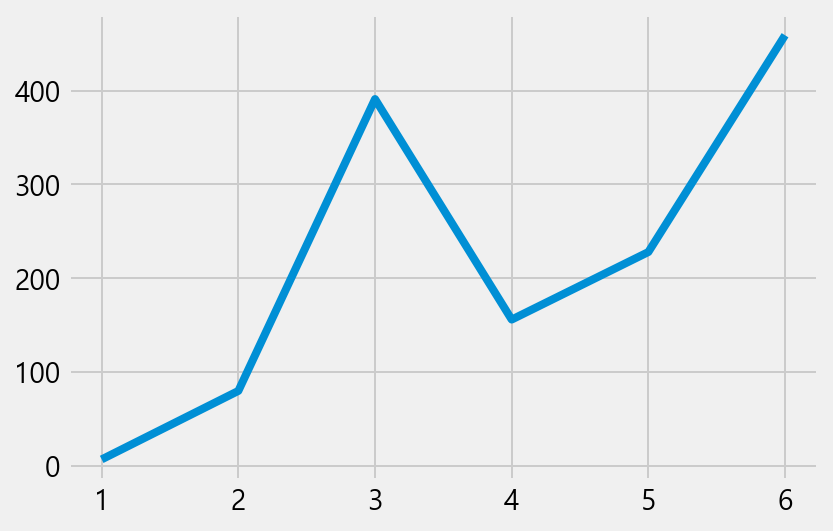

In [21]:
#.sort_index()를 해야 그래프가 제대로 나온다.
df["월"].value_counts().sort_index().plot()

### value_counts()로 빈도수 구하기

In [22]:
# .value_counts()는 object형태의 데이터의 개수를 세줍니다.
# Series형태의 데이터에만 쓸 수 있다. DataFrame에는 적용할 수 없다.

In [23]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27
...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5


In [24]:
df["확진일"]

0       6.30.
1       6.30.
2       6.30.
3       6.30.
4       6.30.
        ...  
1316    1.31.
1317    1.30.
1318    1.30.
1319    1.30.
1320    1.24.
Name: 확진일, Length: 1321, dtype: object

In [25]:
df["확진일"].value_counts()
#위 함수처럼 써주면 날짜별로 발생한 확진자의 수를 세어줍니다.

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.20.     1
4.19.     1
4.18.     1
4.15.     1
1.24.     1
Name: 확진일, Length: 131, dtype: int64

### 시리즈를 정렬할 때 sort_index()는 인덱스를 기준으로 정렬합니다

In [26]:
#sort_index는 index를 기준으로 정렬해줍니다. default는 오름차순입니다.
#날짜 오름차순은 위에서 아래로 갈수록 과거에서 최근으로, 날짜 내림차순은 위에서 아래로 갈수록 최근에서 과거로
#한글 오름차순은 위에서 아래로 갈수록 가나다 순으로, 한글 내림차순은 위에서 아래로 갈수록 다나가순으로

In [27]:
df["월"].value_counts().sort_index()

1      7
2     80
3    391
4    156
5    228
6    459
Name: 월, dtype: int64

In [28]:
df["월"].value_counts().sort_index(ascending=False)

6    459
5    228
4    156
3    391
2     80
1      7
Name: 월, dtype: int64

### 수평선, 수직선 긋기

<AxesSubplot:>

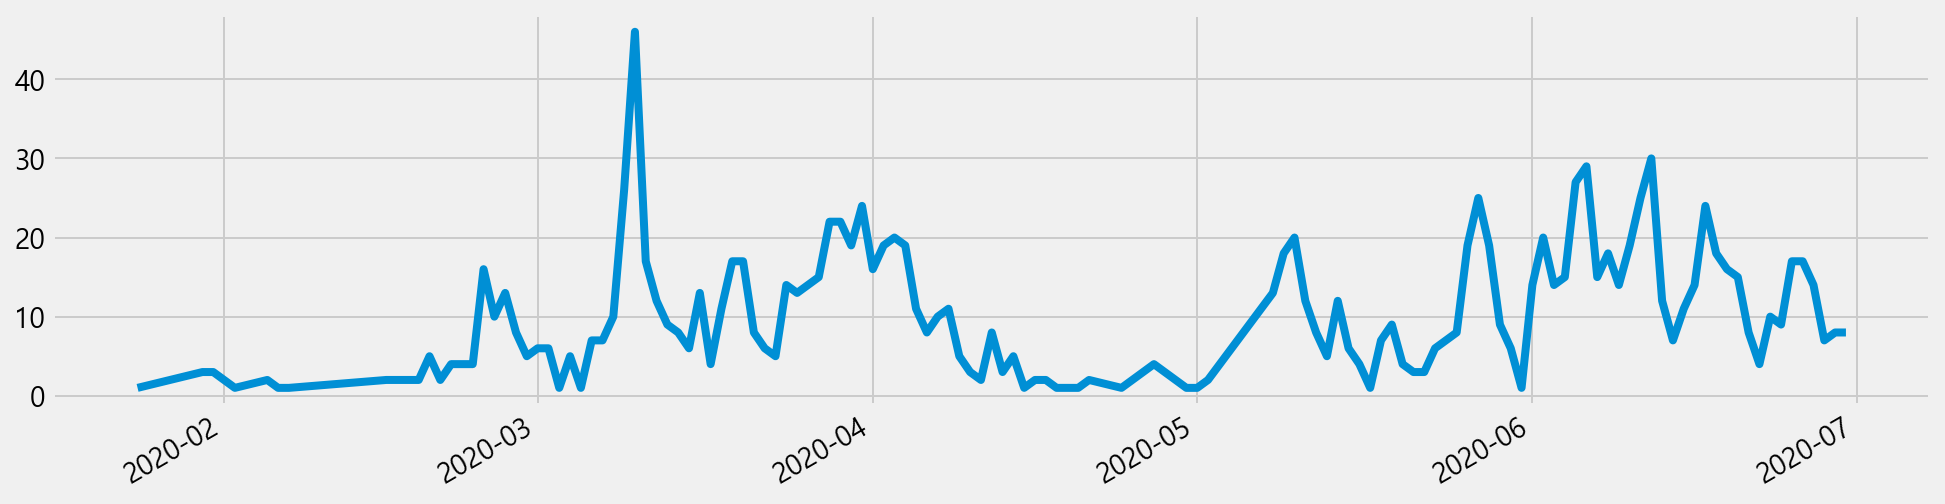

In [29]:
df["확진일자"].value_counts().plot(figsize=(15,4))

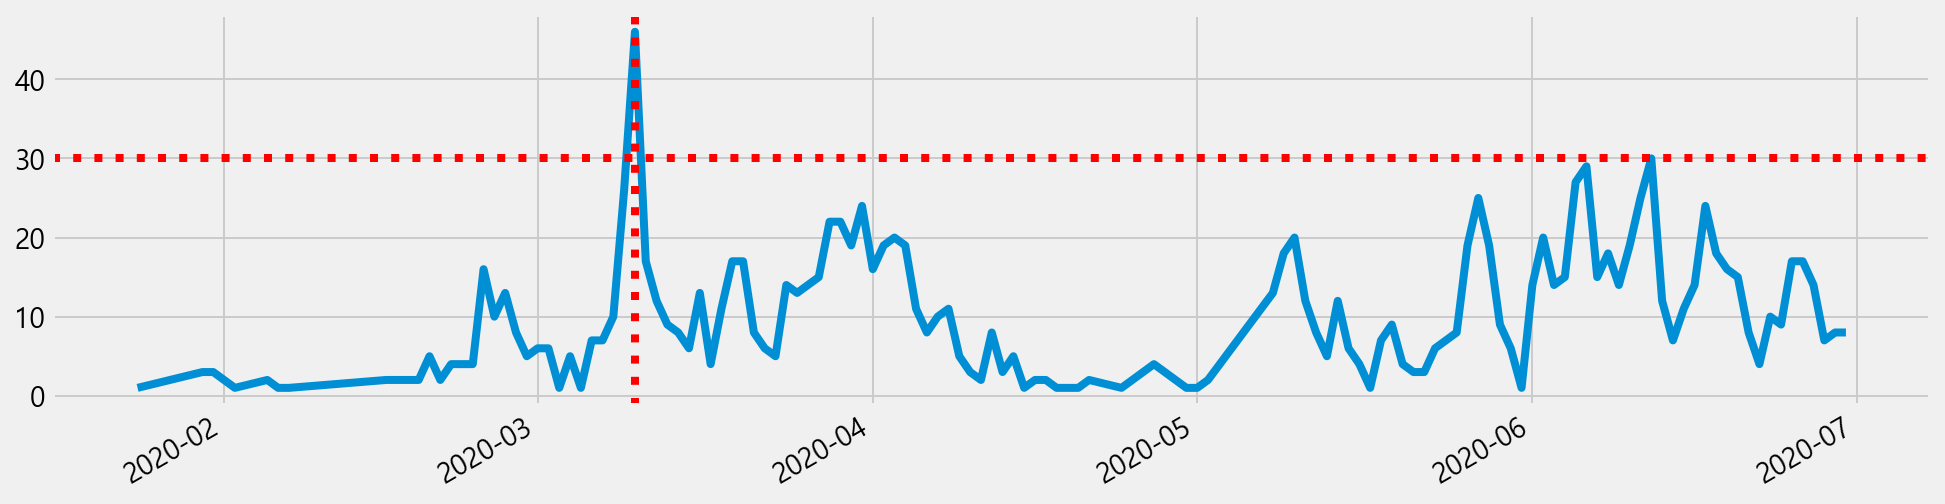

In [30]:
df["확진일자"].value_counts().plot(figsize=(15,4))

plt.axhline(30, color="red", linestyle=":")
plt.axvline("2020-03-10", color="red", linestyle=":")

## 선그래프에 값 표시하기

In [31]:
# 연도는 모두 2020년이라서 월일만 표기되도록 슬라이싱을 통해 "월일" 컬럼을 만듭니다.

#.astype(str)을 통해 dtype을 날짜에서 str형태로 바꿔줍니다.
# map(lambda x : x[-5:])로 확진일자에서 뒤에서 5글자를 슬라이싱한다.
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df["월일"]

0       06-30
1       06-30
2       06-30
3       06-30
4       06-30
        ...  
1316    01-31
1317    01-30
1318    01-30
1319    01-30
1320    01-24
Name: 월일, Length: 1321, dtype: object

In [32]:
df["월일"].value_counts()

03-10    46
06-12    30
06-06    29
06-05    27
03-09    26
         ..
04-30     1
05-01     1
05-17     1
05-31     1
01-24     1
Name: 월일, Length: 130, dtype: int64

<AxesSubplot:>

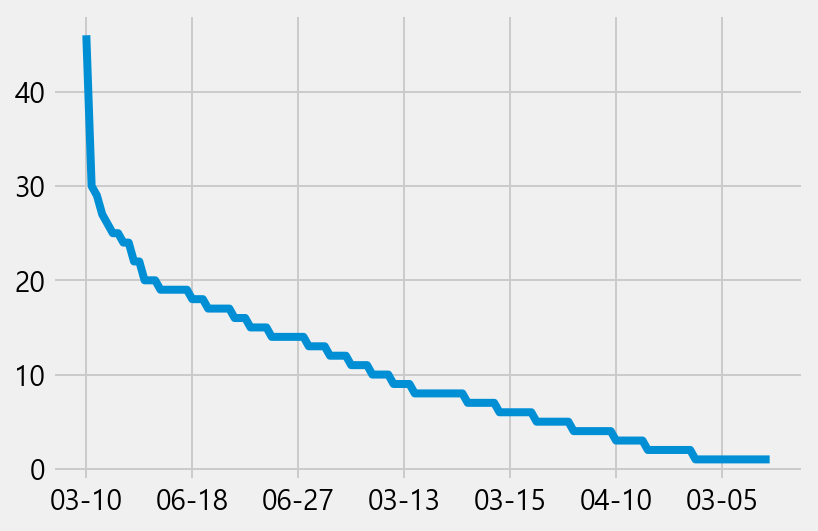

In [33]:
#dtype이 int형이라 가장 높은 빈도수 순으로 그래프가 나온다.
df["월일"].value_counts().plot()

<AxesSubplot:>

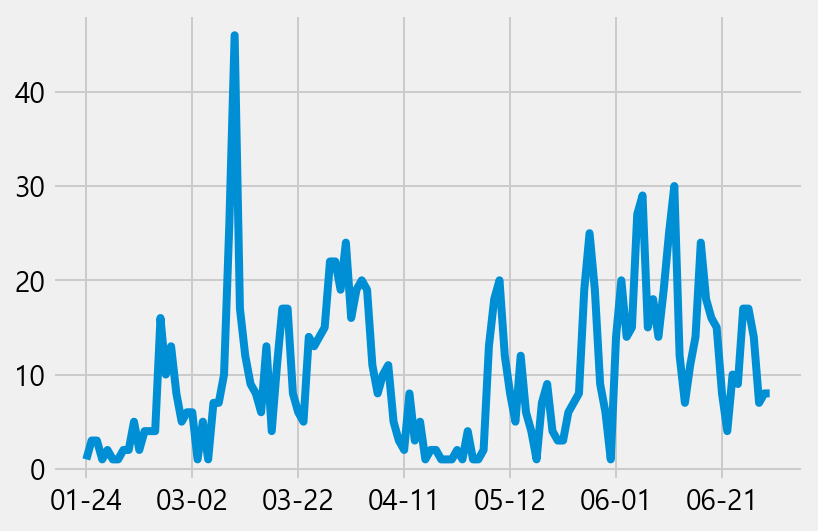

In [34]:
#.sort_index()를 통해 날짜 순으로 정리해준다.
df["월일"].value_counts().sort_index().plot()

In [35]:
#.sort_index()는 오름차순이 default다
#날짜를 오름차순으로 정렬하면 맨 위가 과거고 밑으로 내려올수록 최근이다.
day_count = df["월일"].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

In [36]:
len(day_count)

130

In [37]:
for i in range(len(day_count)):
    print(i, day_count.iloc[i])

0 1
1 3
2 3
3 1
4 2
5 1
6 1
7 2
8 2
9 5
10 2
11 4
12 4
13 4
14 16
15 10
16 13
17 8
18 5
19 6
20 6
21 1
22 5
23 1
24 7
25 7
26 10
27 26
28 46
29 17
30 12
31 9
32 8
33 6
34 13
35 4
36 11
37 17
38 17
39 8
40 6
41 5
42 14
43 13
44 14
45 15
46 22
47 22
48 19
49 24
50 16
51 19
52 20
53 19
54 11
55 8
56 10
57 11
58 5
59 3
60 2
61 8
62 3
63 5
64 1
65 2
66 2
67 1
68 1
69 1
70 2
71 1
72 4
73 1
74 1
75 2
76 13
77 18
78 20
79 12
80 8
81 5
82 12
83 6
84 4
85 1
86 7
87 9
88 4
89 3
90 3
91 6
92 7
93 8
94 19
95 25
96 19
97 9
98 6
99 1
100 14
101 20
102 14
103 15
104 27
105 29
106 15
107 18
108 14
109 19
110 25
111 30
112 12
113 7
114 11
115 14
116 24
117 18
118 16
119 15
120 8
121 4
122 10
123 9
124 17
125 17
126 14
127 7
128 8
129 8


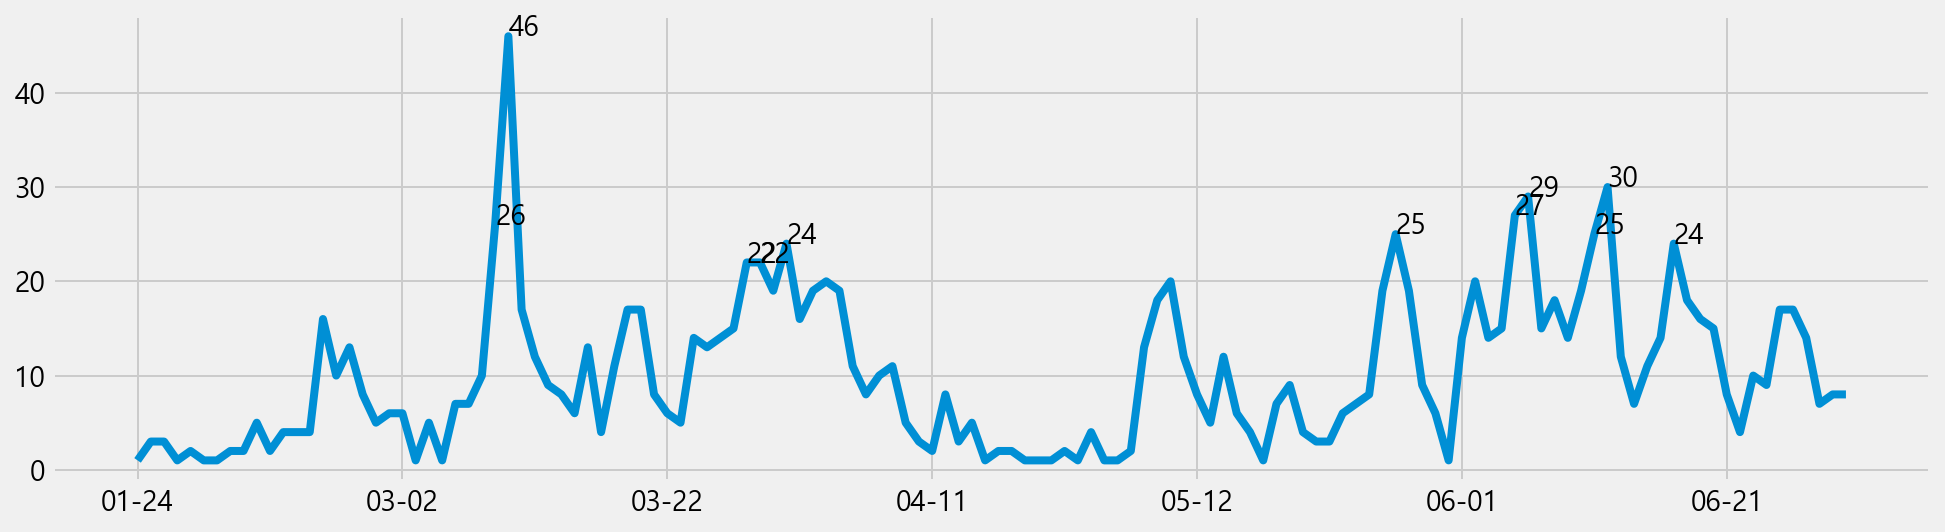

In [38]:
g=day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

### 람다함수

In [39]:
#함수를 한 줄로 표현하는 익명 함수 기법이다.

In [40]:
def f1(x,y):
    return x+y
f1(1,2)

3

In [41]:
f2 = lambda x,y:x+y    # :의 앞부분이 입력값, :의 뒷부분이 return값이다.
f2(1,2)

3

### map함수와 람다함수 적용

map함수는 함수와 sequence형 데이터를 Parameter로 입력받아 각 element마다 함수를 
적용하여 list로 반환하는 함수이다.

In [42]:
#map(func, *iterables) --> map object
data1=[1,2,3,4,5]
data2=[6,7,8,9,10]

In [43]:
# 예1
#data에 있는 element를 lambda함수에 순차적으로 대입에서 값을 얻어낸다.
list(map(lambda x:x+5, data1))

[6, 7, 8, 9, 10]

In [44]:
# 예2
f3=lambda x:x**2
list(map(f3, data1))

[1, 4, 9, 16, 25]

In [45]:
# 예3
# data1과 data2에 있는 element들이 순차적으로 x,y에 대입되서 값을 얻어낸다.
list(map(lambda x,y:x+y, data1, data2))

[7, 9, 11, 13, 15]

In [46]:
# 예4 예제에서 적용

df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
# 확진일자 칼럼이 *iterable 역할을 한다.

df[["월일", "확진일자"]]

,월일,확진일자
0,06-30,2020-06-30
1,06-30,2020-06-30
2,06-30,2020-06-30
3,06-30,2020-06-30
4,06-30,2020-06-30
...,...,...
1316,01-31,2020-01-31
1317,01-30,2020-01-30
1318,01-30,2020-01-30
1319,01-30,2020-01-30


람다함수와 map함수 출처
https://coding-grandpa.tistory.com/entry/Lambda-Map

 ### astype()은 데이터의 타입을 바꿔준다.

In [47]:
 df["확진일자"]

0      2020-06-30
1      2020-06-30
2      2020-06-30
3      2020-06-30
4      2020-06-30
          ...    
1316   2020-01-31
1317   2020-01-30
1318   2020-01-30
1319   2020-01-30
1320   2020-01-24
Name: 확진일자, Length: 1321, dtype: datetime64[ns]

In [48]:
# #dtype을 str로 바꿔준다. 그래야 인덱싱이나 슬라이싱을 할 수 있다. 
df["확진일자"].astype(str)

0       2020-06-30
1       2020-06-30
2       2020-06-30
3       2020-06-30
4       2020-06-30
           ...    
1316    2020-01-31
1317    2020-01-30
1318    2020-01-30
1319    2020-01-30
1320    2020-01-24
Name: 확진일자, Length: 1321, dtype: object

### text 함수

In [49]:
#text(x, y, s) : Add the text *s* to the axes at location *x*, *y* in data coordinates.
#그래프 상에서 해당되는 (X,Y)에 S를 표시해 주는 함수

## 일별 확진자수 그리기

In [50]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

In [51]:
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [52]:
#확진자가 가장 많았던 날을 찾습니다.
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [53]:
df[df["월일"] == "03-10"]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1124,197,7524,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1125,196,7619,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1126,195,7795,3.10.,관악구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1127,194,7787,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1128,193,7826,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


## 막대그래프 그리기

<AxesSubplot:>

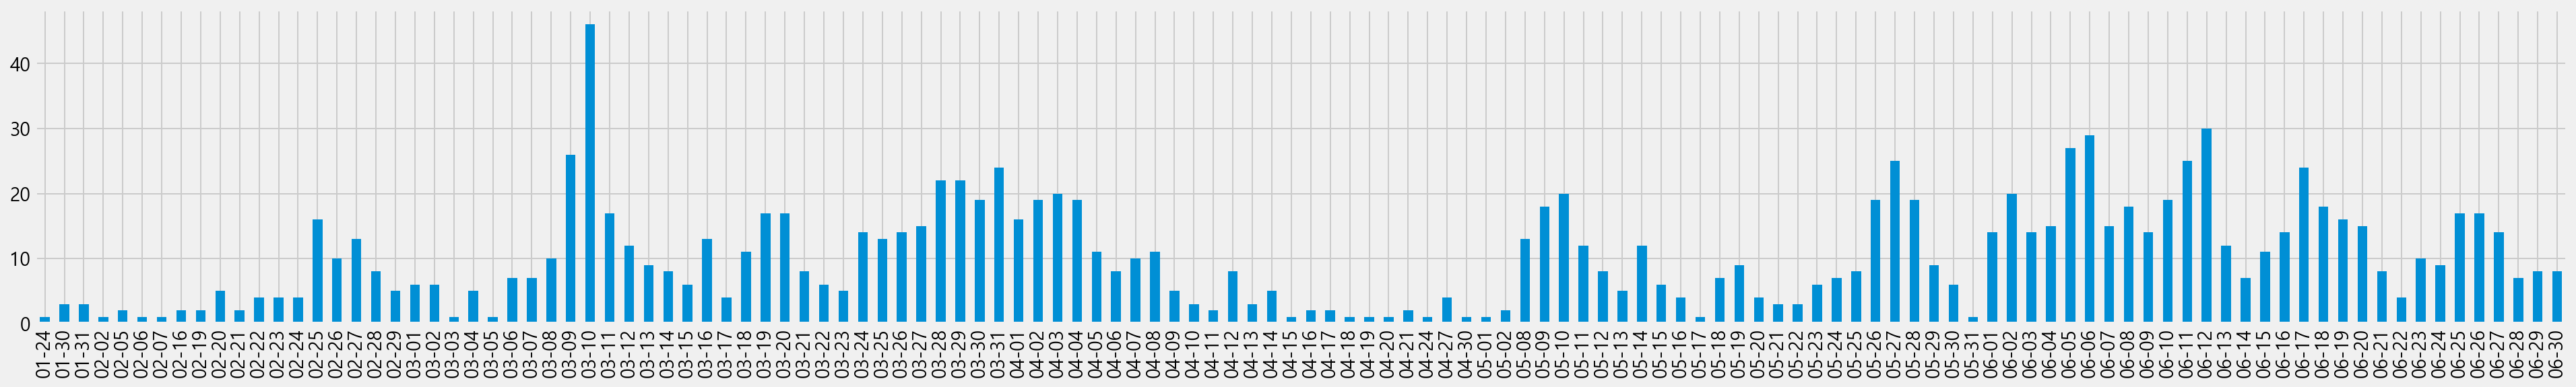

In [54]:
#데이터가 너무 많아서 글씨가 작아서 안보인다
day_count.plot.bar(figsize=(30,4))

<AxesSubplot:>

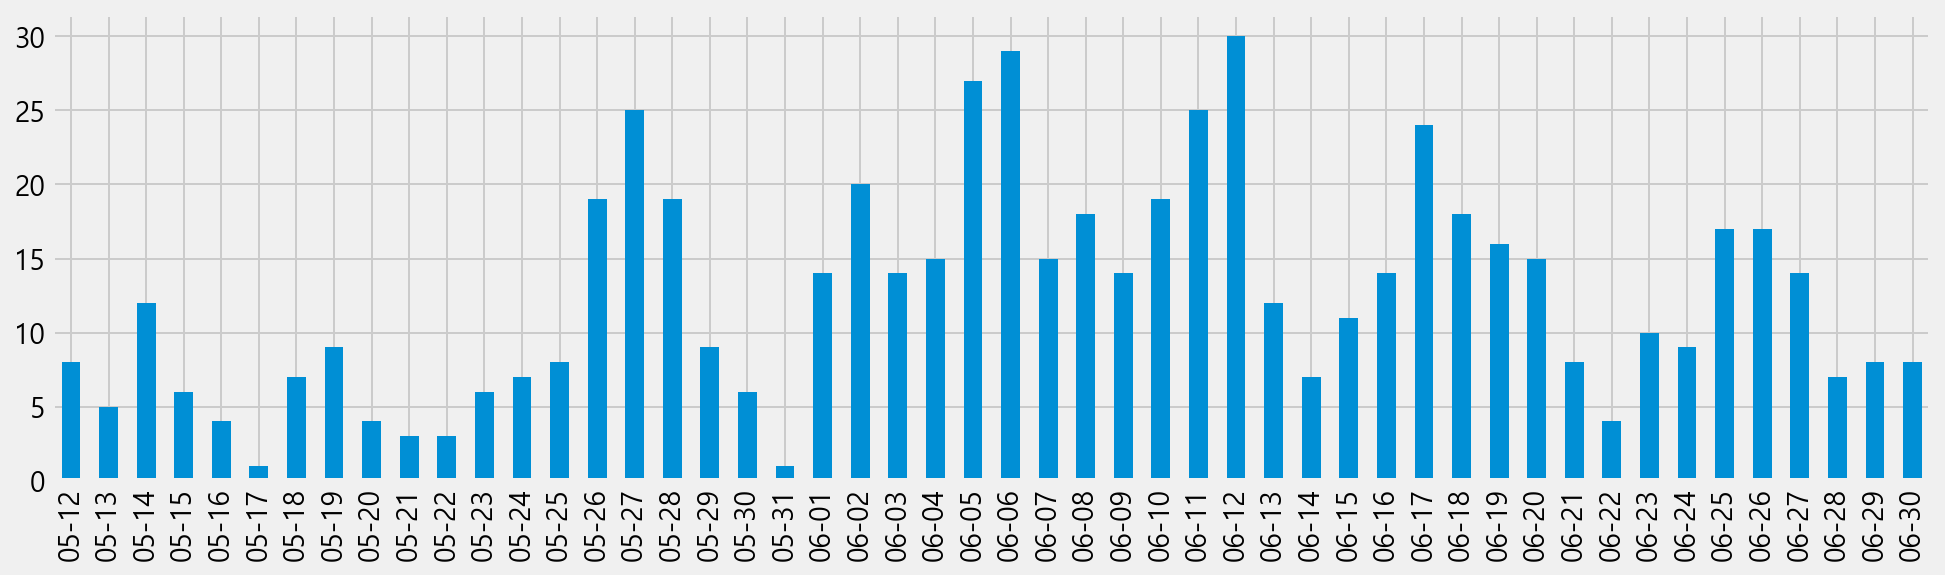

In [55]:
#슬라이싱을 통해 최근 50일치 데이터만 그려본다.
day_count[-50:].plot.bar(figsize=(15,4))

## 최근 데이터만 슬라이싱해보기

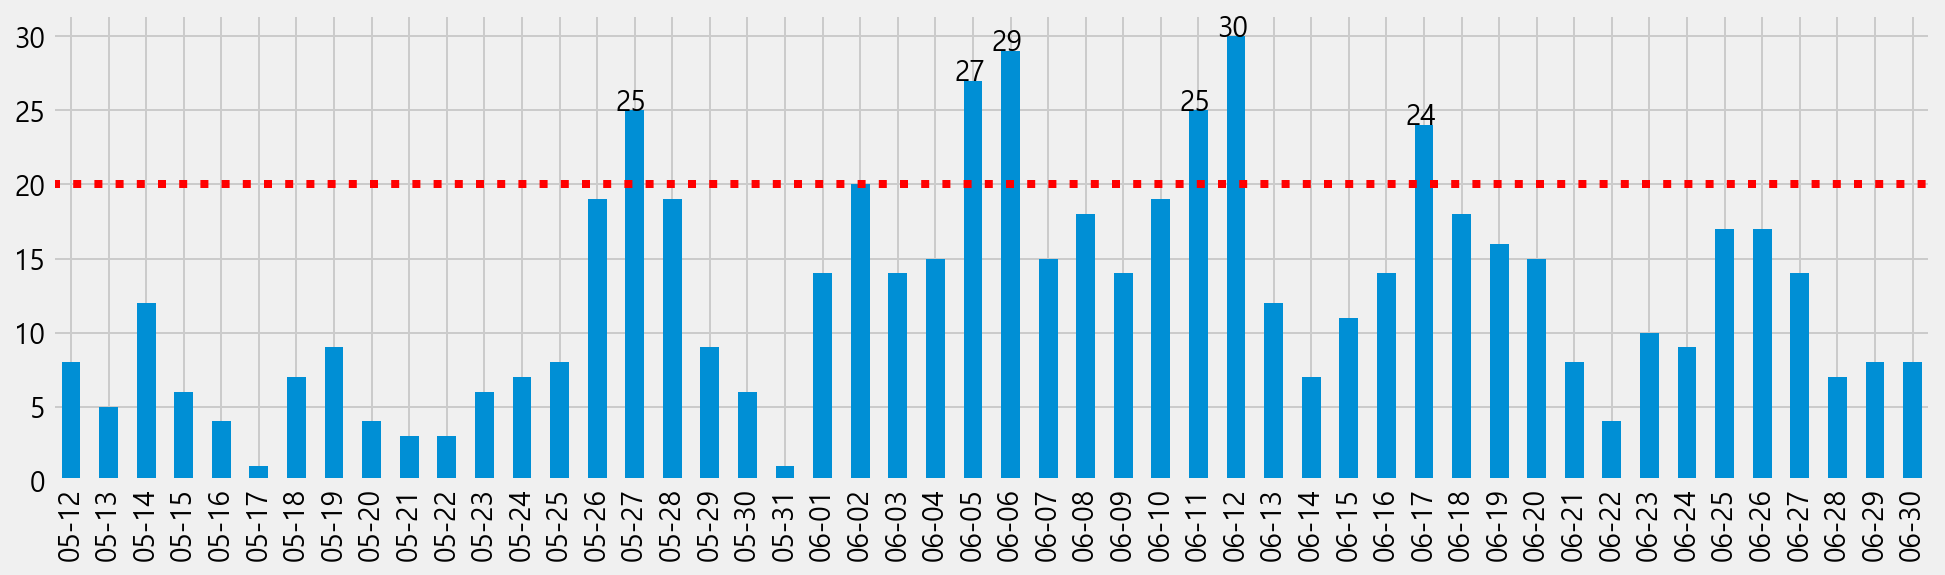

In [56]:
#최근 50일치 데이터에 값을 표시해 보자
bg=day_count[-50:].plot.bar(figsize=(15,4))

plt.axhline(20, color="red", linestyle=":")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 20:
        bg.text(x=i-0.5, y=case_count, s=case_count)

## 월별 확진자 수 그리기

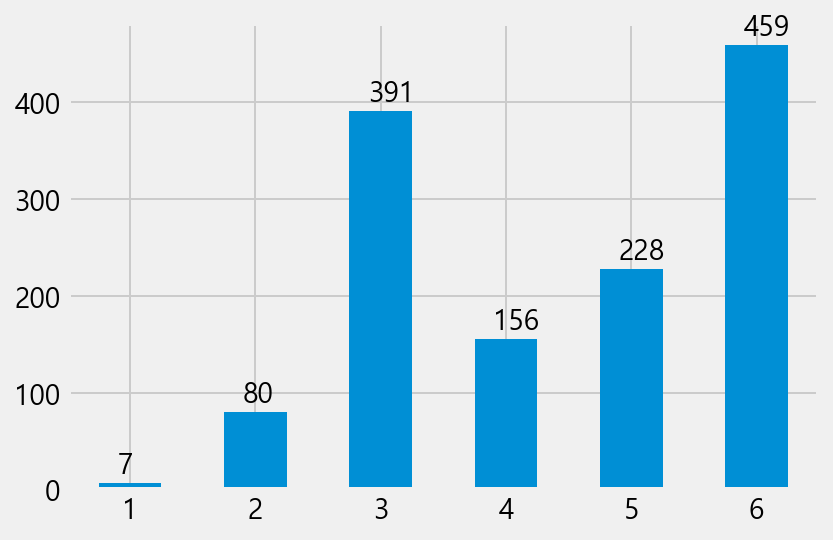

In [57]:
month_case=df["월"].value_counts().sort_index()
mg=month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    mg.text(x=i-0.1, y=month_case.iloc[i]+10, s=month_case.iloc[i])

### rot로 폰트 각도 조절하기

<AxesSubplot:>

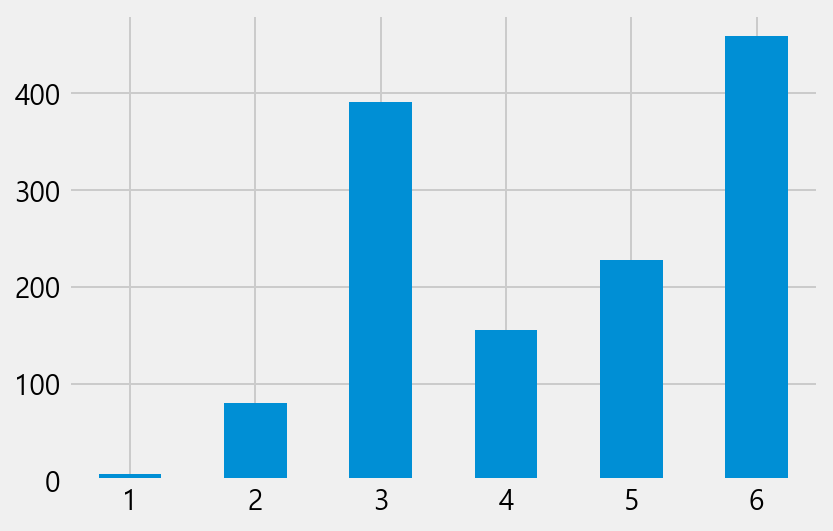

In [58]:
#폰트의 기울기를 조절해준다.
month_case.plot.bar(rot=0)

<AxesSubplot:>

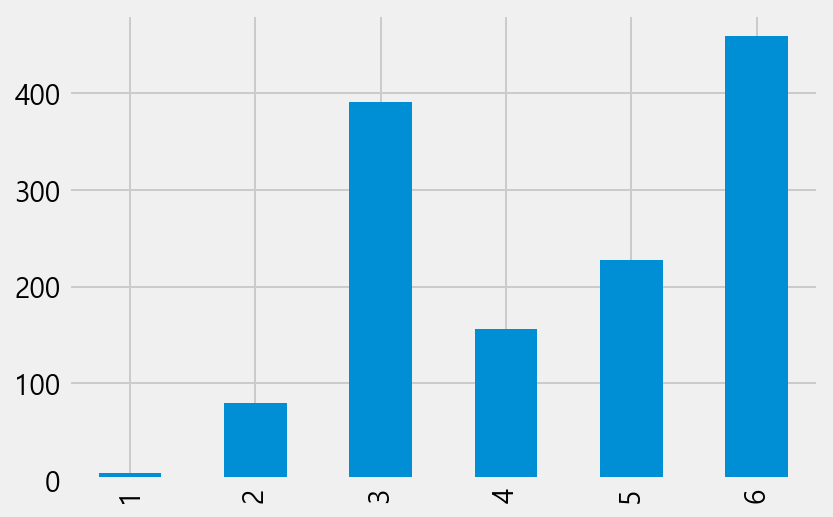

In [59]:
month_case.plot.bar()

## 주별 확진자수 그리기

<AxesSubplot:>

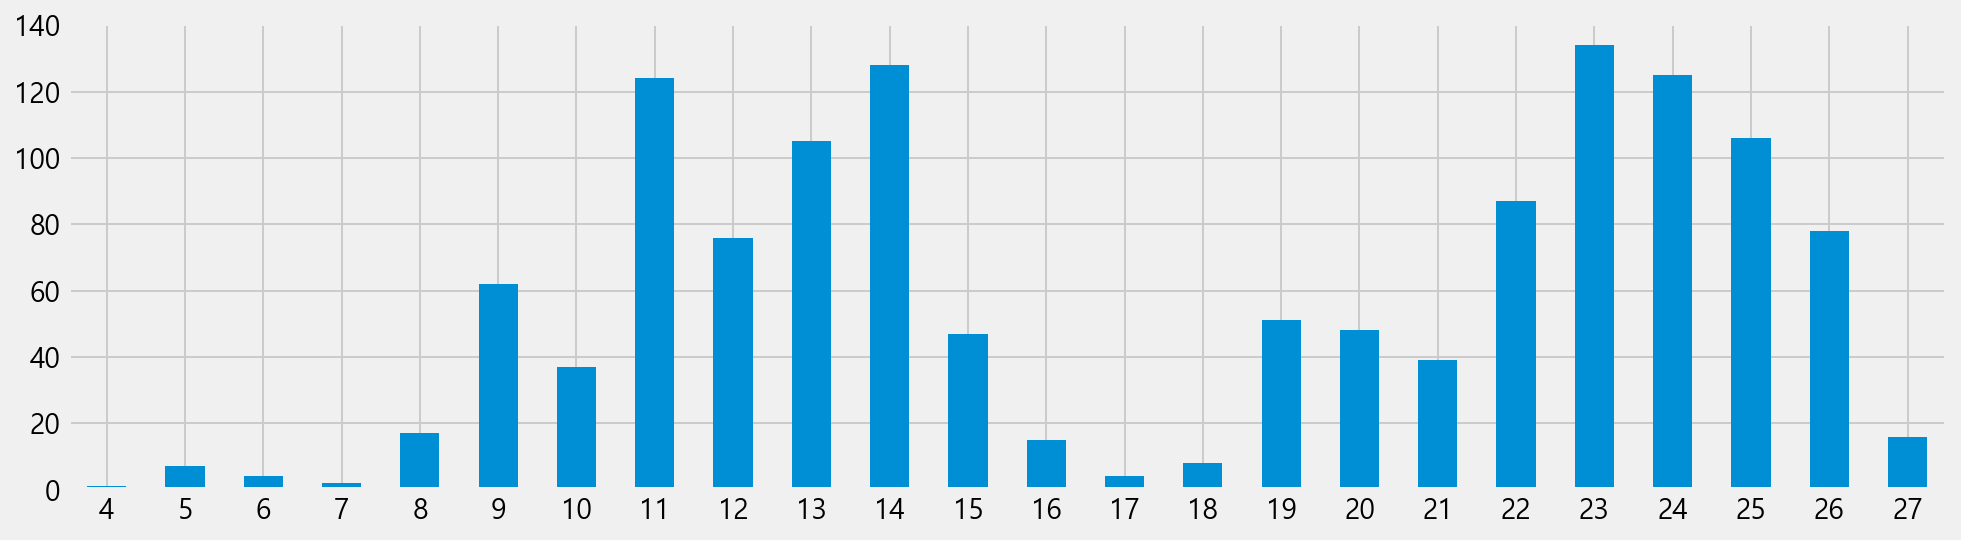

In [60]:
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot.bar(figsize=(15,4), rot=0)

## 월-주 같이 그리기

In [61]:
df.groupby(["월", "주"]).count()

연번   환자  확진일  거주지  여행력  접촉력  조치사항  확진일자   월일
월 주                                                
1 4     1    1    1    1    1    1     1     1    1
  5     6    6    6    6    6    6     6     6    6
2 5     1    1    1    1    1    1     1     1    1
  6     4    4    4    4    4    4     4     4    4
  7     2    2    2    2    2    2     2     2    2
  8    17   17   17   17   17   17    17    17   17
  9    56   56   56   56   56   56    56    56   56
3 9     6    6    6    6    6    6     6     6    6
  10   37   37   37   37   37   37    37    37   37
  11  124  124  124  124  124  124   124   124  124
  12   76   76   76   76   76   76    76    76   76
  13  105  105  105  105  105  105   105   105  105
  14   43   43   43   43   43   43    43    43   43
4 14   85   85   85   85   85   85    85    85   85
  15   47   47   47   47   47   47    47    47   47
  16   15   15   15   15   15   15    15    15   15
  17    4    4    4    4    4    4     4     4    4
  18    5    5    5    5    5    5     5     5    5
5 18    3    3    3    3    3    3     3     3    3
  19   51   51   51   51   51   51    51    51   51
  20   48   48   48   48   48   48    48    48   48
  21   39   39   39   39   39   39    39    39   39
  22   87   87   87   87   87   87    87    87   87
6 23  134  134  134  134  134  134   134   134  134
  24  125  125  125  125  125  125   125   125  125
  25  106  106  106  106  106  106   106   106  106
  26   78   78   78   78   78   78    78    78   78
  27   16   16   16   16   16   16    16    16   16

In [62]:
MW_case = df.groupby(["월", "주"])["연번"].count()
MW_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     16
Name: 연번, dtype: int64

<AxesSubplot:xlabel='월,주'>

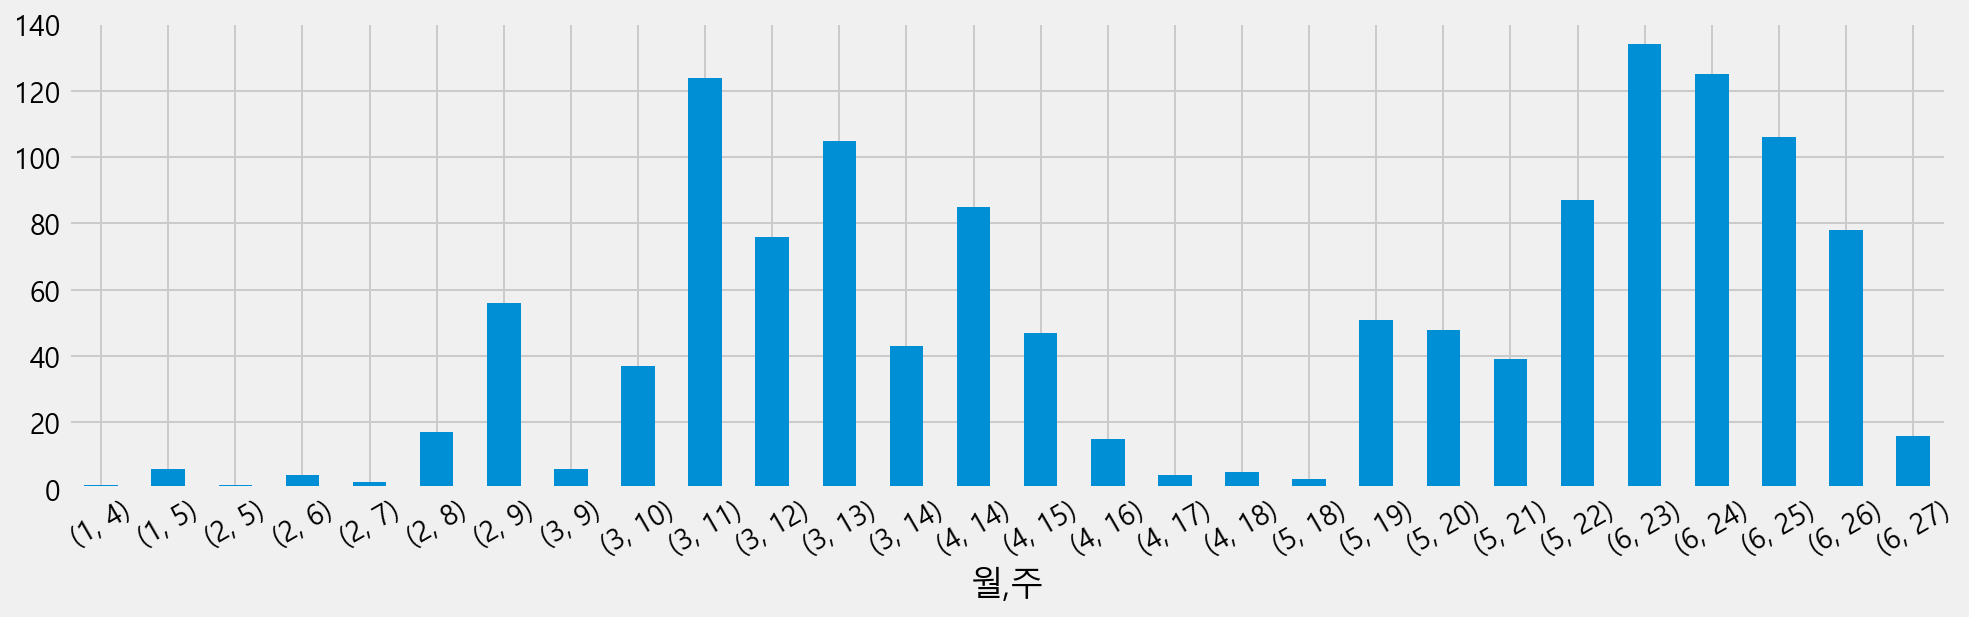

In [63]:
MW_case.plot.bar(figsize=(15,4), rot=30)

### groupby()

In [64]:
#groupby는 DataFrame형태에도 적용할 수 있다. value_counts는 Series형태에만 적용가능하다.

In [65]:
#이렇게 하면 모든 column이 다 나오게 된다.
df.groupby(["월", "주"]).count()

연번   환자  확진일  거주지  여행력  접촉력  조치사항  확진일자   월일
월 주                                                
1 4     1    1    1    1    1    1     1     1    1
  5     6    6    6    6    6    6     6     6    6
2 5     1    1    1    1    1    1     1     1    1
  6     4    4    4    4    4    4     4     4    4
  7     2    2    2    2    2    2     2     2    2
  8    17   17   17   17   17   17    17    17   17
  9    56   56   56   56   56   56    56    56   56
3 9     6    6    6    6    6    6     6     6    6
  10   37   37   37   37   37   37    37    37   37
  11  124  124  124  124  124  124   124   124  124
  12   76   76   76   76   76   76    76    76   76
  13  105  105  105  105  105  105   105   105  105
  14   43   43   43   43   43   43    43    43   43
4 14   85   85   85   85   85   85    85    85   85
  15   47   47   47   47   47   47    47    47   47
  16   15   15   15   15   15   15    15    15   15
  17    4    4    4    4    4    4     4     4    4
  18    5    5    5    5    5    5     5     5    5
5 18    3    3    3    3    3    3     3     3    3
  19   51   51   51   51   51   51    51    51   51
  20   48   48   48   48   48   48    48    48   48
  21   39   39   39   39   39   39    39    39   39
  22   87   87   87   87   87   87    87    87   87
6 23  134  134  134  134  134  134   134   134  134
  24  125  125  125  125  125  125   125   125  125
  25  106  106  106  106  106  106   106   106  106
  26   78   78   78   78   78   78    78    78   78
  27   16   16   16   16   16   16    16    16   16

In [66]:
df.groupby(["월", "주"])["연번"].count()
#이렇게 하면 연번을 기준으로 한개 칼럼만 나온다. 
#Data Frame형태가 아닌 Series형태며 멀티인덱스를 가지고 있다.

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     16
Name: 연번, dtype: int64

# 모든 날짜를 행에 만들어 주기

In [67]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30


In [68]:
#데이터프레임의 첫번째 날짜와 마지막 날짜를 각각 저장합니다.
first_day = df.iloc[-1, 7]
last_day = df.iloc[0,7]

 ### pd.date_range()

In [69]:
# pd.date_range(시작날짜, 끝날짜)는 시작날짜와 끝날짜 사이에 있는 모든 날짜를 포함해서 datetime형태의 series를 만듭니다.

In [70]:
#pd.date_range를 통해 시작날짜와 끝날짜의 DatatimeIndex를 만들고 days라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=159, freq='D')

 ### 데이터프레임 형태로 바꾸는 법

In [71]:
# 첫번째 방법  
days.to_frame()

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2020-06-26,2020-06-26
2020-06-27,2020-06-27
2020-06-28,2020-06-28
2020-06-29,2020-06-29


In [72]:
# 두번째 방법   
df_days=pd.DataFrame({"확진일자" : days})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
154,2020-06-26
155,2020-06-27
156,2020-06-28
157,2020-06-29


In [73]:
# 세번째 방법
pd.Series(days).reset_index()

,index,0
0,0,2020-01-24
1,1,2020-01-25
2,2,2020-01-26
3,3,2020-01-27
4,4,2020-01-28
...,...,...
154,154,2020-06-26
155,155,2020-06-27
156,156,2020-06-28
157,157,2020-06-29


In [74]:
#확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
              ..
2020-04-30     1
2020-05-01     1
2020-05-17     1
2020-05-31     1
2020-01-24     1
Name: 확진일자, Length: 130, dtype: int64

In [75]:
#확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.to_frame()
df_daily_case

,확진일자
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26
...,...
2020-04-30,1
2020-05-01,1
2020-05-17,1
2020-05-31,1


In [76]:
#컬럼 이름을 확진일자에서 확진수로 바꿔줍니다.
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26
...,...
2020-04-30,1
2020-05-01,1
2020-05-17,1
2020-05-31,1


### 특정 컬럼을 키값으로 설정해 merge()

In [77]:
#merge는 DataFrame에는 적용할 수 있지만 Series에는 적용할 수 없다.
#확진자가 없는 날도 일자에 표현이 되도록 전체일자와 확진 데이터를 merge로 합쳐줍니다.

In [78]:
#전체일자
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
154,2020-06-26
155,2020-06-27
156,2020-06-28
157,2020-06-29


In [79]:
#확진데이터
df_daily_case

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26
...,...
2020-04-30,1
2020-05-01,1
2020-05-17,1
2020-05-31,1


In [80]:
# df_days는 전체일자, df_daily_case는 확진수와 확진자가 발생한 날짜만 있습니다.
# left_on은 df_days를 가리키며 확진일자라는 column으로 merge한다는 뜻입니다.
# right_on은 df_daily_case를 가리키며 인데스를 기준으로 merge한다는 뜻입니다.
# how는 merge방식을 뜻하며 df_days를 기준으로 모든 확진일자 칼럼이 나오게 merge한다는 뜻입니다.

all_day = df_days.merge(df_daily_case, left_on="확진일자", right_on=df_daily_case.index, how="left")
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
154,2020-06-26,17.0
155,2020-06-27,14.0
156,2020-06-28,7.0
157,2020-06-29,8.0


 # 누적 확진자 수 구하기

### 결측치 채우기와 누적합 구하는법

In [81]:
#확진수를 fillna를 통해 결측치를 0으로 채워주고 cumsum을 통해 누적해서 더해줍니다
all_day["누적확진"]=all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
154,2020-06-26,17.0,1284.0
155,2020-06-27,14.0,1298.0
156,2020-06-28,7.0,1305.0
157,2020-06-29,8.0,1313.0


In [82]:
#연도를 제외하고 월-일로 "일자" 컬럼 만들기
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28
...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26
155,2020-06-27,14.0,1298.0,06-27
156,2020-06-28,7.0,1305.0,06-28
157,2020-06-29,8.0,1313.0,06-29


In [83]:
#확진일자를 제외한 "확진수", "누적확진", "일자" column만 가지는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day

,일자,확진수,누적확진
0,01-24,1.0,1.0
1,01-25,NaN,1.0
2,01-26,NaN,1.0
3,01-27,NaN,1.0
4,01-28,NaN,1.0
...,...,...,...
154,06-26,17.0,1284.0
155,06-27,14.0,1298.0
156,06-28,7.0,1305.0
157,06-29,8.0,1313.0


### 특정 컬럼을 인덱스로 설정하는 방법

In [84]:
# "일자" 칼럼을 인덱스로 설정해 줍니다.
cum_day = cum_day.set_index("일자")
cum_day

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
06-26,17.0,1284.0
06-27,14.0,1298.0
06-28,7.0,1305.0


 ## 데이터프레임으로 그리기

<AxesSubplot:xlabel='일자'>

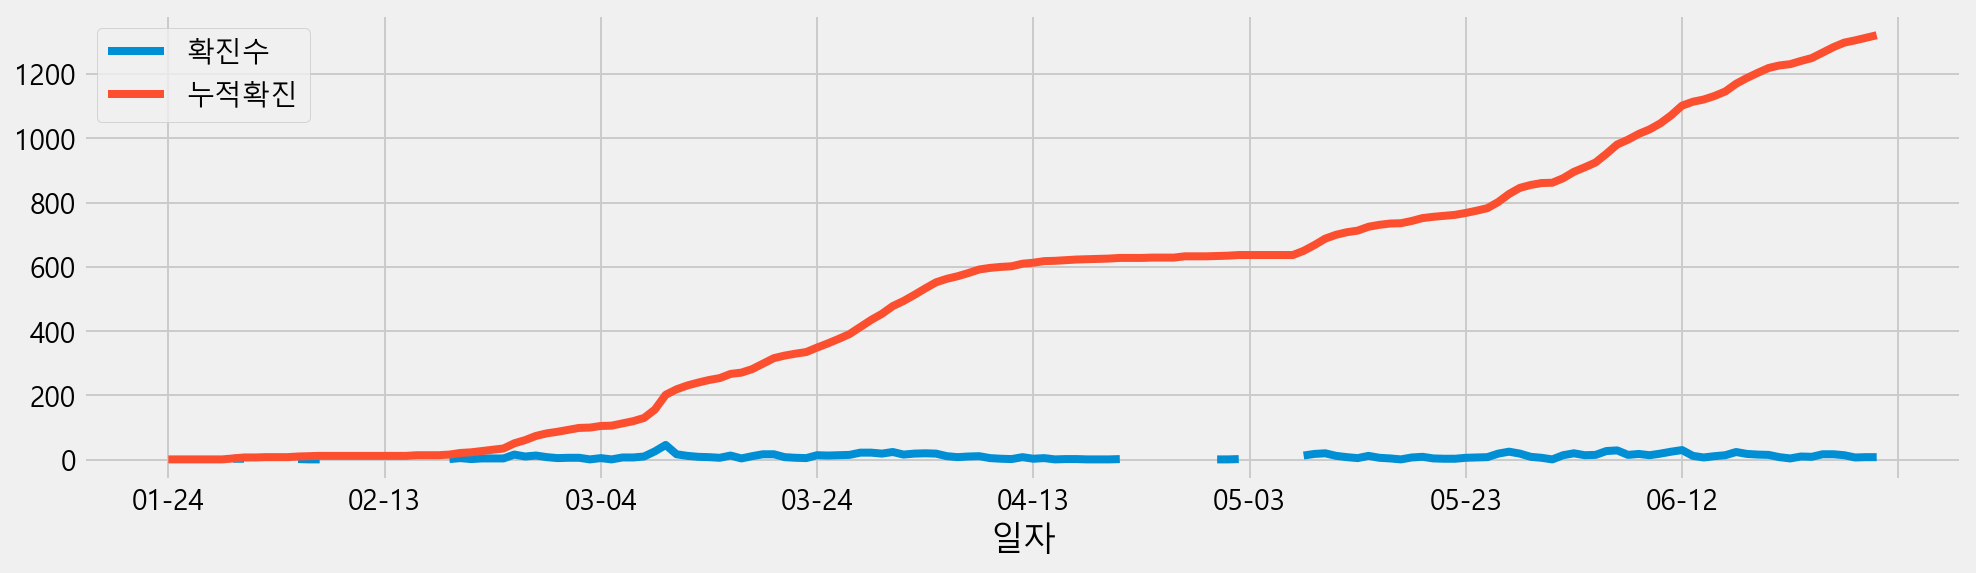

In [85]:
cum_day.plot(figsize = (15,4))

 ## 시리즈로 그리기

<AxesSubplot:xlabel='일자'>

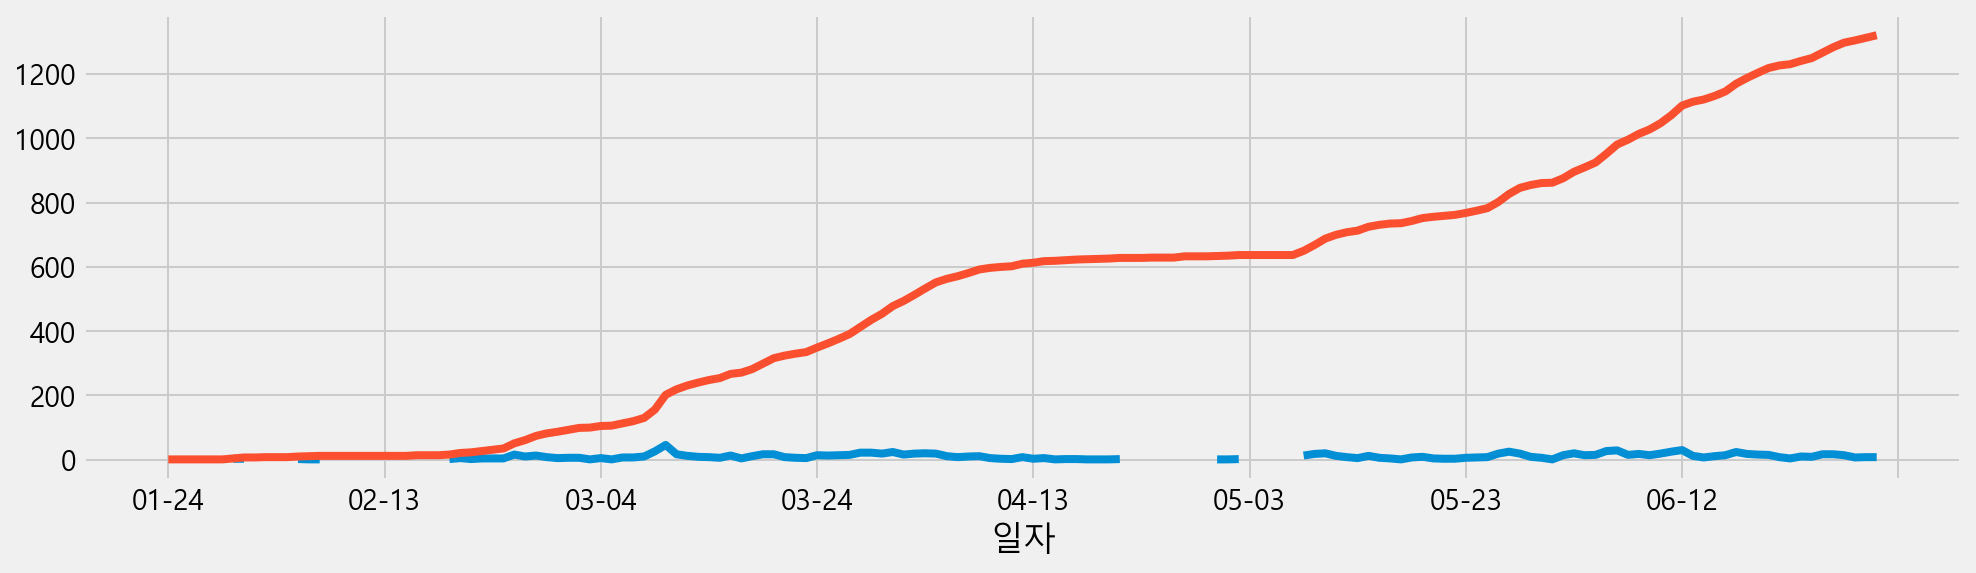

In [86]:
# 시리즈로 2개의 그래프 그리기
# 그래프의 위아래 위치를 바꿀 수 있다.

cum_day["확진수"].plot(figsize = (15,4))
cum_day["누적확진"].plot(figsize = (15,4))

 ## 확진자수만 따로 그리기

<AxesSubplot:xlabel='일자'>

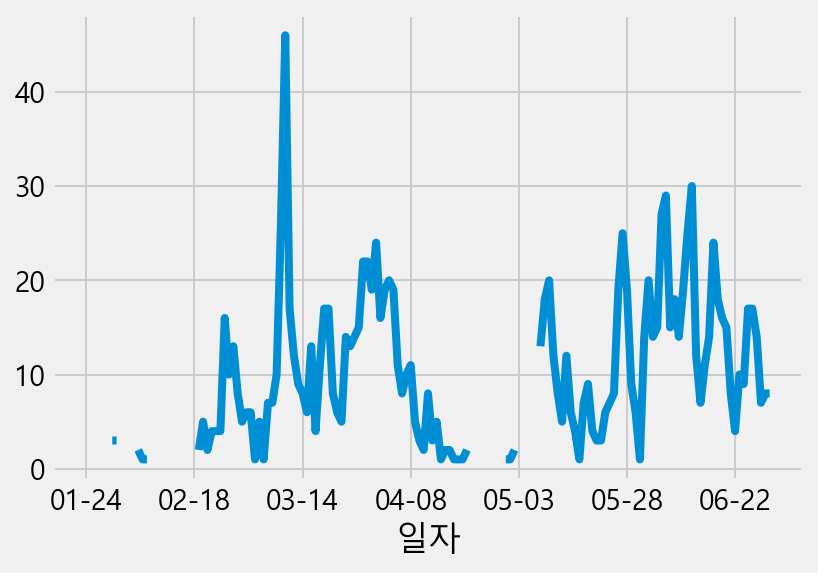

In [87]:
cum_day["확진수"].plot()

 ## 누적확진만 따로 그리기

<AxesSubplot:xlabel='일자'>

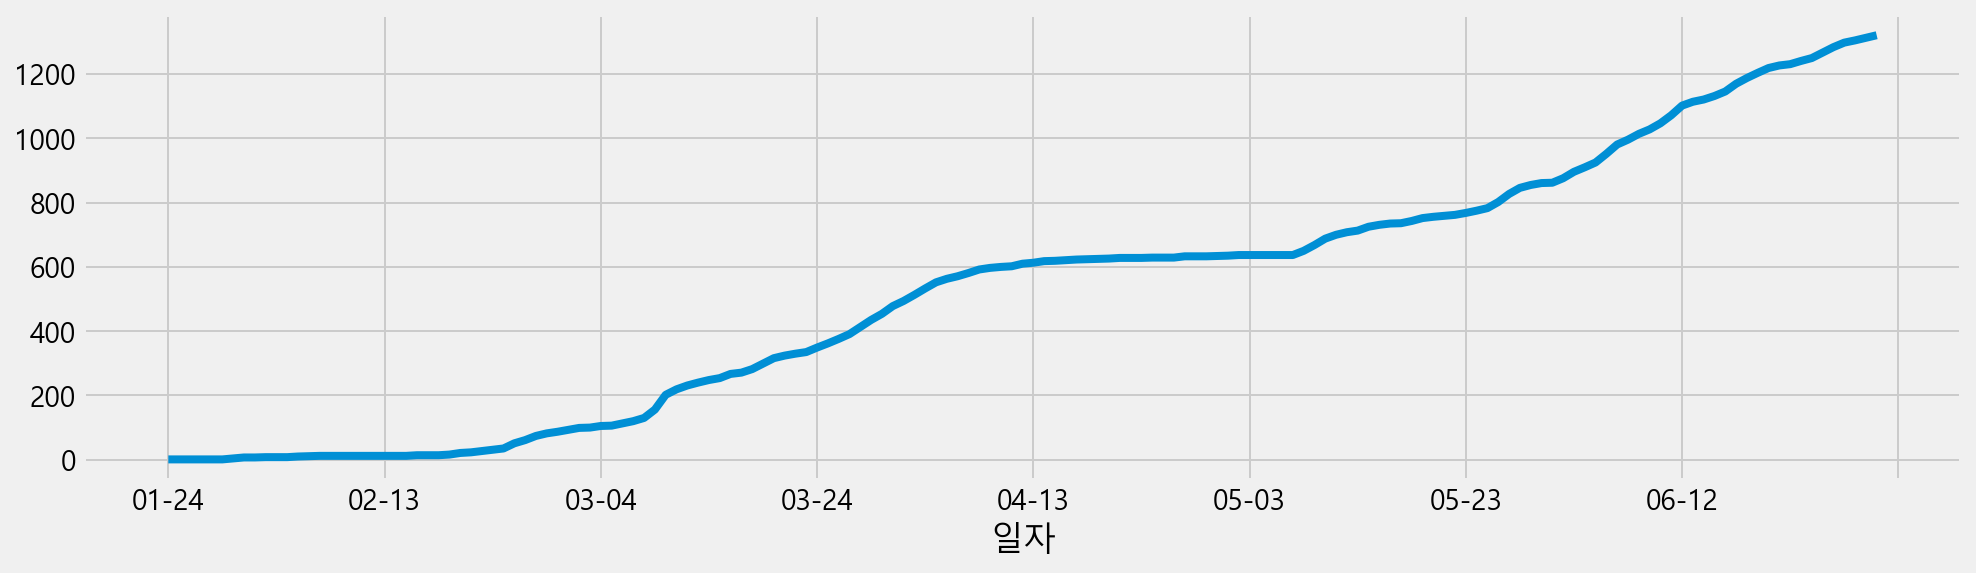

In [88]:
cum_day["누적확진"].plot(figsize=(15,4))

## 로그스케일 적용방법
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다

<AxesSubplot:xlabel='일자'>

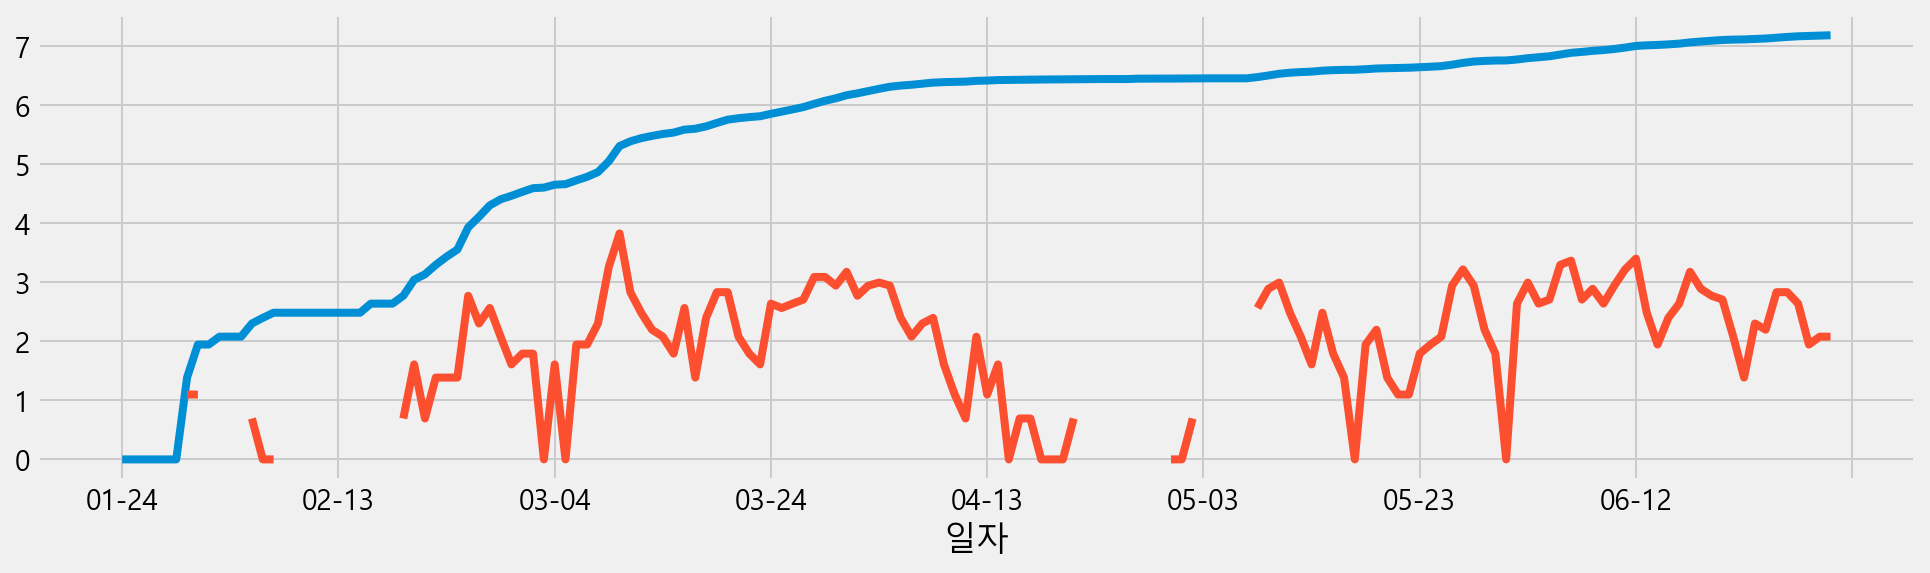

In [89]:
np.log(cum_day["누적확진"]).plot(figsize=(15,4))
np.log(cum_day["확진수"]).plot()

# 확진월과 요일 구하기

In [90]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day

,확진일자,확진수,누적확진,일자,확진월
0,2020-01-24,1.0,1.0,01-24,1
1,2020-01-25,NaN,1.0,01-25,1
2,2020-01-26,NaN,1.0,01-26,1
3,2020-01-27,NaN,1.0,01-27,1
4,2020-01-28,NaN,1.0,01-28,1
...,...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26,6
155,2020-06-27,14.0,1298.0,06-27,6
156,2020-06-28,7.0,1305.0,06-28,6
157,2020-06-29,8.0,1313.0,06-29,6


 ### datatime에서 요일을 추출하는 방법
 * 월요일이 0, 일요일이 6으로 표시된다

In [91]:
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1
...,...,...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26,6,4
155,2020-06-27,14.0,1298.0,06-27,6,5
156,2020-06-28,7.0,1305.0,06-28,6,6
157,2020-06-29,8.0,1313.0,06-29,6,0


 ## 요일별 확진 수

### unstack()으로 멀티인데스의 마지막 인덱스를 컬럼으로 전환하는 방법
 * 멀티인덱스의 가장 마지막 인덱스를 column으로 전환한다.

In [92]:
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week.head(10)

확진월  확진요일
1    0        0.0
     1        0.0
     2        0.0
     3        3.0
     4        4.0
     5        0.0
     6        0.0
2    0        4.0
     1       16.0
     2       14.0
Name: 확진수, dtype: float64

In [93]:
print(all_day_week.index)

MultiIndex([(1, 0),
            (1, 1),
            (1, 2),
            (1, 3),
            (1, 4),
            (1, 5),
            (1, 6),
            (2, 0),
            (2, 1),
            (2, 2),
            (2, 3),
            (2, 4),
            (2, 5),
            (2, 6),
            (3, 0),
            (3, 1),
            (3, 2),
            (3, 3),
            (3, 4),
            (3, 5),
            (3, 6),
            (4, 0),
            (4, 1),
            (4, 2),
            (4, 3),
            (4, 4),
            (4, 5),
            (4, 6),
            (5, 0),
            (5, 1),
            (5, 2),
            (5, 3),
            (5, 4),
            (5, 5),
            (5, 6),
            (6, 0),
            (6, 1),
            (6, 2),
            (6, 3),
            (6, 4),
            (6, 5),
            (6, 6)],
           names=['확진월', '확진요일'])


In [94]:
# 위에서 마지막 인덱스인 두번째 요일 인덱스가 column으로 전환되었다.
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [95]:
#숫자로 표현된 요일을 문자로 바꿔주기
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

### column명 바꾸기

In [96]:
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


### 데이터프레임 색상 지정해주기

In [97]:
all_day_week.style.background_gradient()

#column 기준으로 숫자가 가장 높을수록 진하다

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [98]:
all_day_week.style.background_gradient(cmap = "Greens")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [99]:
all_day_week.style.background_gradient(cmap = "Blues_r")
#뒤에 _r을 붙여주면 적은게 진하게, 많은게 옅게 나온다.

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


 # 거주지별 확진자

In [100]:
# 구별 확진자의 빈도수를 구합니다.
gu_count =df["거주지"].value_counts()
gu_count.head()

관악구    117
구로구     86
강남구     83
강서구     78
양천구     70
Name: 거주지, dtype: int64

 ### barh로 막대그래프 축 바꿔서 그리기

<AxesSubplot:>

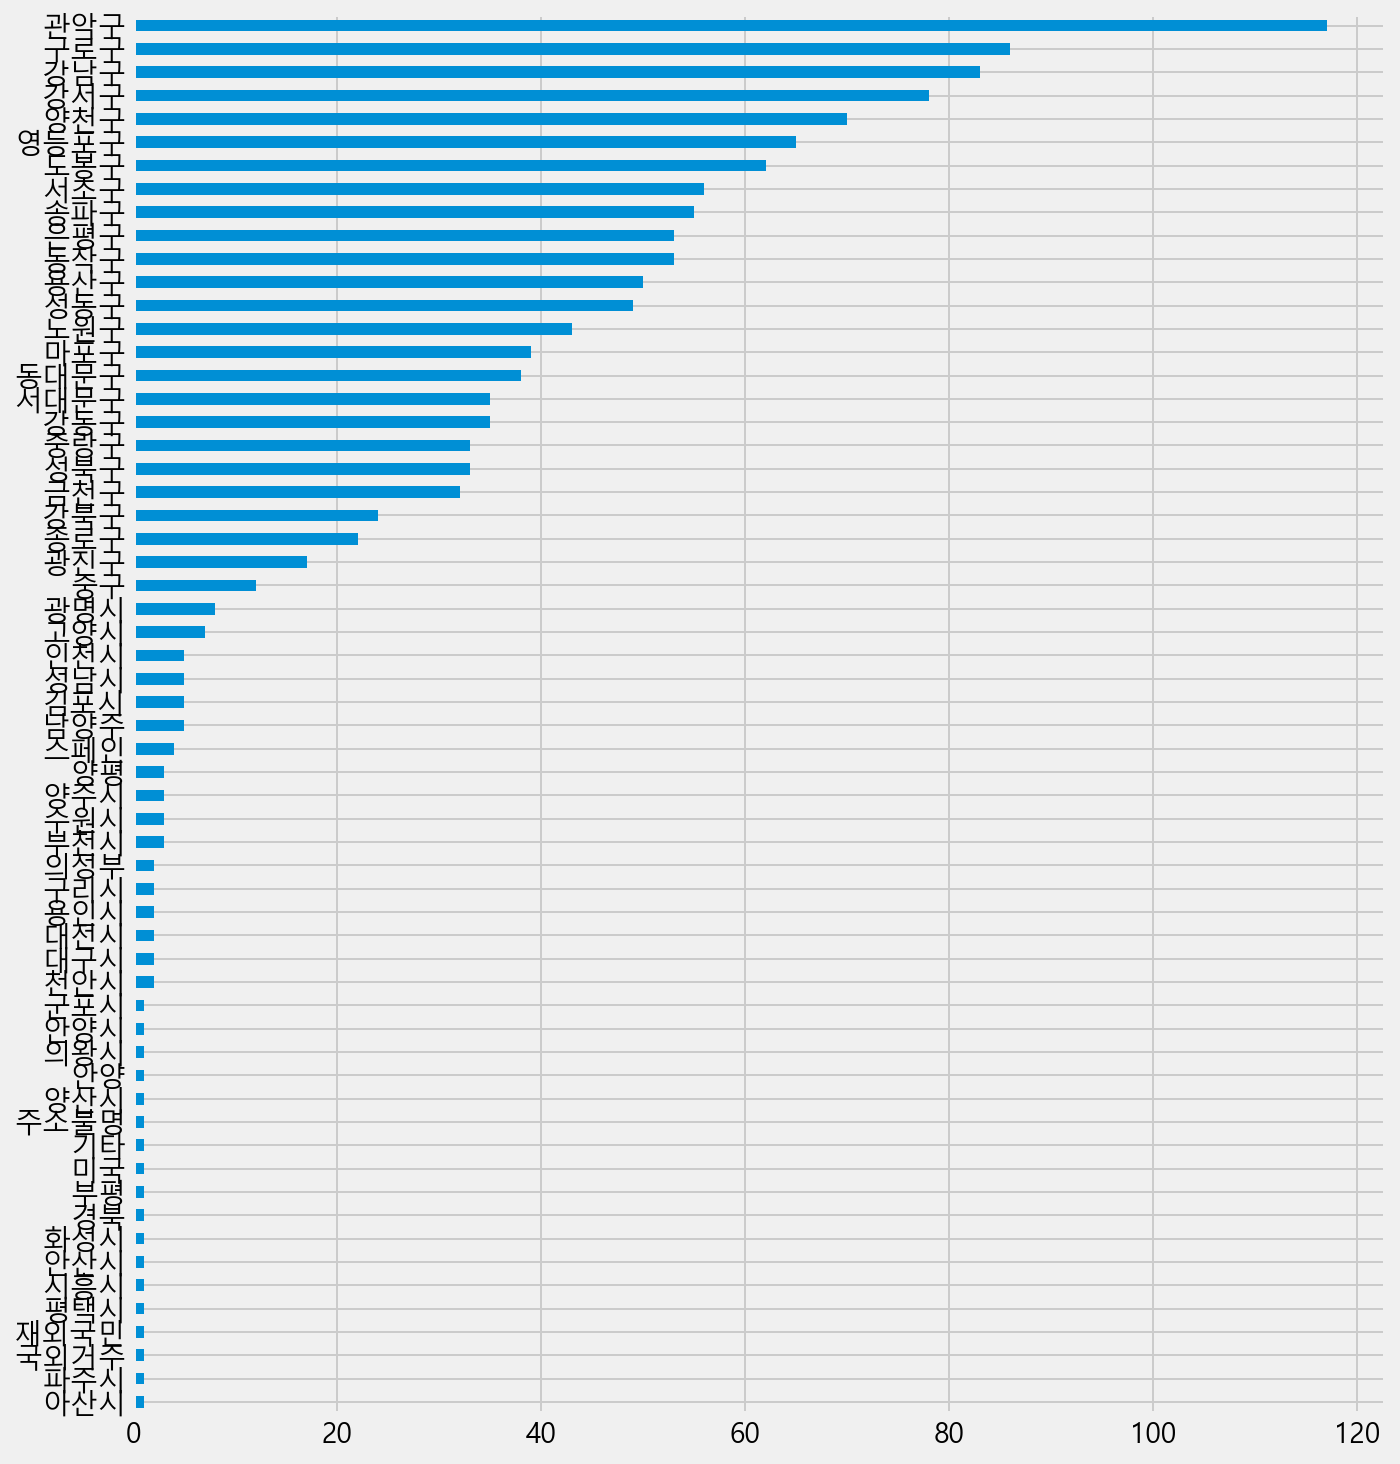

In [101]:
# 구별 확진자를 시각화 합니다.
gu_count.sort_values().plot.barh(figsize=(10, 12))

In [102]:
gu = gu_count[:25].index
gu

Index(['관악구', '구로구', '강남구', '강서구', '양천구', '영등포구', '도봉구', '서초구', '송파구', '은평구',
       '동작구', '용산구', '성동구', '노원구', '마포구', '동대문구', '서대문구', '강동구', '중랑구', '성북구',
       '금천구', '강북구', '종로구', '광진구', '중구'],
      dtype='object')

In [103]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.
set(gu_count.index) - set(gu)

{'경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [104]:
# 데이터프레임 형태로 바꿔줍니다.
df_gu = gu_count.reset_index()
df_gu.head()

,index,거주지
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


In [105]:
# 컬럼명을 바꿔줍니다.
df_gu.columns = ["구", "확진수"]
df_gu.head()

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


 ### df.isin(values)

In [106]:
# df.isin(values)로 df가 values를 포함하는지 boolean로 나타낸다.
df_gu[df_gu["구"].isin(gu)].head()

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


In [107]:
# ~표시를 해주면 반대로 보여줄 수 있다.
df_gu[~df_gu["구"].isin(gu)].head()

,구,확진수
25,광명시,8
26,고양시,7
27,성남시,5
28,인천시,5
29,김포시,5


In [108]:
# df.loc[행조건, 열]
df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구


In [109]:
# 서울을 제외한 타지역은 지역 컬럼에서 타지역이라는 값을 넣어준다.
df["지역"] = df["지역"].fillna("타지역")
df["지역"].unique()

array(['영등포구', '관악구', '금천구', '마포구', '타지역', '은평구', '노원구', '서초구', '송파구',
       '구로구', '용산구', '양천구', '강남구', '동대문구', '중구', '동작구', '광진구', '중랑구',
       '강서구', '종로구', '도봉구', '강동구', '성북구', '성동구', '서대문구', '강북구'],
      dtype=object)

In [110]:
df[~df["거주지"].isin(gu)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
16,1305,12754,6.28.,남양주,-,확인 중,서울의료원,2020-06-28,6,26,06-28,타지역
57,1264,12593,6.25.,광명시,-,왕성교회 관련,타시도 이관,2020-06-25,6,26,06-25,타지역
72,1249,12557,6.24.,양산시,-,확인 중,서울의료원,2020-06-24,6,26,06-24,타지역
...,...,...,...,...,...,...,...,...,...,...,...,...
1282,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25,타지역
1286,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25,타지역
1303,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,02-20,타지역
1309,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,02-07,타지역


 ### 람다함수 안에 조건 적용하기

In [111]:
# 위의 방법을 람다함수로 시도해보기
df["지역"] = df["거주지"].map(lambda x:x if x in gu else "타지역")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구


In [112]:
df[["거주지", "지역"]]

,거주지,지역
0,영등포구,영등포구
1,관악구,관악구
2,영등포구,영등포구
3,관악구,관악구
4,관악구,관악구
...,...,...
1316,성북구,성북구
1317,마포구,마포구
1318,종로구,종로구
1319,중랑구,중랑구


In [113]:
#지역 칼럼으로 확진자 빈도수를 구합니다.
gu_etc_count= df["지역"].value_counts()
gu_etc_count

관악구     117
구로구      86
강남구      83
타지역      81
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
은평구      53
동작구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
강동구      35
서대문구     35
중랑구      33
성북구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

 ### sort_values()로 정렬하기

<AxesSubplot:>

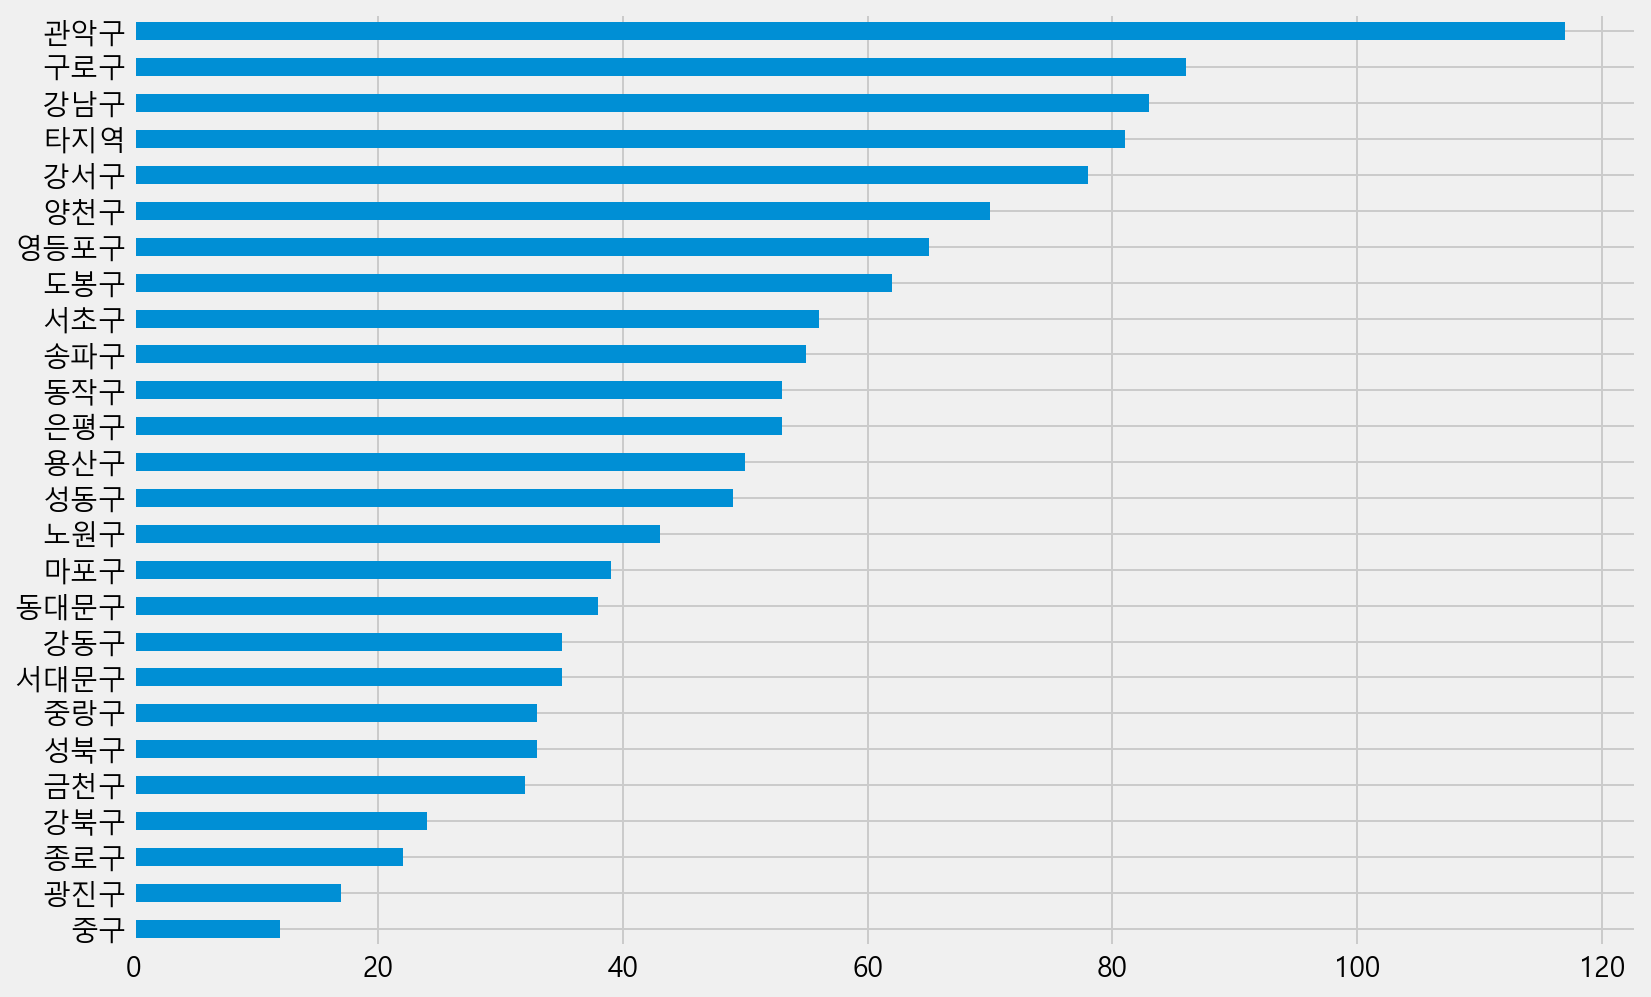

In [114]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.
gu_etc_count.sort_values().plot.barh(figsize=(12,8))

 # 접촉력

In [115]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

해외 접촉 추정       280
이태원 클럽 관련      139
리치웨이 관련        119
확인 중            99
구로구 콜센터 관련      60
요양시설 관련         43
양천구 운동시설 관련     43
구로구 교회 관련       41
확인중             39
타시도 확진자 접촉      38
콜센터직원 접촉        37
수도권 개척교회 관련     37
동대문구 관련         28
왕성교회 관련         25
부천시 쿠팡 관련       24
해외 접촉           22
은평구 병원 관련       14
kb 생명보험 관련      13
성동구 아파트 관련      13
강남구 역삼동 모임       8
Name: 접촉력, dtype: int64

 ### unique()로 고유한 값 찾기

In [116]:
# unique()는 데이터에 고유한 값을 찾을 때 사용합니다

In [117]:
df["접촉력"].unique()

array(['영등포구 확진자 접촉', '확인 중', '강남구 역삼동 모임', '왕성교회 관련', '대전 꿈꾸는 교회',
       '타시도 확진자 접촉', '리치웨이 관련', '해외 접촉 추정', '용산구 확진자 접촉', '구로구 확진자 접촉',
       '관악구 확진자 접촉', '동작구 확진자 접촉', '금천구 확진자 접촉', '강서구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '은평구 확진자 접촉', '대전 다단계 관련', '오렌지라이프 관련',
       '수도권 개척교회 관련', '서초구 확진자 접촉', '타시도 확진자 접촉자', '연아나뉴스클래스 관련',
       '한국대학생선교회 관련', '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련',
       '용인 형제 관련', '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련',
       '영등포 학원 관련', '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련',
       '#10054 접촉', '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련',
       '#10407 접촉', '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉',
       '#10142 접촉', '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)',
       '#8063 접촉', '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉',
       '콜센터직원 접촉', '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉',
       '#9572 접촉',

 ### .str.contains("글자")로 글자가 포함된 값 찾기 

In [118]:
# "확인"이 들어가는 접촉력만 찾습니다.
# bool 형태로 값이 나옵니다.
df["접촉력"].str.contains("확인")

0       False
1        True
2        True
3       False
4       False
        ...  
1316    False
1317    False
1318    False
1319    False
1320    False
Name: 접촉력, Length: 1321, dtype: bool

In [119]:
# df[]로 감싸주면 true만 필터링되서 나옵니다
df[df["접촉력"].str.contains("확인")]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
...,...,...,...,...,...,...,...,...,...,...,...,...
1265,56,1611,2.25.,고양시,-,확인중,보라매병원(퇴원),2020-02-25,2,9,02-25,타지역
1279,42,996,2.25.,노원구,-,확인중,보라매병원(퇴원),2020-02-25,2,9,02-25,노원구
1282,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,02-25,타지역
1283,38,935,2.25.,관악구,-,확인중,삼육서울병원(퇴원),2020-02-25,2,9,02-25,관악구


 ### df.loc[행조건, 열]

In [120]:
# 접촉력 컬럼에서 조건에 맞는 행만 추출합니다 
df.loc[df["접촉력"].str.contains("확인"), "접촉력"]

1       확인 중
2       확인 중
8       확인 중
9       확인 중
10      확인 중
        ... 
1265     확인중
1279     확인중
1282     확인중
1283     확인중
1286     확인중
Name: 접촉력, Length: 138, dtype: object

In [121]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [122]:
# "확인 중", "확인중"을 "확인 중"으로 통일합니다
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [123]:
# 위 조건이 잘 실행되는지 확인합니다.
df.loc[df["접촉력"].str.contains("확인"), "접촉력"]

1       확인 중
2       확인 중
8       확인 중
9       확인 중
10      확인 중
        ... 
1265    확인 중
1279    확인 중
1282    확인 중
1283    확인 중
1286    확인 중
Name: 접촉력, Length: 138, dtype: object

In [124]:
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

In [125]:
# 다시 접촉력 빈도수를 구합니다.
contact_count = df["접촉력"].value_counts()
contact_count

해외 접촉 추정      280
이태원 클럽 관련     139
확인 중          138
리치웨이 관련       119
구로구 콜센터 관련     60
             ... 
#7914 접촉        1
#9572 접촉        1
#9621 접촉        1
대전 다단계 관련       1
#3 접촉           1
Name: 접촉력, Length: 128, dtype: int64

<AxesSubplot:>

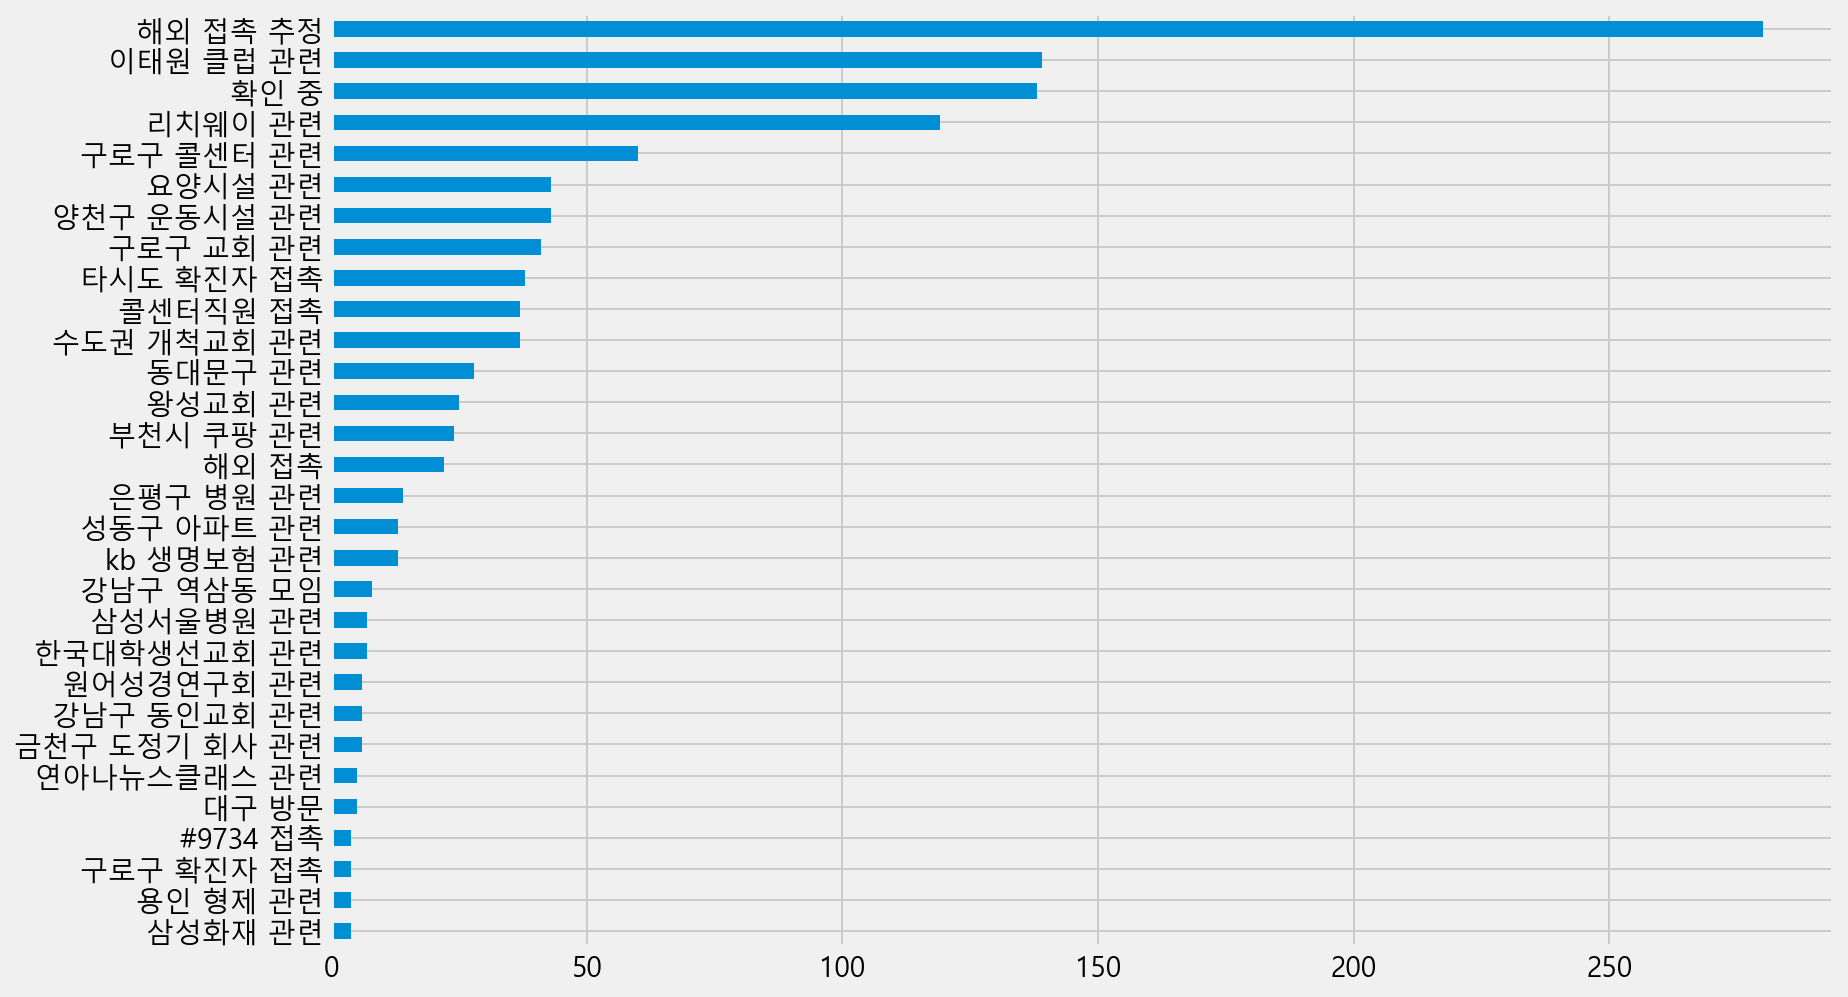

In [126]:
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(12,8))

In [127]:
top_contact = contact_count_top.tail(15)
top_contact

해외 접촉           22
부천시 쿠팡 관련       24
왕성교회 관련         25
동대문구 관련         28
수도권 개척교회 관련     37
콜센터직원 접촉        37
타시도 확진자 접촉      38
구로구 교회 관련       41
양천구 운동시설 관련     43
요양시설 관련         43
구로구 콜센터 관련      60
리치웨이 관련        119
확인 중           138
이태원 클럽 관련      139
해외 접촉 추정       280
Name: 접촉력, dtype: int64

In [128]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다
top_contact.index

Index(['해외 접촉', '부천시 쿠팡 관련', '왕성교회 관련', '동대문구 관련', '수도권 개척교회 관련', '콜센터직원 접촉',
       '타시도 확진자 접촉', '구로구 교회 관련', '양천구 운동시설 관련', '요양시설 관련', '구로구 콜센터 관련',
       '리치웨이 관련', '확인 중', '이태원 클럽 관련', '해외 접촉 추정'],
      dtype='object')

In [129]:
# 위에서 구한 top_contact에 해당하는 데이터만 isin으로 가져옵니다.
# isin으로 가져오면 bool형태로 오는데 이걸 df[]로 감싸주면 true값만 가져온다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
6,1315,12810,6.30.,금천구,-,왕성교회 관련,서남병원,2020-06-30,6,27,06-30,금천구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구


In [130]:
# 접촉력, 월별 빈도수를 groupby로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,0,0,35,6,0,0
구로구 콜센터 관련,0,0,60,0,0,0
동대문구 관련,0,0,28,0,0,0
리치웨이 관련,0,0,0,0,0,119
부천시 쿠팡 관련,0,0,0,0,19,5
수도권 개척교회 관련,0,0,0,0,0,37
양천구 운동시설 관련,0,0,0,0,0,43
왕성교회 관련,0,0,0,0,0,25
요양시설 관련,0,0,0,0,0,43


 ## 이태원 클럽 관련 확진자 찾기

In [131]:
# 6월달에 이태원 클럽 관련 확진자를 찾습니다.
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
341,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06,성동구
356,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06,은평구
365,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원,2020-06-06,6,23,06-06,성동구
372,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05,은평구
387,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05,성동구
445,876,11535,6.01.,강동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-01,6,23,06-01,강동구


 ## 감염경로 불명

In [132]:
# "접촉력"이 "확인 중"인 데이터만 구합니다
df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역


<AxesSubplot:xlabel='월,주'>

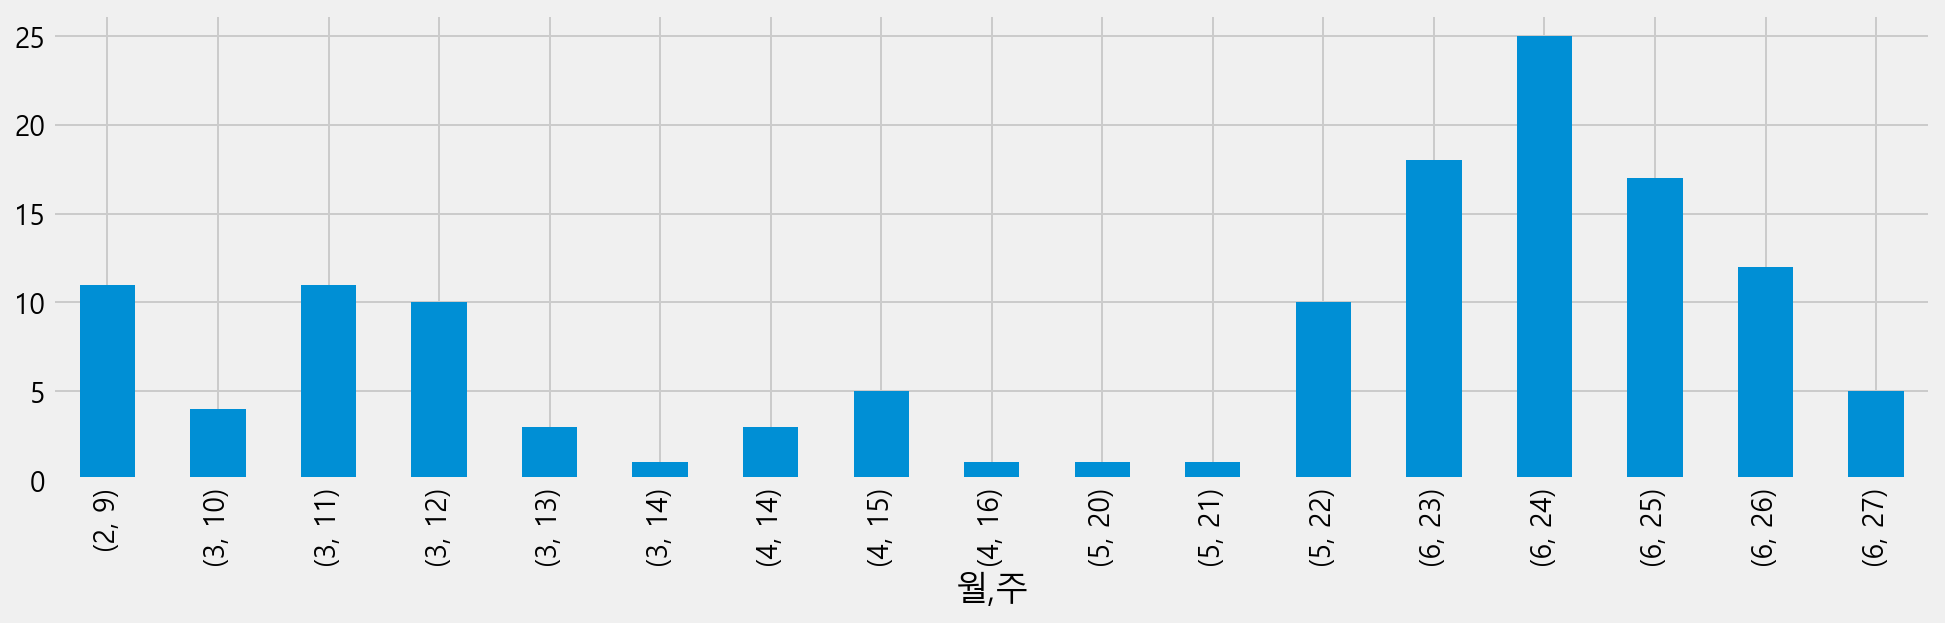

In [133]:
# 감염경로 불명이 어느정도인지 봅니다
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15,4))

In [134]:
#전체 확진수를 value_counts로 구하고 .to_frame으로 데이터프레임 형태로 만듭니다.
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
23,134
14,128
24,125
11,124
25,106


In [135]:
# 불명확진수를 value_counts()로 구하고 .to_frame()으로 데이터프레임형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()

# 칼럼 이름을 "불명확진수"로 바꿔줍니다.
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
24,25
23,18
25,17
26,12
11,11


In [136]:
# all_weekly_case와 unknown_weekly_case를 비교해봅니다
# merge는 시리즈형태의 데이터에는 적용할 수 없습니다. 데이터프레임 형태는 가능합니다.
unkown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unkown_case=unkown_case.sort_index()
unkown_case

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,10
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


<AxesSubplot:>

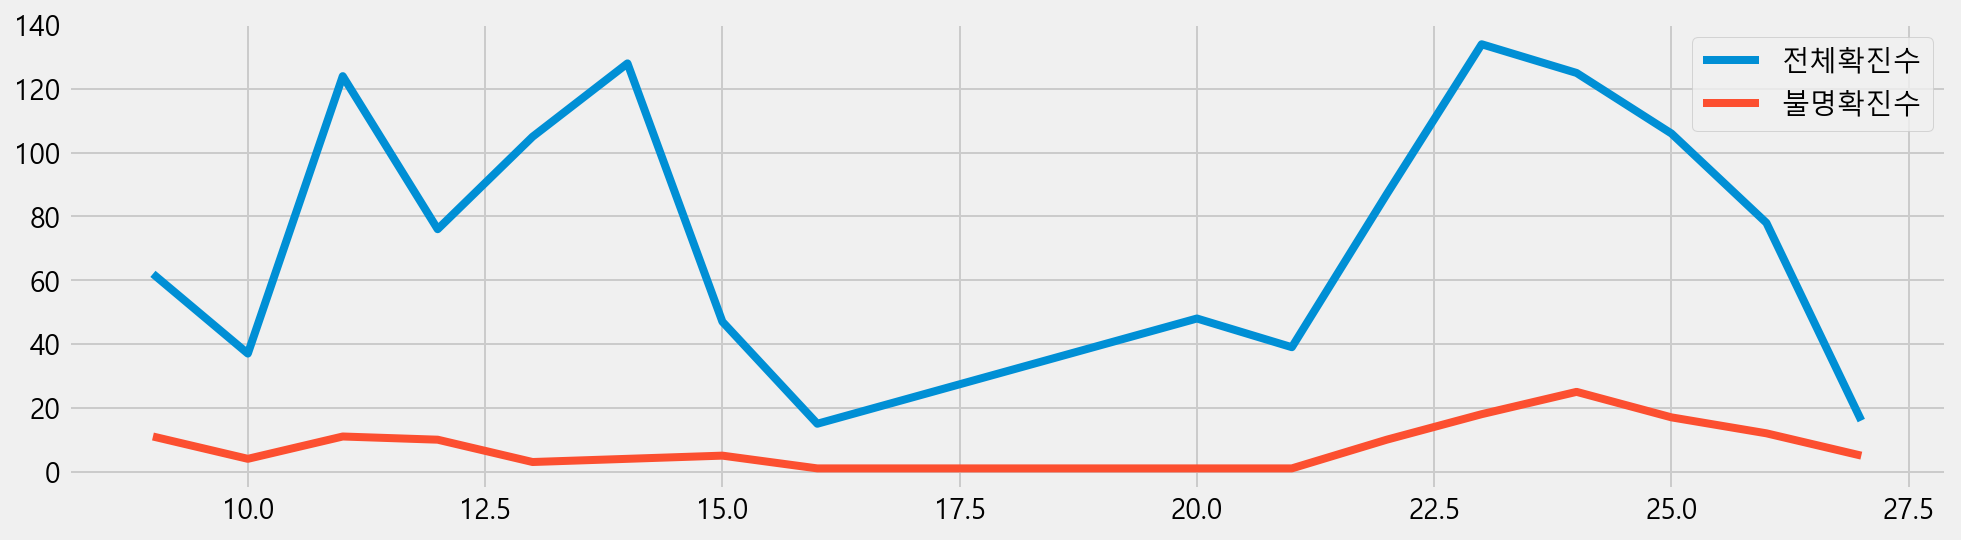

In [137]:
# 위에서 구한 결과를 시각화 합니다.

unkown_case.plot(figsize=(15,4))

<AxesSubplot:>

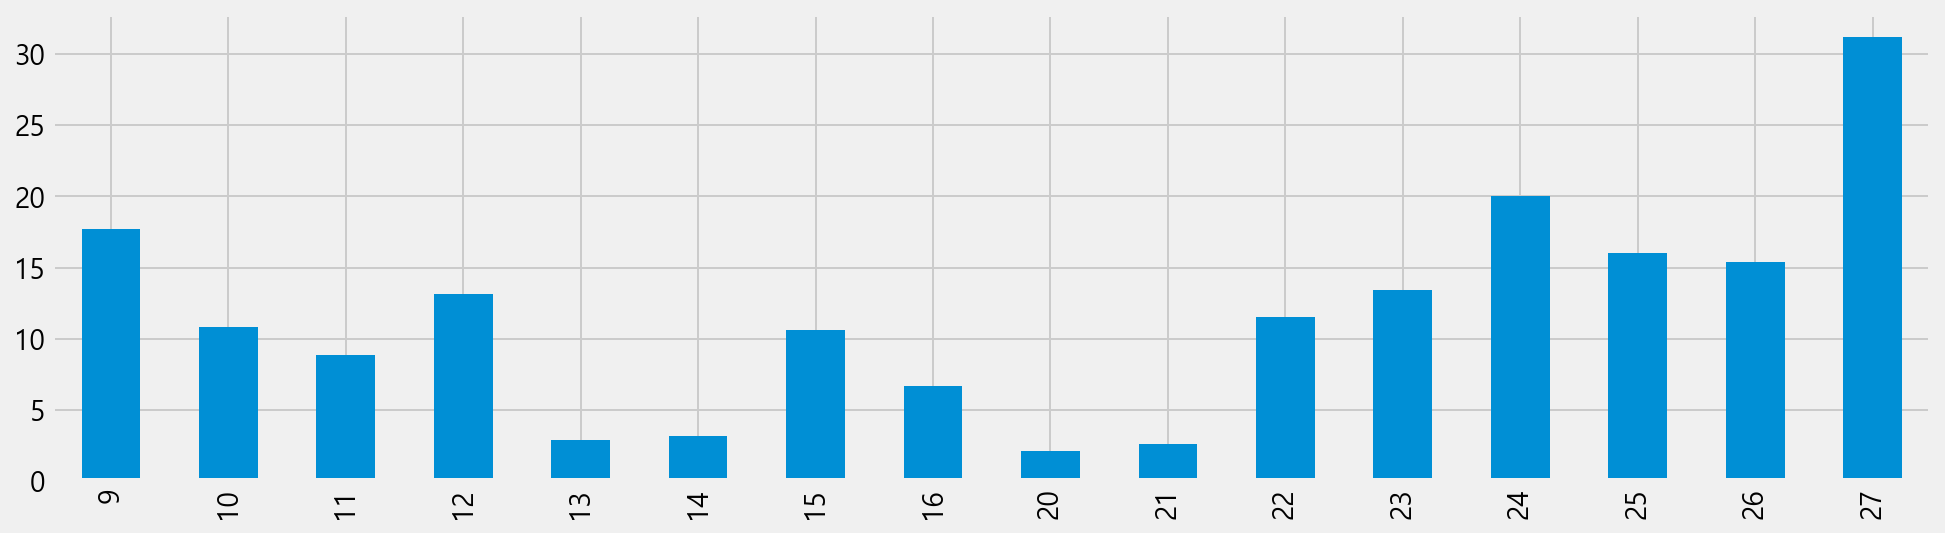

In [138]:
# 감염경로 "확인 중"의 주별 비율

unkown_case["확인중의 비율"] = (unkown_case["불명확진수"] / unkown_case["전체확진수"]) * 100
unkown_case["확인중의 비율"].plot.bar(figsize=(15,4))

 # 가장 많은 전파가 일어난 번호

In [139]:
#정규표현식 라이브러리를 불러옵니다.
import re

 ### 정규표현식 메서드 re.sub() 활용방법

In [140]:
# 숫자외의 데이터는 제거하는 정규표현식
# re.sub()을 활용해서 "7265 접촉(추정)"을 "7265"으로 바꿈

def get_number(text):
    return re.sub("[^0-9]", "", text)
# text에 입력된 데이터에서 숫자가 아닌 부분을 공백으로 바꿔줌

In [141]:
#7265가 str타입으로 나옴
get_number("#7265 접촉(추정)")

'7265'

In [142]:
# 함수 map()을 통해 접촉번호를 구합니다.
#map(func, *iterables) --> map object, get_number가 func이고 df["접촉력"]에 있는 데이터가 iterab역할임
df["접촉번호"]=df["접촉력"].map(get_number)
df["접촉번호"]

0        
1        
2        
3        
4        
       ..
1316    5
1317     
1318    3
1319     
1320     
Name: 접촉번호, Length: 1321, dtype: object

In [143]:
df["접촉번호"].value_counts()

         1236
6           4
9734        4
8791        3
8271        3
         ... 
8057        1
8079        1
11196       1
9020        1
3           1
Name: 접촉번호, Length: 62, dtype: int64

 ### .reset_index()로 series의 인덱스를 df의 첫번째 컬럼으로 바꾸는 법

In [144]:
# .reset_index()를 활용해서 "접촉번호"의 인덱스를 "index" 컬럼으로 만들고 새로운 인덱스가 있는 df형식으로 만들어준다. 
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,1236
1,6,4
2,9734,4
3,8791,3
4,8271,3


 ### drop()으로 행 지우기

In [145]:
# 접촉번호가 없는 0번 행은 drop으로 삭제합니다
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError가 납니다.
# 다시 실행했을 때 KeyError가 발생하는 것이 정상입니다
# drop()에서 axis=0으로 하면 행을 드랍, axis=1로 하면 컬럼을 드랍한다. axis는 0이 디폴트이다.

df_contact = contact.drop(0)
df_contact.head(10)

,index,접촉번호
1,6,4
2,9734,4
3,8791,3
4,8271,3
5,780,3
6,8486,3
7,794,2
8,8245,2
9,7923,2
10,9525,2


In [146]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니댜.
top_contact_no = df_contact["index"]
top_contact_no

1         6
2      9734
3      8791
4      8271
5       780
      ...  
57     8057
58     8079
59    11196
60     9020
61        3
Name: index, Length: 61, dtype: object

In [147]:
df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호
544,777,11220,5.25.,강서구,-,#11196 접촉,서울의료원(퇴원),2020-05-25,5,22,05-25,강서구,11196
701,620,10632,4.16.,강남구,-,#10054 접촉,서울의료원(퇴원),2020-04-16,4,16,04-16,강남구,10054
703,618,10610,4.14.,중구,-,#9800 접촉,보라매병원(퇴원),2020-04-14,4,16,04-14,중구,9800
708,613,10588,4.13.,성북구,-,#10044 접촉,적십자병원(퇴원),2020-04-13,4,16,04-13,성북구,10044
712,609,10528,4.12.,도봉구,스페인,#9641 접촉,서울의료원(퇴원),2020-04-12,4,15,04-12,도봉구,9641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,10,21,2.5.,성북구,-,#6 접촉,서울대학교병원(퇴원),2020-02-05,2,6,02-05,성북구,6
1314,7,11,1.31.,종로구,-,#6 접촉,서울대학교병원(퇴원),2020-01-31,1,5,01-31,종로구,6
1315,6,10,1.31.,종로구,-,#6 접촉,서울대학교병원(퇴원),2020-01-31,1,5,01-31,종로구,6
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구,5


 # 조치사항

In [148]:
# 조치사항에 대한 빈도수를 세어봅니다.
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구,
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구,
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구,
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구,5
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구,3
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,


In [149]:
df["조치사항"].value_counts()

서울의료원(퇴원)      339
보라매병원(퇴원)      186
서남병원(퇴원)       176
생활치료센터(퇴원)      79
서남병원            67
              ... 
서울삼성병원(퇴원)       1
서남병원(사망)         1
국군수도병원(퇴원)       1
중앙대학병원(퇴원)       1
서울대학교병원(사망)      1
Name: 조치사항, Length: 75, dtype: int64

 # 퇴원, 사망여부

In [150]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 어느 병원에 조치되었는지 병원별 컬럼도 만듭니다.
df["조치사항"]

0                 -
1             보라매병원
2           중앙대학교병원
3             보라매병원
4             보라매병원
           ...     
1316      서울의료원(퇴원)
1317      서울의료원(퇴원)
1318    서울대학교병원(퇴원)
1319      서울의료원(퇴원)
1320    국립중앙의료원(퇴원)
Name: 조치사항, Length: 1321, dtype: object

 ### .str.contains(text)로 text가 포함된 인덱스 구하기

In [151]:
# 사망, 퇴원 칼럼을 만듭니다.
# str.contains()로 df["조치사항"] 칼럼에서 "퇴원"이라는 글자를 포함하는지 boolean형태로 보여줍니다.
df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["사망"] = df["조치사항"].str.contains("사망")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구,,False,False
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구,,False,False
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구,5,True,False
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구,3,True,False
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False


In [152]:
# 병원 칼럼을 만듭니다.
# 역슬래쉬(\)를 "(", ")"앞에 써주지 않으면 (", ")"를 정규표현식으로 인식한다. 
df["병원"]=df["조치사항"].str.replace("\(퇴원\)", "")
df

C:\Users\wkdgu\AppData\Local\Temp/ipykernel_7040/370146575.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["병원"]=df["조치사항"].str.replace("\(퇴원\)", "")


,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구,,False,False,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구,,False,False,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구,5,True,False,서울의료원
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False,서울의료원
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구,3,True,False,서울대학교병원
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False,서울의료원


In [153]:
df["병원"].str.replace("\(사망\)", "")
df

C:\Users\wkdgu\AppData\Local\Temp/ipykernel_7040/1903162649.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["병원"].str.replace("\(사망\)", "")


,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구,,False,False,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구,,False,False,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구,5,True,False,서울의료원
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False,서울의료원
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구,3,True,False,서울대학교병원
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False,서울의료원


In [154]:
# 퇴원하지 못한 환자 수
df["퇴원"].value_counts()

True     1026
False     295
Name: 퇴원, dtype: int64

 ### .value_counts(normalize=True)로 비율 구하기

In [155]:
# 퇴원여부에 빈도수에 대한 비율을 구합니다.
df["퇴원"].value_counts(normalize=True)

True     0.776684
False    0.223316
Name: 퇴원, dtype: float64

In [156]:
# 사망여부에 따른 빈도수를 구합니다.
df["사망"].value_counts()

False    1314
True        7
Name: 사망, dtype: int64

In [157]:
# 사망여부에 따른 빈도수의 비율을 구합니다
df["사망"].value_counts(normalize=True)

False    0.994701
True     0.005299
Name: 사망, dtype: float64

In [158]:
# 가장 오래 입원해 있는 확진자 5명
df[(df["퇴원"] == False) & (df["사망"] == False) & (df["지역"] != "타지역")].tail(5)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
519,802,11256,5.27.,강서구,-,부천시 쿠팡 관련,강북삼성병원,2020-05-27,5,22,05-27,강서구,,False,False,강북삼성병원
527,794,11242,5.26.,도봉구,-,원어성경연구회 관련,원자력병원,2020-05-26,5,22,05-26,도봉구,,False,False,원자력병원
570,751,11092,5.19.,강북구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,강북구,,False,False,서울삼성병원
573,748,11093,5.19.,서초구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,서초구,,False,False,서울삼성병원
621,700,10941,5.11.,양천구,-,이태원 클럽 관련,서북병원,2020-05-11,5,20,05-11,양천구,,False,False,서북병원


 # 병원

In [159]:
# describe 으로 요악합니다
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 획수

df["병원"].describe()

count      1321
unique       50
top       서울의료원
freq        394
Name: 병원, dtype: object

In [160]:
# 병원의 빈도수를 구합니다.
hospital_count = df["병원"].value_counts()
hospital_count.head(10)

서울의료원      394
서남병원       243
보라매병원      240
생활치료센터      88
서북병원        68
국립중앙의료원     61
타시도 이관      47
은평성모병원      15
서울대학교병원     13
중앙대학교병원     12
Name: 병원, dtype: int64

<AxesSubplot:>

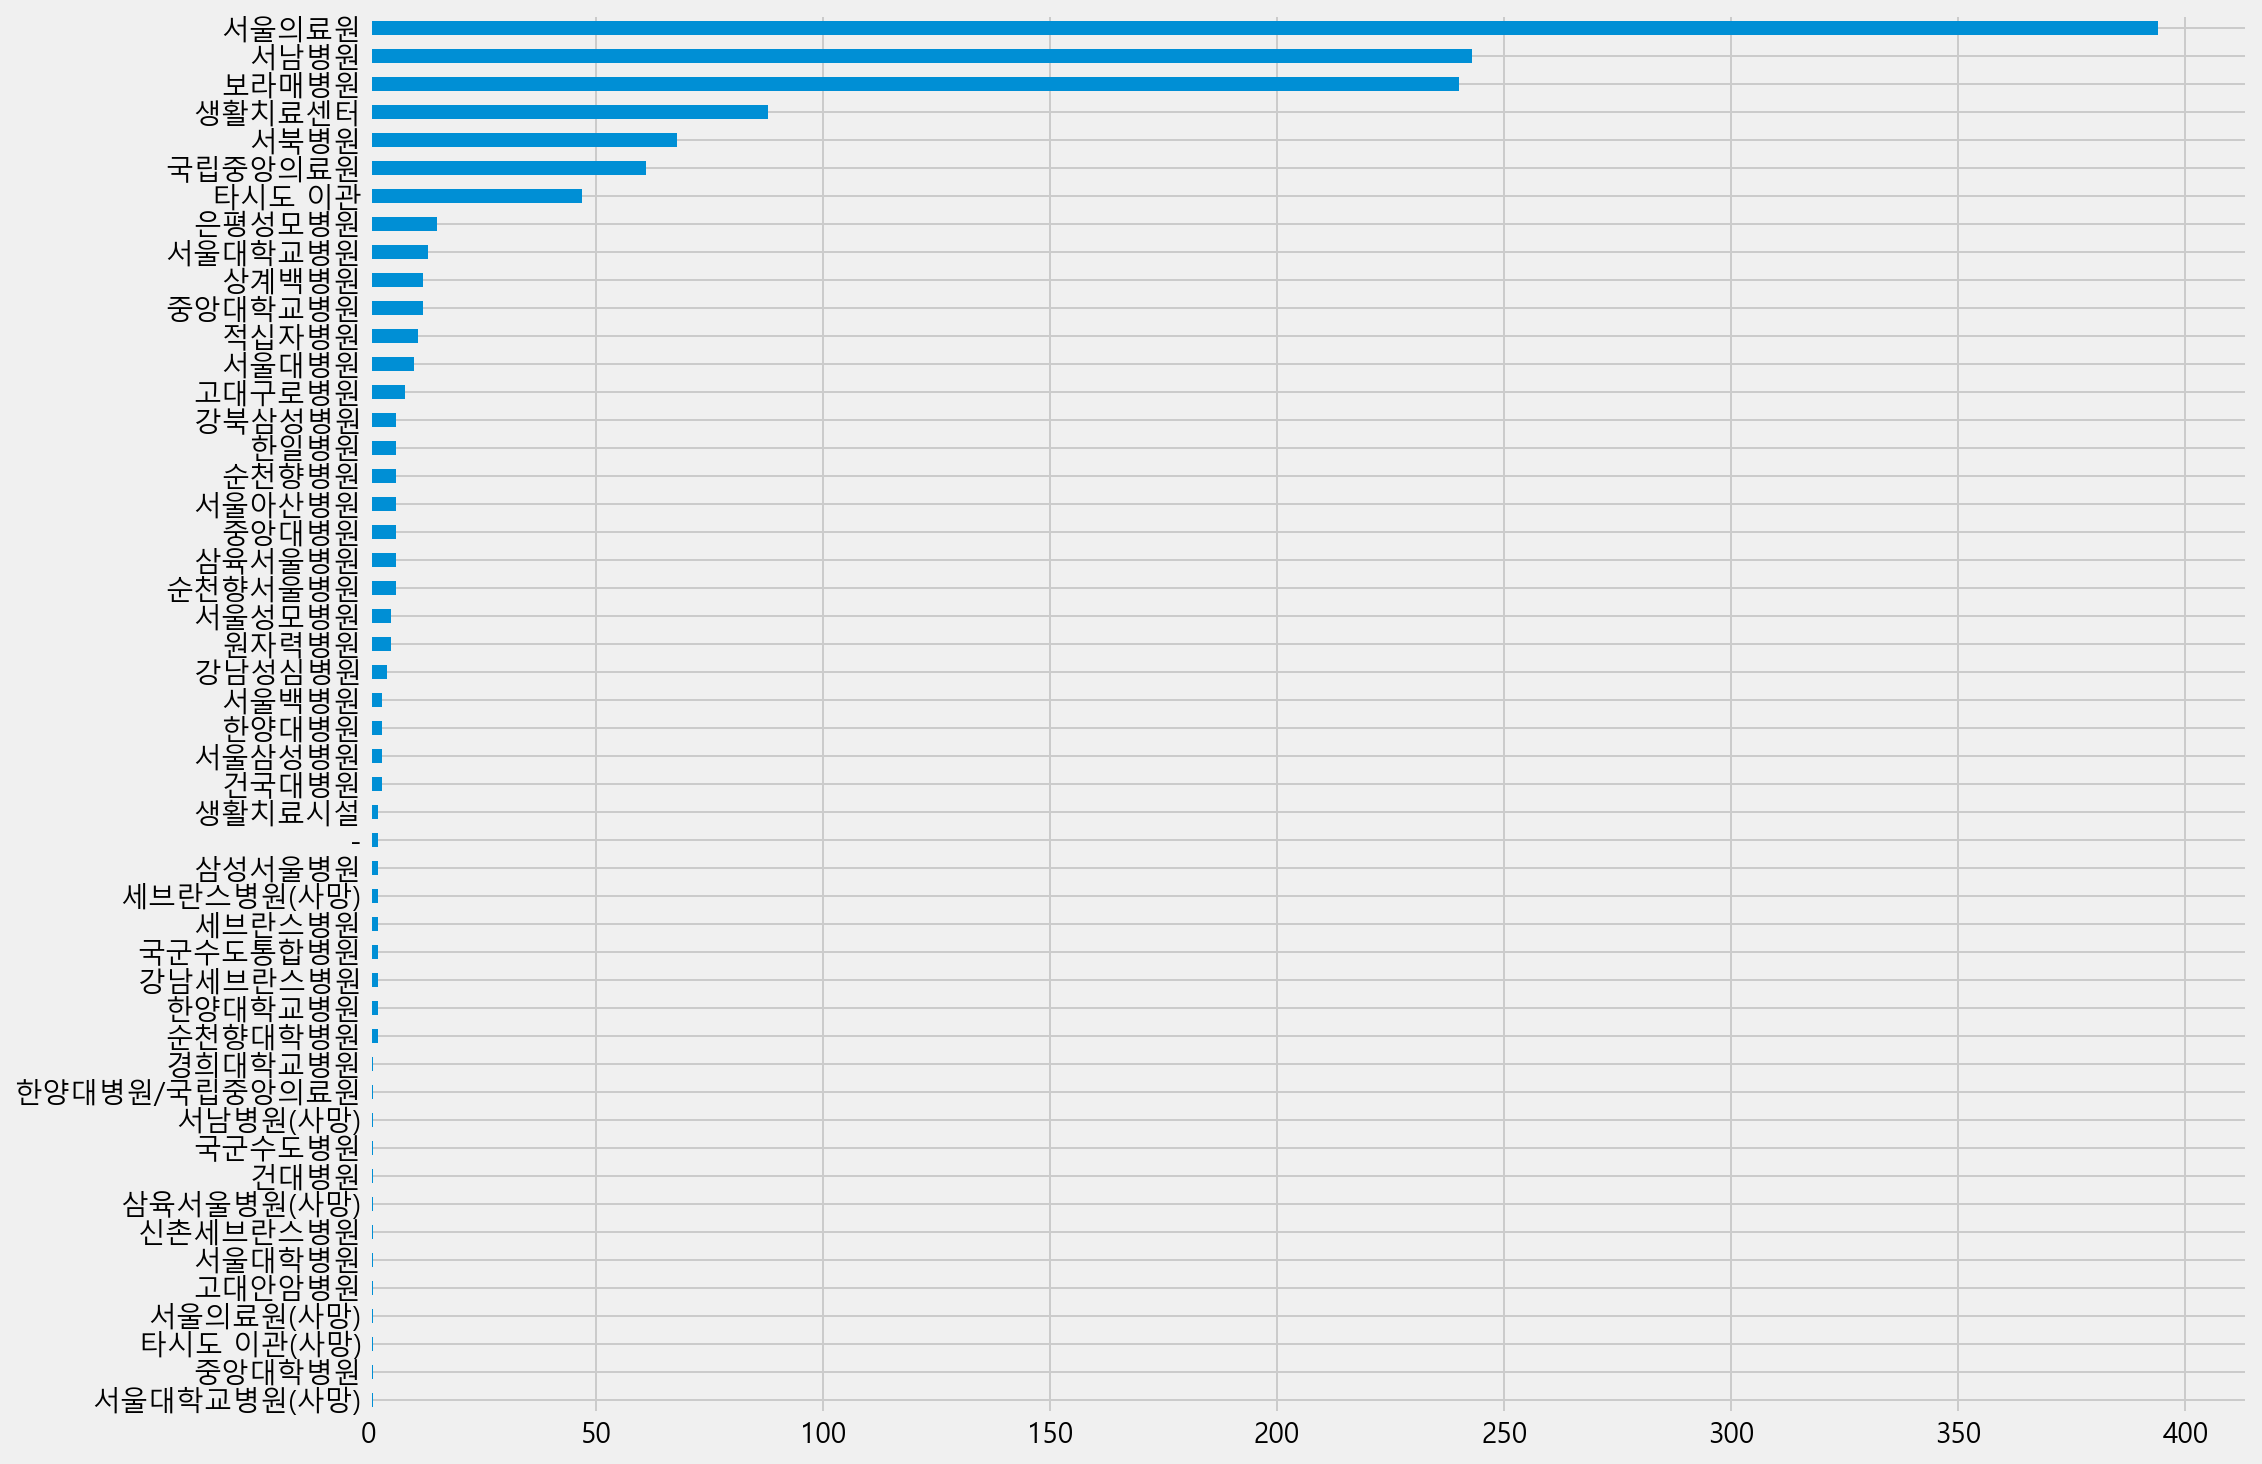

In [161]:
# 병원별 빈도수를 막대그래프로 표현합니다.
hospital_count.sort_values().plot.barh(figsize=(15,12))

In [162]:
# 입원환자가 많은 상위 10개의 병원을 구합니다.
# .index()를 통해서 병원명만 추출합니다ㅓ.
top_hospital_count = hospital_count.head(10)
top_hospital_index = top_hospital_count.index
top_hospital_index

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '중앙대학교병원'],
      dtype='object')

In [163]:
hospital_gu = df.groupby(["지역", "병원"])["연번"].count().unstack()
hospital_gu.head()

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원,고대안암병원,국군수도병원,...,적십자병원,중앙대병원,중앙대학교병원,중앙대학병원,타시도 이관,타시도 이관(사망),한양대병원,한양대병원/국립중앙의료원,한양대학교병원,한일병원
지역,,,,,,,,,,,,,,,,,,,,,
강남구,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강서구,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
관악구,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN


 ## iloc[행,열]은 index 기준이다.

In [164]:
# .iloc[행, 열] : index기준으로 한다.
hospital_gu.fillna(0).iloc[:8, :5]

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원
지역,,,,,
강남구,0.0,0.0,1.0,0.0,0.0
강동구,0.0,0.0,0.0,0.0,1.0
강북구,0.0,0.0,0.0,0.0,0.0
강서구,0.0,1.0,0.0,2.0,1.0
관악구,0.0,2.0,0.0,2.0,0.0
광진구,0.0,0.0,0.0,0.0,0.0
구로구,0.0,0.0,0.0,0.0,0.0
금천구,0.0,0.0,0.0,0.0,0.0


 ## loc[행, 열]은 label기준이다.

In [165]:
# loc[행, 열] : label기준이다.
hospital_gu.loc[["강남구", "강서구"], ["강남성심병원", "강남세브란스병원"]]

병원,강남성심병원,강남세브란스병원
지역,,
강남구,NaN,1.0
강서구,1.0,NaN


In [166]:
hospital_gu.loc[["강남구", "강서구"], top_hospital_index]

,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,중앙대학교병원
지역,,,,,,,,,,
강남구,26.0,7.0,21.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN
강서구,9.0,26.0,14.0,4.0,7.0,2.0,NaN,4.0,1.0,1.0


 ## heat맵 적용하기

In [167]:
hospital_gu_heatmap =hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap[top_hospital_index].style.background_gradient()
# 서울의료원은 도봉구에서 환자가 많이 왔다.

병원,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,중앙대학교병원
지역,,,,,,,,,,
강남구,26,7,21,6,2,4,0,0,0,0
강동구,23,2,0,0,1,4,0,0,0,1
강북구,11,5,2,1,0,1,0,0,0,0
강서구,9,26,14,4,7,2,0,4,1,1
관악구,21,24,41,9,4,3,0,1,0,1
광진구,9,1,2,0,1,1,0,0,1,0
구로구,16,23,25,1,3,12,0,0,0,0
금천구,1,15,13,0,0,1,0,1,0,0
노원구,29,1,3,0,4,1,0,0,0,0


In [168]:
hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()
# T로 행열을 전환시킴

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
병원,,,,,,,,,,,,,,,,,,,,,,,,,,
서울의료원,26,23,11,9,21,9,16,1,29,35,11,8,13,10,17,25,18,28,12,16,15,9,3,2,19,8
서남병원,7,2,5,26,24,1,23,15,1,7,5,12,13,6,7,4,2,6,33,25,2,10,3,1,1,2
보라매병원,21,0,2,14,41,2,25,13,3,3,8,24,3,3,13,6,2,2,14,8,6,10,4,3,3,7
생활치료센터,6,0,1,4,9,0,1,0,0,2,3,4,2,2,10,1,5,9,6,4,5,5,0,1,6,2
서북병원,2,1,0,7,4,1,3,0,4,2,4,2,1,6,4,3,0,2,2,2,2,10,0,1,3,2
국립중앙의료원,4,4,1,2,3,1,12,1,1,3,3,1,1,4,2,3,1,1,1,3,2,2,1,0,1,3
타시도 이관,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47
은평성모병원,0,0,0,4,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1
서울대학교병원,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,7,1,0,0


 # 여행력

In [169]:
# "해외"라는 컬럼을 만들어 데이터를 전처리 합니다.
# 여행력 컬럼에서 "-"는 국내에서 걸린거를 뜻하므로 결측치로 처리합니다.
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30,영등포구,,False,False,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구,,False,False,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30,관악구,,False,False,보라매병원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31,성북구,5,True,False,서울의료원
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False,서울의료원
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30,종로구,3,True,False,서울대학교병원
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False,서울의료원


In [170]:
# str.strip()으로 양쪽 공백을 없애줍니다.
# "-"를 np.nan을 이용해 결측치로 바꿔줍니다.

df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip() 
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].unique()

array([nan, '독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄',
       'UAE', '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드',
       '스페인', '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아',
       '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

 ### describe()로 데이터 요약하기

In [171]:
# 수치데이터를 요약하면 평균, 중앙값 등의 결과가 나오지만
# object형식의 데이터를 요약하면 count, unique 등의 결과가 나온다.
df["해외"].describe()

count     306
unique     58
top        미국
freq      124
Name: 해외, dtype: object

 ### nunique()로 unipue 개수 새기

In [172]:
df["해외"].nunique()

58

In [173]:
df["해외"].value_counts().head(10)

미국      124
영국       45
필리핀      18
스페인      11
프랑스      10
태국        6
캐나다       5
멕시코       5
파키스탄      4
브라질       4
Name: 해외, dtype: int64

 ## 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [174]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서
# df_overeas라는 새로운 데이터프레임에 담습니다.
df["해외"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
1316       NaN
1317    중국 우한시
1318       NaN
1319    중국 우한시
1320    중국 우한시
Name: 해외, Length: 1321, dtype: object

 ### notnull()로 결측치를 걸러내기

In [175]:
# notnull()를 사용하면 결측치는 False로, 결측치가 아닌 값은 True로 나온다.
df["해외"].notnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1316    False
1317     True
1318    False
1319     True
1320     True
Name: 해외, Length: 1321, dtype: bool

In [176]:
# "해외"칼럼에서 결측치를 뺀 값을 df_oversea로 담는다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,노원구,,False,False,서북병원,독일
18,1303,12746,6.28.,서초구,미국,해외 접촉 추정,서북병원,2020-06-28,6,26,06-28,서초구,,False,False,서북병원,미국
28,1293,12684,6.27.,양천구,키르기스스탄,해외 접촉 추정,생활치료센터,2020-06-27,6,26,06-27,양천구,,False,False,생활치료센터,키르기스스탄
39,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-,2020-06-26,6,26,06-26,중구,,False,False,-,키르기스스탄
41,1280,12642,6.26.,은평구,이라크,해외 접촉 추정,서북병원,2020-06-26,6,26,06-26,은평구,,False,False,서북병원,이라크
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,9,19,2.5.,송파구,싱가포르,해외 접촉,서울의료원(퇴원),2020-02-05,2,6,02-05,송파구,,True,False,서울의료원,싱가포르
1313,8,13,2.2.,인천시,우한 교민,해외 접촉,국립중앙의료원(퇴원),2020-02-02,2,5,02-02,타지역,,True,False,국립중앙의료원,우한 교민
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False,서울의료원,중국 우한시
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False,서울의료원,중국 우한시


In [177]:
# unique로 비슷한 지명을 확인합니다.
df_oversea["해외"].unique()

array(['독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄', 'UAE',
       '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코',
       '미국 뉴욕', '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질',
       '폴란드', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일',
       '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

 ## 텍스트 데이터 다루기

In [178]:
# 유럽지역 국가는 전부 유럽으로 바꿔준다.
# str.replace가 아니라 그냥 replace로 써준다. 
# 판다스의 Series형태면 str.replace를 써줘야 된다
# 파이썬의 문자형태면 str.replace가 아니라 그냥 replace를 써야 한다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터기, 아일랜드"
europe = europe.replace(", ", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드|터기|아일랜드'

In [179]:
# 유럽 국가명을 str.contains로 검색하기 위한 형태로 만듭니다.
df_oversea[df_oversea["해외"].str.contains(europe)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,노원구,,False,False,서북병원,독일
428,893,11578,6.02.,강동구,영국,해외 접촉 추정,서울의료원(퇴원),2020-06-02,6,23,06-02,강동구,,True,False,서울의료원,영국
658,663,10871,5.09.,서초구,영국,해외 접촉 추정,서울의료원(퇴원),2020-05-09,5,19,05-09,서초구,,True,False,서울의료원,영국
688,633,10750,4.27.,강남구,영국,해외 접촉 추정,적십자병원(퇴원),2020-04-27,4,18,04-27,강남구,,True,False,적십자병원,영국
704,617,10589,4.14.,서초구,영국,해외 접촉 추정,보라매병원(퇴원),2020-04-14,4,16,04-14,서초구,,True,False,보라매병원,영국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,191,7647,3.10.,은평구,"프랑스, 스페인",#6959 접촉(추정),서북병원(퇴원),2020-03-10,3,11,03-10,은평구,6959,True,False,서북병원,"프랑스, 스페인"
1205,116,6959,3.7.,은평구,"스페인, 프랑스",해외 접촉,서북병원(퇴원),2020-03-07,3,10,03-07,은평구,,True,False,서북병원,"스페인, 프랑스"
1218,103,5695,3.4.,동대문구,"이탈리아, 독일, 홍콩",해외 접촉,서북병원(퇴원),2020-03-04,3,10,03-04,동대문구,,True,False,서북병원,"이탈리아, 독일, 홍콩"
1236,85,3681,2.29.,강남구,이탈리아,해외 접촉,국립중앙의료원(퇴원),2020-02-29,2,9,02-29,강남구,,True,False,국립중앙의료원,이탈리아


In [180]:
# 남미 지역 국가를 str.contains로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티나, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티나|칠레|볼리비아|멕시코|페루'

In [181]:
df_oversea[df_oversea["해외"].str.contains(south_america)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
124,1197,12362,6.19.,동대문구,멕시코,해외 접촉 추정,생활치료센터(퇴원),2020-06-19,6,25,06-19,동대문구,,True,False,생활치료센터,멕시코
459,862,11481,5.31.,강남구,멕시코,해외 접촉 추정,보라매병원(퇴원),2020-05-31,5,22,05-31,강남구,,True,False,보라매병원,멕시코
510,811,11291,5.27.,서대문구,멕시코,해외 접촉 추정,국립중앙의료원(퇴원),2020-05-27,5,22,05-27,서대문구,,True,False,국립중앙의료원,멕시코
589,732,11046,5.16.,송파구,멕시코,해외 접촉 추정,서울의료원(퇴원),2020-05-16,5,20,05-16,송파구,,True,False,서울의료원,멕시코
753,568,10358,4.06.,노원구,멕시코,해외 접촉 추정,상계백병원(퇴원),2020-04-06,4,15,04-06,노원구,,True,False,상계백병원,멕시코
756,565,10321,4.06.,성동구,"페루, 미국",해외 접촉 추정,서울의료원(퇴원),2020-04-06,4,15,04-06,성동구,,True,False,서울의료원,"페루, 미국"
820,501,10020,4.02.,은평구,브라질,해외 접촉 추정,은평성모병원(퇴원),2020-04-02,4,14,04-02,은평구,,True,False,은평성모병원,브라질
821,500,10024,4.02.,은평구,브라질,해외 접촉 추정,은평성모병원(퇴원),2020-04-02,4,14,04-02,은평구,,True,False,은평성모병원,브라질
836,485,9944,4.01.,용인시,브라질,해외 접촉 추정,타시도 이관(퇴원),2020-04-01,4,14,04-01,타지역,,True,False,타시도 이관,브라질
853,468,9849,3.31.,마포구,"미국, 캐나다, 멕시코",해외 접촉 추정,서남병원(퇴원),2020-03-31,3,14,03-31,마포구,,True,False,서남병원,"미국, 캐나다, 멕시코"


In [182]:
# 유럽국가들을 모두 "유럽"으로 바꿔줍니다.
# str.contains와 .loc를 사용해 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea["해외"].value_counts().head()

미국     124
유럽      92
필리핀     18
태국       6
캐나다      5
Name: 해외, dtype: int64

In [183]:
# 남미국가들은 모두 "남미"로 바꿔줍니다.
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea["해외"].value_counts().head()

미국     124
유럽      92
필리핀     18
남미      15
태국       6
Name: 해외, dtype: int64

In [184]:
# 중국 지역은 모두 "중국"으로 바꿔줍니다.
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea["해외"].value_counts().head(10)

미국      124
유럽       92
필리핀      18
남미       15
중국        7
태국        6
캐나다       5
파키스탄      4
일본        4
인도        3
Name: 해외, dtype: int64

In [185]:
# 아랍에미리트는 "UAE"로 바꿔줍니다.
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea["해외"].value_counts()

미국           124
유럽            92
필리핀           18
남미            15
중국             7
태국             6
UAE            5
캐나다            5
파키스탄           4
일본             4
인도             3
카자흐스탄          2
터키             2
이라크            2
팔라우            2
키르기스스탄         2
인도네시아          2
필리핀, 마닐라       2
베트남            1
말레이시아          1
미국, 캐나다        1
러시아            1
미국 뉴욕          1
포르투칼           1
호주, 인도네시아      1
방글라데시          1
싱가포르           1
Name: 해외, dtype: int64

In [186]:
# "필리핀, 마닐라"처럼 필리핀 지역들은 모두 필리핀으로 바꿔줍니다.
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea["해외"].value_counts().head()

미국     124
유럽      92
필리핀     20
남미      15
중국       7
Name: 해외, dtype: int64

In [187]:
# "미국"이 들어간 지역들은 전부 "미국"으로 바꿔줍니다.
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts().head()

미국     126
유럽      92
필리핀     20
남미      15
중국       7
Name: 해외, dtype: int64

In [188]:
df_oversea["해외"].describe()

count     306
unique     24
top        미국
freq      126
Name: 해외, dtype: object

In [189]:
df_oversea

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,노원구,,False,False,서북병원,유럽
18,1303,12746,6.28.,서초구,미국,해외 접촉 추정,서북병원,2020-06-28,6,26,06-28,서초구,,False,False,서북병원,미국
28,1293,12684,6.27.,양천구,키르기스스탄,해외 접촉 추정,생활치료센터,2020-06-27,6,26,06-27,양천구,,False,False,생활치료센터,키르기스스탄
39,1282,12645,6.26.,중구,키르기스스탄,해외 접촉 추정,-,2020-06-26,6,26,06-26,중구,,False,False,-,키르기스스탄
41,1280,12642,6.26.,은평구,이라크,해외 접촉 추정,서북병원,2020-06-26,6,26,06-26,은평구,,False,False,서북병원,이라크
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,9,19,2.5.,송파구,싱가포르,해외 접촉,서울의료원(퇴원),2020-02-05,2,6,02-05,송파구,,True,False,서울의료원,싱가포르
1313,8,13,2.2.,인천시,우한 교민,해외 접촉,국립중앙의료원(퇴원),2020-02-02,2,5,02-02,타지역,,True,False,국립중앙의료원,중국
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,마포구,,True,False,서울의료원,중국
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30,중랑구,,True,False,서울의료원,중국


In [190]:
# 확진일자, 해외 별 카운트 수를 구합니다.
day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea

확진일자        해외    
2020-01-24  중국        1
2020-01-30  중국        2
2020-02-02  중국        1
2020-02-05  싱가포르      1
2020-02-06  중국        1
                     ..
2020-06-26  이라크       1
            키르기스스탄    1
2020-06-27  키르기스스탄    1
2020-06-28  미국        1
2020-06-29  유럽        1
Name: 연번, Length: 164, dtype: int64

 ### groupby(level)로 멀티인덱스 중 하나를 기준으로 합니다.

In [191]:
# 위에서 구한 값을 바탕으로 해외지역별 누적 확진수를 구합니다.
# 0은 확진일자, 1을 해외 칼럼입니다. level=[1]주고 cumsumㅇ르 구하면 
# 해외지역별 누적확진수를 구합니다.
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외    
2020-01-24  중국          1
2020-01-30  중국          3
2020-02-02  중국          4
2020-02-05  싱가포르        1
2020-02-06  중국          5
                     ... 
2020-06-26  이라크         2
            키르기스스탄      1
2020-06-27  키르기스스탄      2
2020-06-28  미국        126
2020-06-29  유럽         92
Name: 연번, Length: 164, dtype: int64

 ### .rename(columns={"기존칼럼":"새롭게 바꿀 이름" })으로 기존 칼럼명을 바꿉니다.

In [192]:
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5
...,...,...,...
159,2020-06-26,이라크,2
160,2020-06-26,키르기스스탄,1
161,2020-06-27,키르기스스탄,2
162,2020-06-28,미국,126


In [193]:
oversea_count = df_oversea["해외"].value_counts()
oversea_count

미국           126
유럽            92
필리핀           20
남미            15
중국             7
태국             6
캐나다            5
UAE            5
일본             4
파키스탄           4
인도             3
인도네시아          2
팔라우            2
터키             2
카자흐스탄          2
이라크            2
키르기스스탄         2
러시아            1
방글라데시          1
호주, 인도네시아      1
포르투칼           1
말레이시아          1
베트남            1
싱가포르           1
Name: 해외, dtype: int64

<AxesSubplot:>

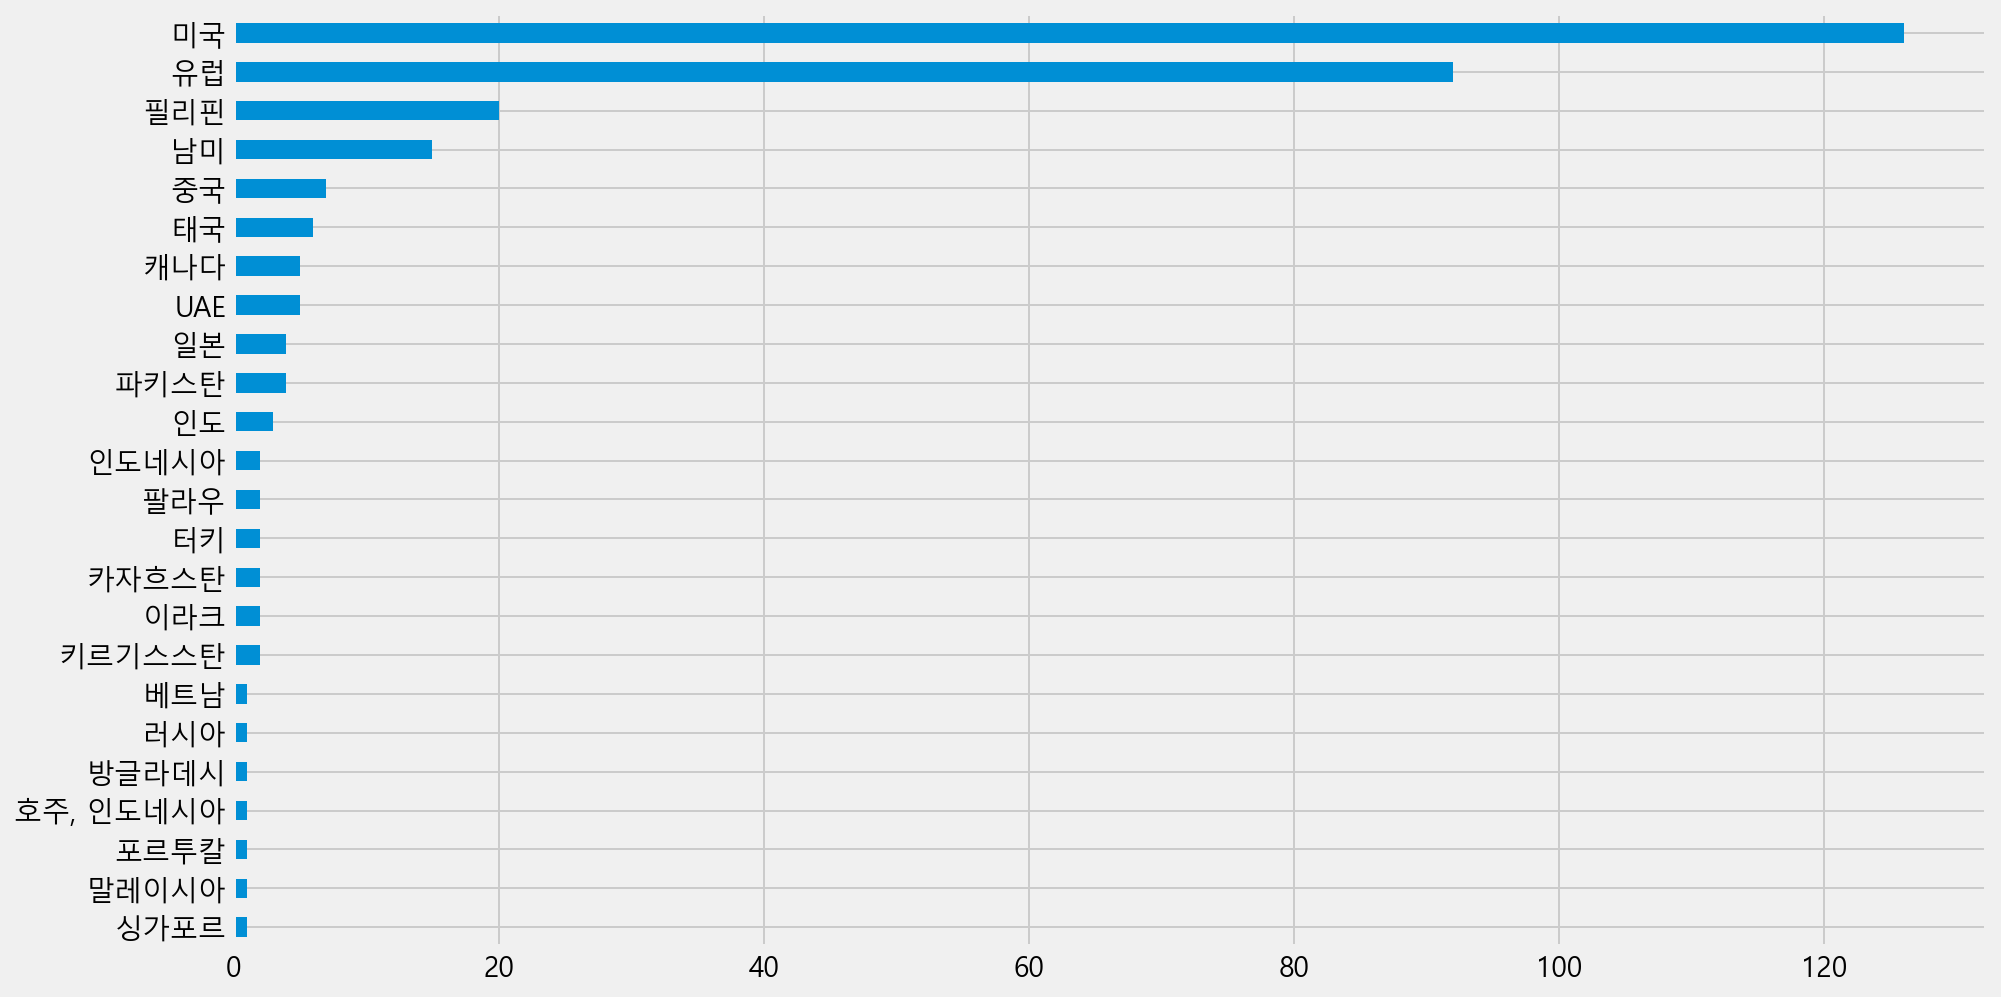

In [194]:
oversea_count.sort_values().plot.barh(figsize=(14,8))

### set_index()로 특정칼럼을 인덱스로 바꿔주기

In [195]:
df_day_oversea = df_day_oversea.set_index("확진일자")
df_day_oversea

,해외,누적확진수
확진일자,,
2020-01-24,중국,1
2020-01-30,중국,3
2020-02-02,중국,4
2020-02-05,싱가포르,1
2020-02-06,중국,5
...,...,...
2020-06-26,이라크,2
2020-06-26,키르기스스탄,1
2020-06-27,키르기스스탄,2


 ### .pivot(columns="칼럼")으로 특정 칼럼의 값을 모두 칼럼으로 바꿔줄 수 있다.

In [196]:
# pivot으로 해외 컬럼의 모든 국가값을 모두 컬럼으로 바꿔줄 수 있다.
df_day_oversea.pivot(columns="해외").head()

누적확진수                                           ...            \
해외           UAE  남미 러시아 말레이시아  미국 방글라데시 베트남 싱가포르  유럽 이라크  ... 카자흐스탄 캐나다   
확진일자                                                       ...             
2020-01-24   NaN NaN NaN   NaN NaN   NaN NaN  NaN NaN NaN  ...   NaN NaN   
2020-01-30   NaN NaN NaN   NaN NaN   NaN NaN  NaN NaN NaN  ...   NaN NaN   
2020-02-02   NaN NaN NaN   NaN NaN   NaN NaN  NaN NaN NaN  ...   NaN NaN   
2020-02-05   NaN NaN NaN   NaN NaN   NaN NaN  1.0 NaN NaN  ...   NaN NaN   
2020-02-06   NaN NaN NaN   NaN NaN   NaN NaN  NaN NaN NaN  ...   NaN NaN   

                                                       
해외         키르기스스탄  태국  터키 파키스탄 팔라우 포르투칼 필리핀 호주, 인도네시아  
확진일자                                                   
2020-01-24    NaN NaN NaN  NaN NaN  NaN NaN       NaN  
2020-01-30    NaN NaN NaN  NaN NaN  NaN NaN       NaN  
2020-02-02    NaN NaN NaN  NaN NaN  NaN NaN       NaN  
2020-02-05    NaN NaN NaN  NaN NaN  NaN NaN       NaN  
2020-02-06    NaN NaN NaN  NaN NaN  NaN NaN       NaN  

[5 rows x 24 columns]

 ### plot(legend=Flase)를 통해서 표값을 빼줄 수 있다.

<AxesSubplot:xlabel='확진일자'>

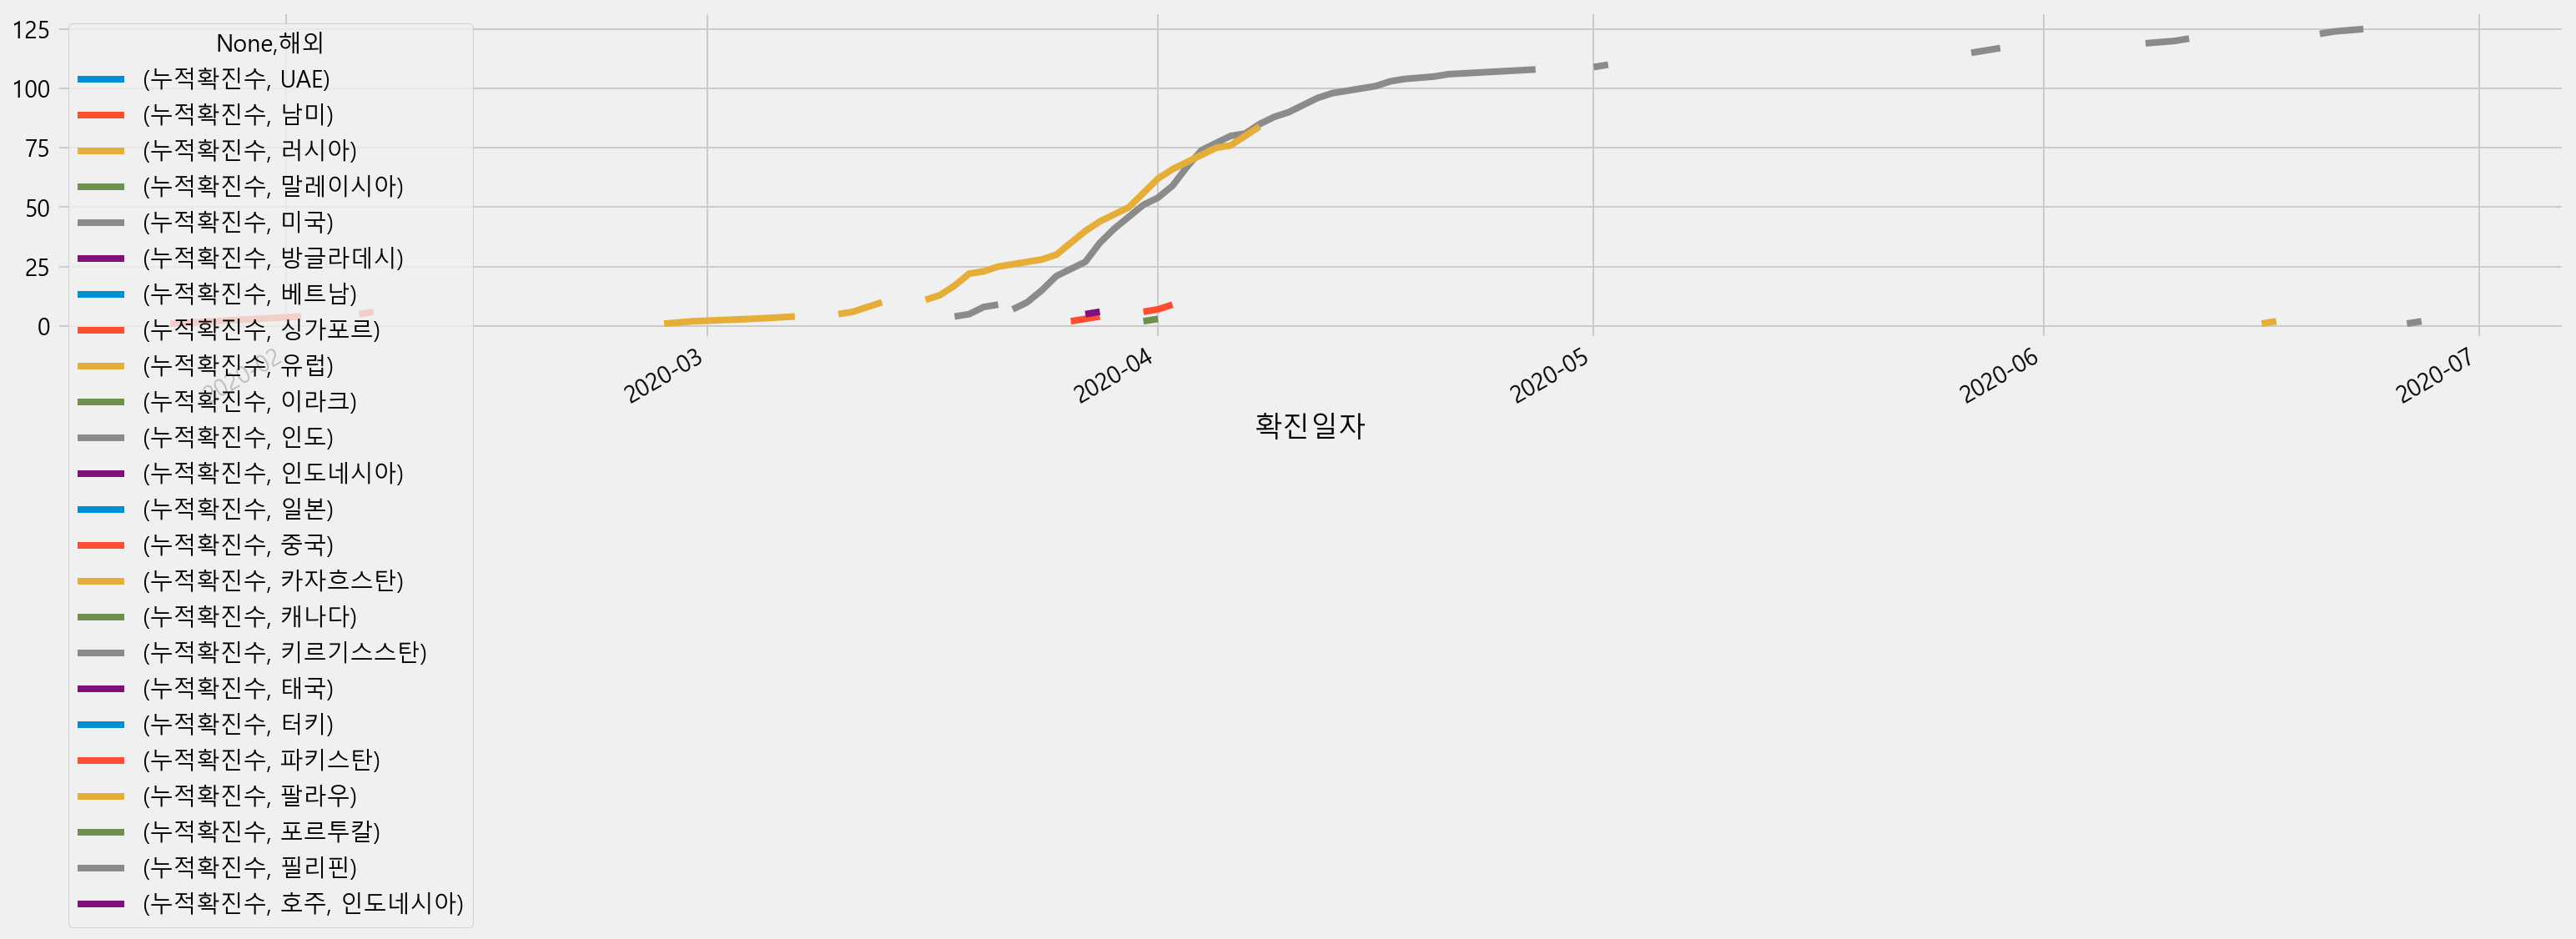

In [197]:
# 왼쪽의 표는 legend라 부른다. legend=False를 통해서 저 표를 빼줄 수 있다.
df_day_oversea.pivot(columns="해외").plot(figsize=(24,4))

<AxesSubplot:xlabel='확진일자'>

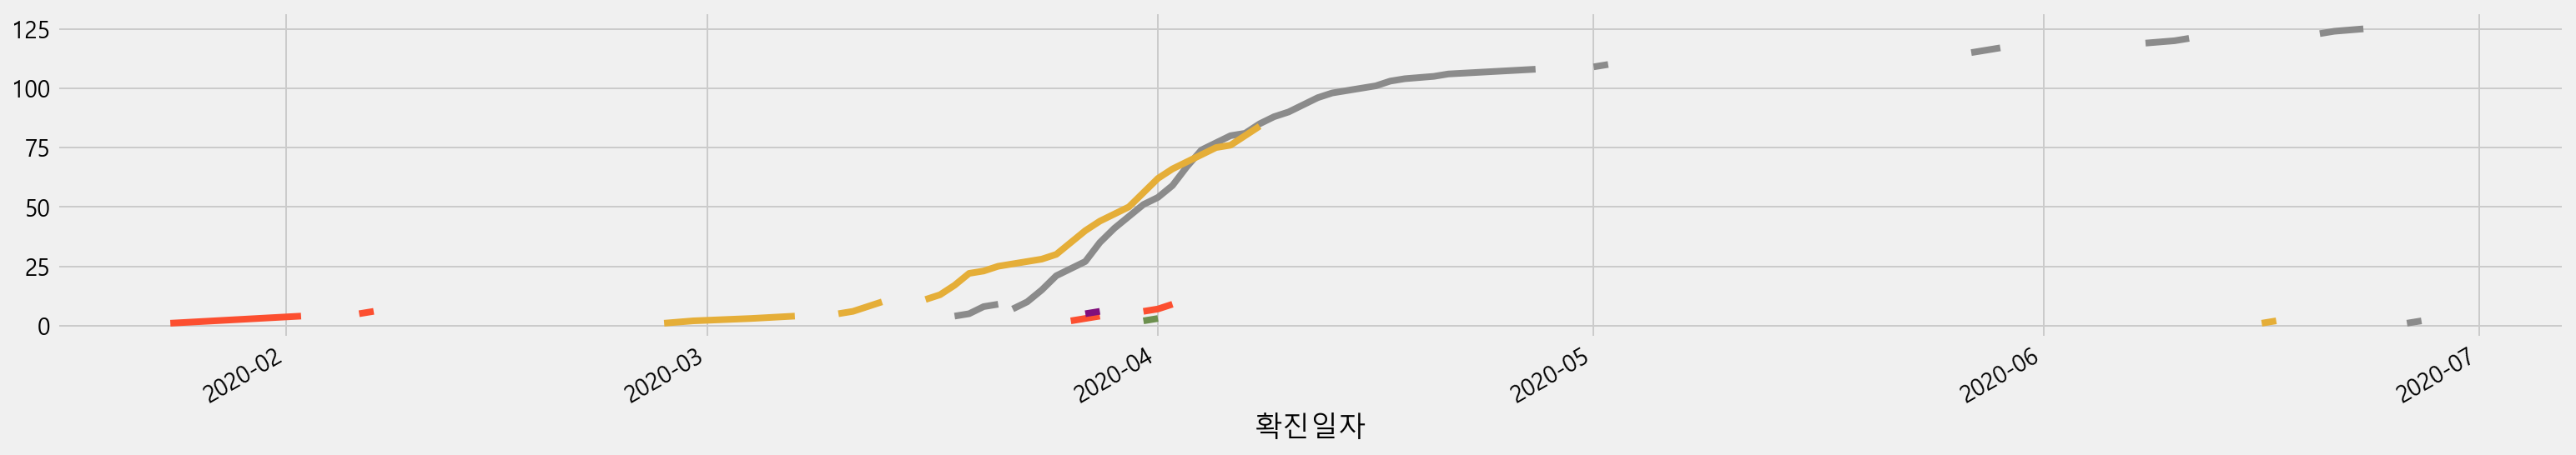

In [198]:
df_day_oversea.pivot(columns="해외").plot(figsize=(24,4), legend=False)

In [199]:
df_day_oversea

,해외,누적확진수
확진일자,,
2020-01-24,중국,1
2020-01-30,중국,3
2020-02-02,중국,4
2020-02-05,싱가포르,1
2020-02-06,중국,5
...,...,...
2020-06-26,이라크,2
2020-06-26,키르기스스탄,1
2020-06-27,키르기스스탄,2


In [200]:
df_day_oversea.loc[df_day_oversea["해외"] == "중국", "누적확진수"]

확진일자
2020-01-24    1
2020-01-30    3
2020-02-02    4
2020-02-06    5
2020-02-07    6
2020-02-25    7
Name: 누적확진수, dtype: int64

<AxesSubplot:xlabel='확진일자'>

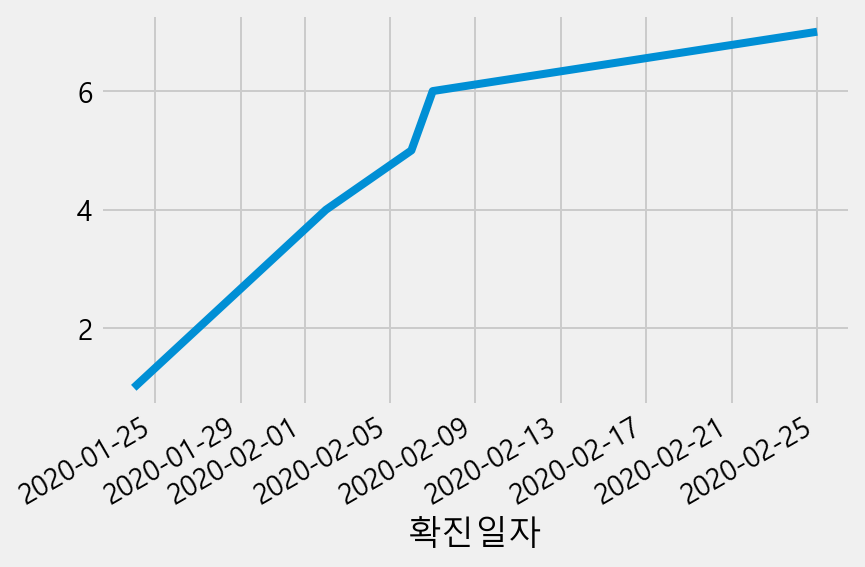

In [201]:
# 중국발 해외유입 누적환직수 그래프
df_day_oversea.loc[df_day_oversea["해외"] == "중국", "누적확진수"].plot()

<AxesSubplot:xlabel='확진일자'>

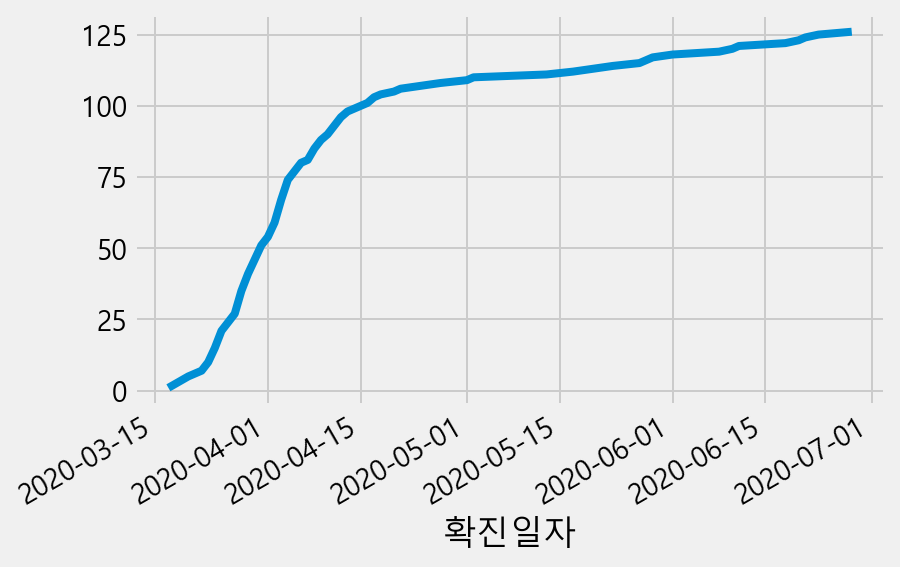

In [202]:
# 중국발 해외유입 누적환직수 그래프

df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

 ## 구별 전체 확진자중 해외 유입비율

In [203]:
# 해외유입 구별 확진자
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

강남구    41
서초구    28
송파구    24
타지역    22
용산구    17
Name: 지역, dtype: int64

 ### 시리즈를 정렬할 때 sort_values()는 데이터를 기준으로 정렬해줍니다. 

In [204]:
# default는 오름차순입니다.
# 숫자 오름차순은 위에서 아래로 갈수록 값이 커집니다. 내림차순은 위에서 아래로 갈수록 값이 작아집니다.

oversea_count_gu.sort_values().head(10)

금천구     1
강북구     2
구로구     3
중구      3
양천구     5
종로구     6
광진구     7
동대문구    7
은평구     8
도봉구     8
Name: 지역, dtype: int64

 ### sort_values().plot().barh()는 sort.values()와 반대로 정렬해줍니다. 

<AxesSubplot:>

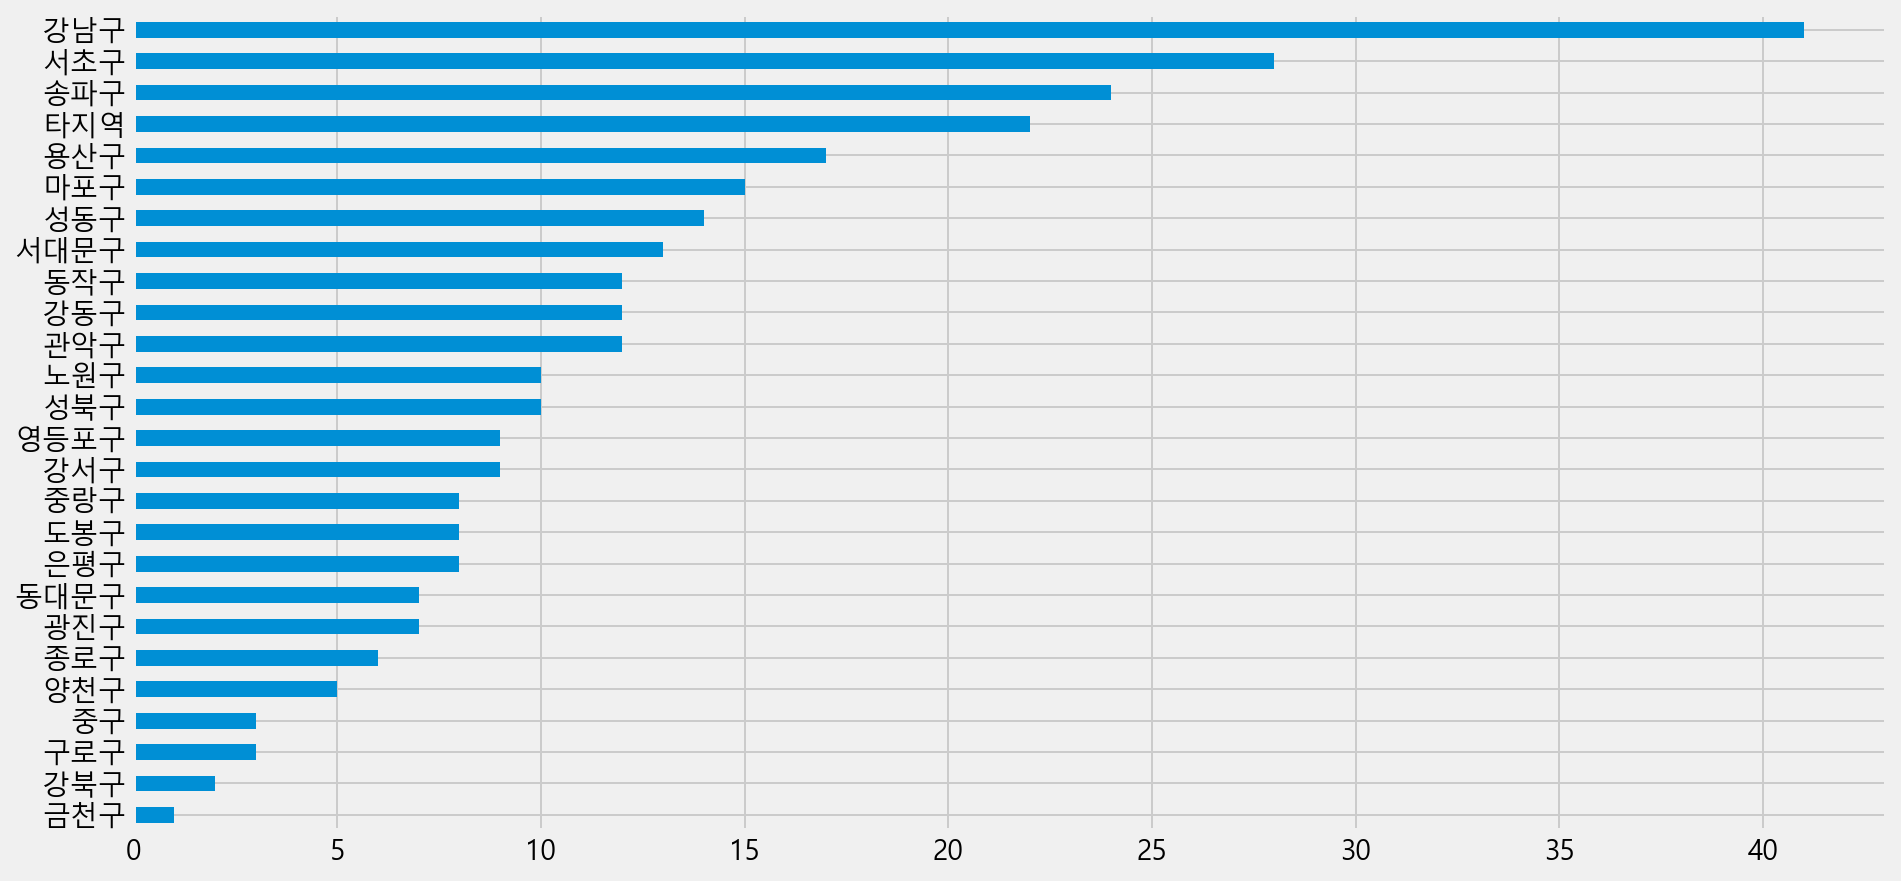

In [205]:
# sort_values().plot()은 내림차순으로 정렬해서 시각화해줍니다.
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.sort_values().plot.barh(figsize=(14,7))

 ### sort_values().plot.bar()은 sort.values()와 정렬순서가 똑같습니다.

<AxesSubplot:>

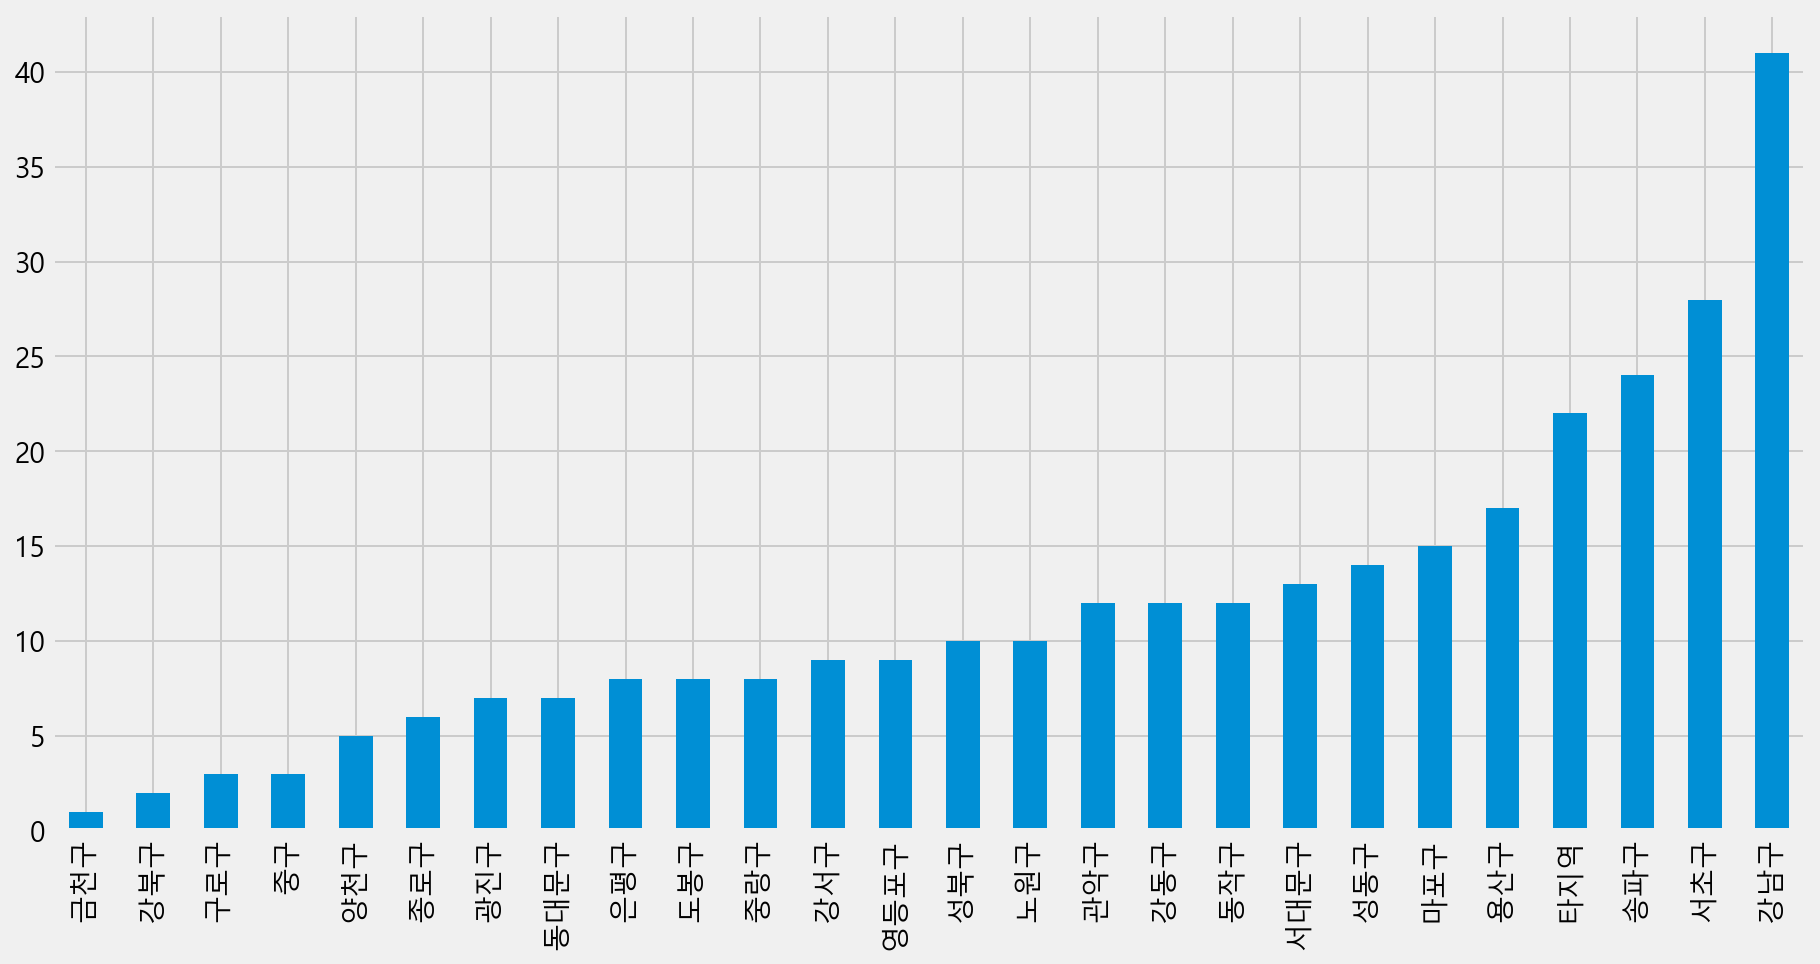

In [206]:
oversea_count_gu.sort_values().plot.bar(figsize=(14,7))

 ## 전체확진수와 해외유입 확진수를 비교합니다

In [207]:
# 구별로 전체 확진수 중에서 해외유입 확진수를 비교합니다.
# all_count_gu 변수에 구별 전체 확진자 수를 구합니다.

all_count_gu = df["지역"].value_counts()
all_count_gu.head()

관악구    117
구로구     86
강남구     83
타지역     81
강서구     78
Name: 지역, dtype: int64

In [208]:
oversea_count_gu.head(10)

강남구     41
서초구     28
송파구     24
타지역     22
용산구     17
마포구     15
성동구     14
서대문구    13
동작구     12
강동구     12
Name: 지역, dtype: int64

 ## merge를 통해 전체 확진수와 해외유입 확진수를 합쳐줍니다.

In [209]:
# pd.DataFrame방법으로 시리즈를 데이터프레임으로 바꿔준다.

pd.DataFrame({"해외확진수":oversea_count_gu, "전체확진수" : all_count_gu}).head(10)

,해외확진수,전체확진수
강남구,41,83
강동구,12,35
강북구,2,24
강서구,9,78
관악구,12,117
광진구,7,17
구로구,3,86
금천구,1,32
노원구,10,43
도봉구,8,62


In [210]:
# 구별 전체확진수를 구하고 시리즈를 데이터프레임 형태로 바꿔줍니다.

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu.head()

,전체확진수
관악구,117
구로구,86
강남구,83
타지역,81
강서구,78


In [211]:
# 구별 해외유입확진수를 구하고 시리즈를 데이터프레임 형태로 바꿔줍니다.
# 해외유입확진수를 구합니다.

df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})
df_oversea_gu.head()

,해외유입확진수
강남구,41
서초구,28
송파구,24
타지역,22
용산구,17


 ### 인덱스를 기준으로 merge()하기

In [212]:
# merge로 구별 전체확진수와 해외유입확진수를 구합니다.
# merge는 특정 컬럼을 키값으로 설쟁해서 두 df를 하나로 합쳐줍니다.
# 하지만 여기서는 인덱스를 기준으로 합쳐야한다.

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,117,12
구로구,86,3
강남구,83,41
타지역,81,22
강서구,78,9


 ### 데이터프레임을 sort_values()로 정렬할 때 기준을 설정해야 합니다.

<AxesSubplot:>

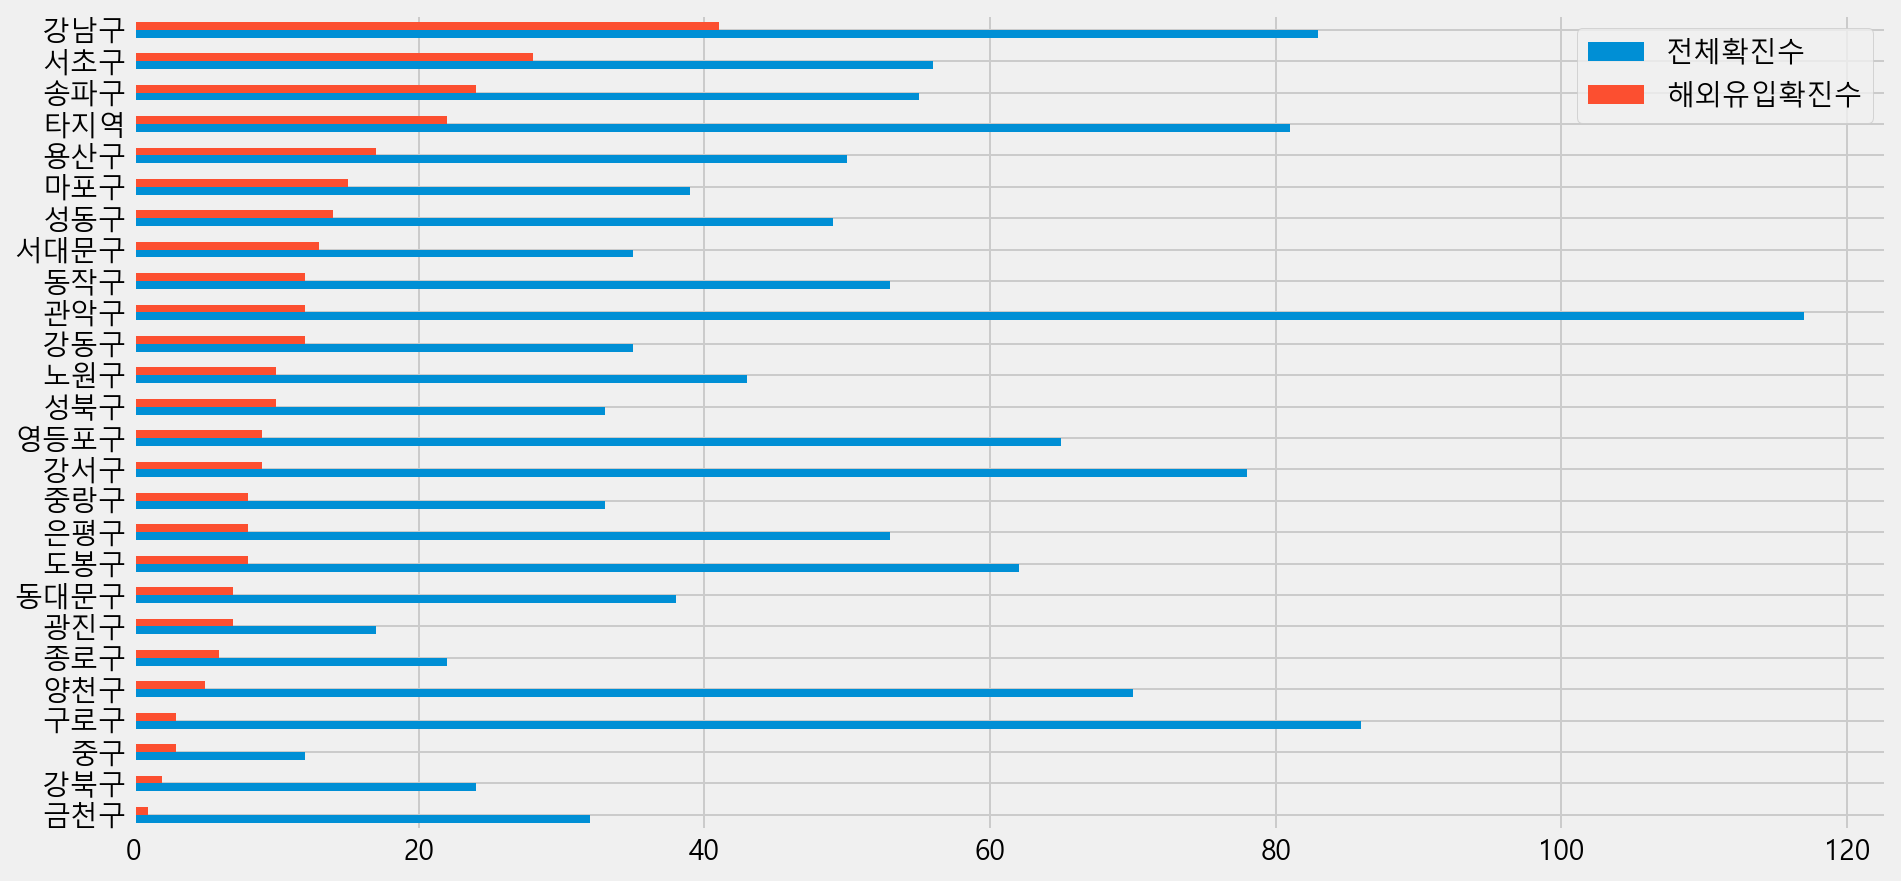

In [213]:
df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(14,7))

In [214]:
# 전체확진수 중에서 해외유입 비율 구하기
# 데이터프레임을 sort_values()로 정렬할 때 기준을 2개 이상 설정가능합니다.

df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"]/df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by=["해외유입비율", "해외유입확진수"], ascending = False)

,전체확진수,해외유입확진수,해외유입비율
서초구,56,28,50.000000
강남구,83,41,49.397590
송파구,55,24,43.636364
광진구,17,7,41.176471
마포구,39,15,38.461538
서대문구,35,13,37.142857
강동구,35,12,34.285714
용산구,50,17,34.000000
성북구,33,10,30.303030
성동구,49,14,28.571429


 ## 해외유입 확진자 중 퇴원 여부

In [215]:
# .unstack()은 멀티인덱스의 가장 마지막 값을 칼럼으로 전환한다.
oversea_finish_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.head(10)

퇴원,False,True
지역,,
강남구,0,41
강동구,0,12
강북구,0,2
강서구,0,9
관악구,2,10
광진구,0,7
구로구,0,3
금천구,0,1
노원구,1,9


<AxesSubplot:xlabel='지역'>

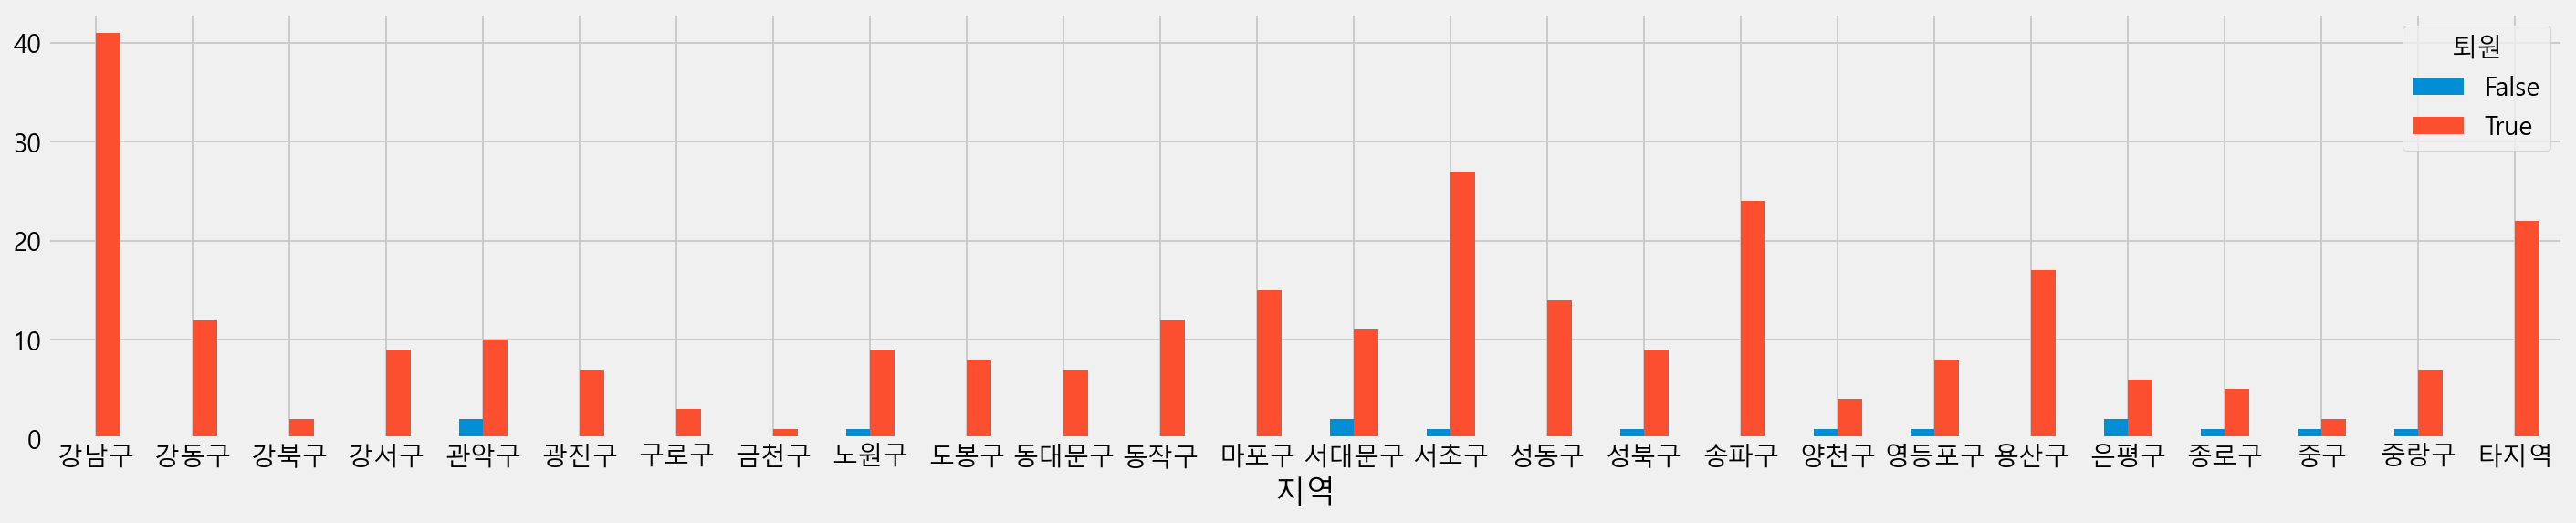

In [216]:
# 각 구별 해외유입 확진자 중 퇴원여부를 시각화합니다.
oversea_finish_count.plot.bar(figsize=(22,4), rot=0)

 ## 월별 해외 확진자 수

<AxesSubplot:>

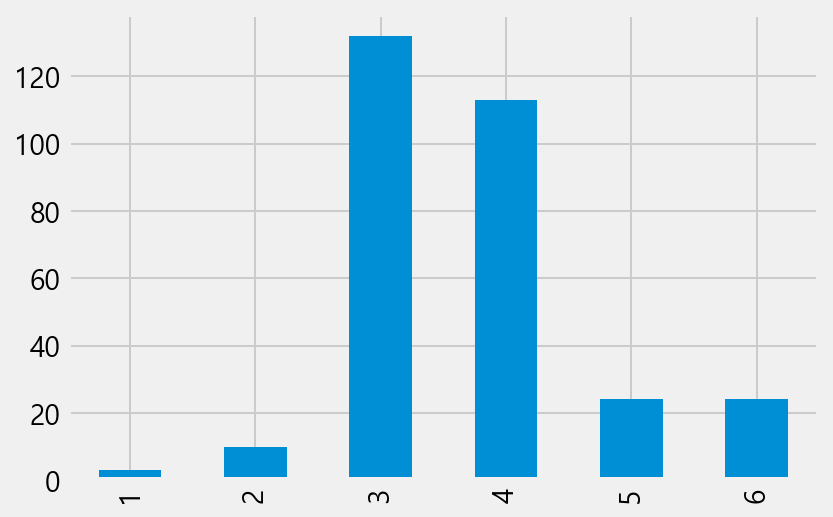

In [217]:
oversea_montly_case = df_oversea["월"].value_counts().sort_index()
oversea_montly_case.plot.bar()

 ## 구별, 월별 해외 확진자 수
 * groupby, crosstab, pivot_table로 같은 결과의 테이블이 나오도록 구합니다.

 ### groupby로 빈도수 구하기

In [218]:
 # 2개 이상의 칼럼을 그룹화 할 수 있다.
 # 하지만 특정 칼럼을 지정해서 count() 하지 않으면 모든 칼럼에 대해서 count()를 해준다.
df_oversea.groupby(["지역", "월"]).count()

연번  환자  확진일  거주지  여행력  접촉력  조치사항  확진일자   주  월일  접촉번호  퇴원  사망  병원  해외
지역  월                                                                      
강남구 2   1   1    1    1    1    1     1     1   1   1     1   1   1   1   1
    3  22  22   22   22   22   22    22    22  22  22    22  22  22  22  22
    4  16  16   16   16   16   16    16    16  16  16    16  16  16  16  16
    5   2   2    2    2    2    2     2     2   2   2     2   2   2   2   2
강동구 3   5   5    5    5    5    5     5     5   5   5     5   5   5   5   5
...    ..  ..  ...  ...  ...  ...   ...   ...  ..  ..   ...  ..  ..  ..  ..
중랑구 6   1   1    1    1    1    1     1     1   1   1     1   1   1   1   1
타지역 2   2   2    2    2    2    2     2     2   2   2     2   2   2   2   2
    3   8   8    8    8    8    8     8     8   8   8     8   8   8   8   8
    4  11  11   11   11   11   11    11    11  11  11    11  11  11  11  11
    6   1   1    1    1    1    1     1     1   1   1     1   1   1   1   1

[87 rows x 15 columns]

In [219]:
# "연번"이라는 특정 칼럼을 하나 정해서 count() 해준다.
df_oversea.groupby(["지역", "월"])["연번"].count()

지역   월
강남구  2     1
     3    22
     4    16
     5     2
강동구  3     5
          ..
중랑구  6     1
타지역  2     2
     3     8
     4    11
     6     1
Name: 연번, Length: 87, dtype: int64

In [220]:
# "월"과 "지역"의 순서를 바꿀 수 도 있다.
df_oversea.groupby(["월", "지역"])["연번"].count()

월  지역 
1  강서구    1
   마포구    1
   중랑구    1
2  강남구    1
   강서구    1
         ..
6  은평구    2
   종로구    1
   중구     1
   중랑구    1
   타지역    1
Name: 연번, Length: 87, dtype: int64

In [221]:
# unstack()으로 마지막 인덱스의 값을 모두 컬럼으로 바꿔 줄 수 있다.

month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,...,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,...,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,...,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,...,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,...,1,1,3,1,0,2,1,1,1,1


 ### style.background_gradient()로 그라데이션으로 시각화해주기

In [222]:
# cmap으로 색생변경이 가능하다.
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1


 ### crosstab으로 빈도수 구하기

In [223]:
month_gu = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1


 ### pivot_table로 빈도수 구하기

 ### pd.options.display.max_로 표시되는 컬럼, 행 개수 지정하기

In [234]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 10
# 표시되는 컬럼의 수를 100개로 늘려준다.
# 표시되는 행의 수를 10개로 늘려준다.

month_gu = pd.pivot_table(df_oversea, index="월", columns="지역", values = "연번", aggfunc="count", fill_value=0)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1


 ## 해외유입이 많은 상위 5개 구 시각화하기

In [243]:
# 해외유입이 많은 상위 5개 구를 구합니다.

top_oversea_gu = df_oversea["지역"].value_counts().head().index
top_oversea_gu

Index(['강남구', '서초구', '송파구', '타지역', '용산구'], dtype='object')

 ### plot()의 범례 위치 변경하기

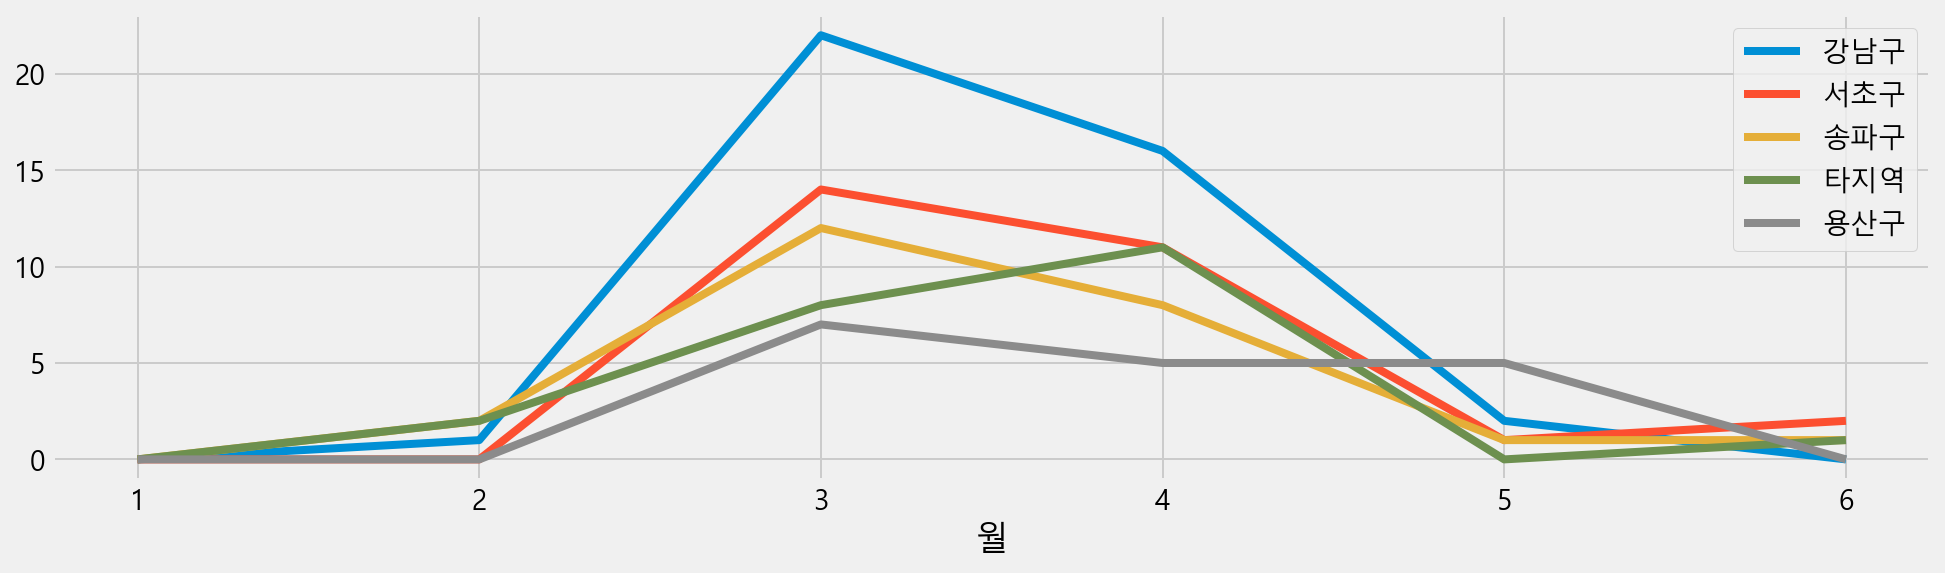

In [251]:
# legend(loc=숫자)에 숫자별로 범례위치 지정가능
# "https://dailyheumsi.tistory.com/97"에 

g = month_gu[top_oversea_gu].plot(figsize=(15,4))
g.legend(loc=1)

 ## 구별 해외유입 국가 분석하기

In [257]:
# groupby로 구해보기
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
남미,2,0,0,0,0,0,0,0,1,0,1,0,2,1,1,1,0,1,0,0,0,2,0,1,0,2
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,22,4,1,4,4,2,1,0,2,3,2,3,5,3,16,9,6,11,3,2,4,1,3,0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
파키스탄,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
팔라우,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
포르투칼,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [258]:
# pivot_table()로 구해보기

group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역", values="연번", aggfunc="count", fill_value=0)
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
남미,2,0,0,0,0,0,0,0,1,0,1,0,2,1,1,1,0,1,0,0,0,2,0,1,0,2
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,22,4,1,4,4,2,1,0,2,3,2,3,5,3,16,9,6,11,3,2,4,1,3,0,4,11
방글라데시,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
유럽,13,3,0,0,5,4,0,0,4,5,2,5,4,4,10,2,4,8,0,5,5,3,1,0,0,5


In [260]:
# 강남 3구만 따로 떼어서 봅니다.

group_oversea_gu[["강남구", "서초구", "송파구"]].T

해외,UAE,남미,러시아,말레이시아,미국,방글라데시,베트남,싱가포르,유럽,이라크,인도,인도네시아,일본,중국,카자흐스탄,캐나다,키르기스스탄,태국,터키,파키스탄,팔라우,포르투칼,필리핀,"호주, 인도네시아"
지역,,,,,,,,,,,,,,,,,,,,,,,,
강남구,0,2,1,0,22,1,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
서초구,0,1,0,0,16,0,0,0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
송파구,1,1,0,0,11,0,0,1,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [262]:
group_oversea_gu.loc[["미국", "유럽"], ["강남구", "서초구", "송파구"]]

지역,강남구,서초구,송파구
해외,,,
미국,22,16,11
유럽,13,10,8
